In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Load zone sequence files and combine into one DataFrame
data_folder = "Aggregated_Data"
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

all_data = []
for file in csv_files:
    df = pd.read_csv(os.path.join(data_folder, file))
    df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
    all_data.append(df)

climate_fire_df = pd.concat(all_data, ignore_index=True)
climate_fire_df.sort_values(["Zone_ID", "Date"], inplace=True)

climate_fire_df


Zone_ID  Precipitation   Humidity  Temperature       Wind  Num_Fires  \
10608      1.0      22.339806  65.805283     7.730907   9.539081          0   
10616      1.0      16.978067  75.892670     9.927811   8.074983          0   
10624      1.0       5.139589  63.032867    12.678871   9.121183          0   
10632      1.0      13.420406  87.038727     8.766089   5.736721          0   
10640      1.0       3.897444  48.778149    16.070381   7.448781          0   
...        ...            ...        ...          ...        ...        ...   
7039       8.0       0.006360  52.858082    21.086908  24.872744          0   
7047       8.0      44.580208  81.528374    19.032253  27.734533          0   
7055       8.0      32.856617  81.494095    18.900959  26.939358          0   
7063       8.0       6.381305  67.720200    17.669884  13.743039          0   
7071       8.0       0.008643  48.280888    15.742384  12.702726          0   

            Date  
10608 2008-03-25  
10616 2008-03-26  
10624 2008-03-27  
10632 2008-03-28  
10640 2008-03-29  
...          ...  
7039  2018-10-27  
7047  2018-10-28  
7055  2018-10-29  
7063  2018-10-30  
7071  2018-10-31  

[19448 rows x 7 columns]

In [7]:
# Reset and save cleaned merged dataset
climate_fire_df["Zone_ID"] = climate_fire_df["Zone_ID"].astype(int)
climate_fire_df.reset_index(drop=True, inplace=True)

columns = ["Date"] + [col for col in climate_fire_df.columns if col != "Date"]
climate_fire_df = climate_fire_df[columns]

climate_fire_df.to_csv("zone_sequence_merged.csv", index=False)

climate_fire_df


Date  Zone_ID  Precipitation   Humidity  Temperature       Wind  \
0     2008-03-25        1      22.339806  65.805283     7.730907   9.539081   
1     2008-03-26        1      16.978067  75.892670     9.927811   8.074983   
2     2008-03-27        1       5.139589  63.032867    12.678871   9.121183   
3     2008-03-28        1      13.420406  87.038727     8.766089   5.736721   
4     2008-03-29        1       3.897444  48.778149    16.070381   7.448781   
...          ...      ...            ...        ...          ...        ...   
19443 2018-10-27        8       0.006360  52.858082    21.086908  24.872744   
19444 2018-10-28        8      44.580208  81.528374    19.032253  27.734533   
19445 2018-10-29        8      32.856617  81.494095    18.900959  26.939358   
19446 2018-10-30        8       6.381305  67.720200    17.669884  13.743039   
19447 2018-10-31        8       0.008643  48.280888    15.742384  12.702726   

       Num_Fires  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
19443          0  
19444          0  
19445          0  
19446          0  
19447          0  

[19448 rows x 7 columns]

In [8]:
# Check for missing values in the merged dataset
missing = climate_fire_df.isnull().sum()
print(missing)


Date             0
Zone_ID          0
Precipitation    0
Humidity         0
Temperature      0
Wind             0
Num_Fires        0
dtype: int64


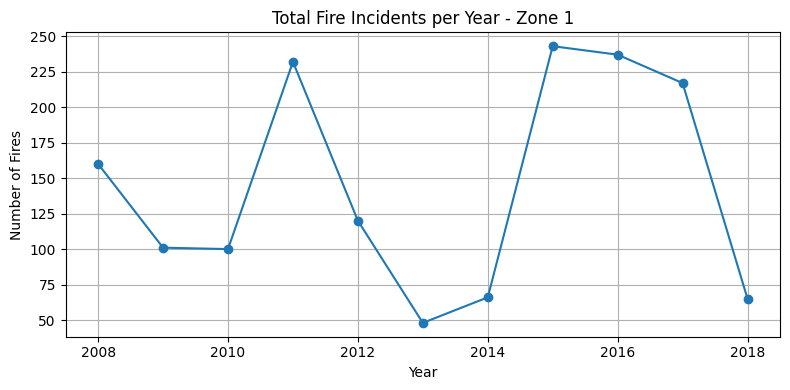

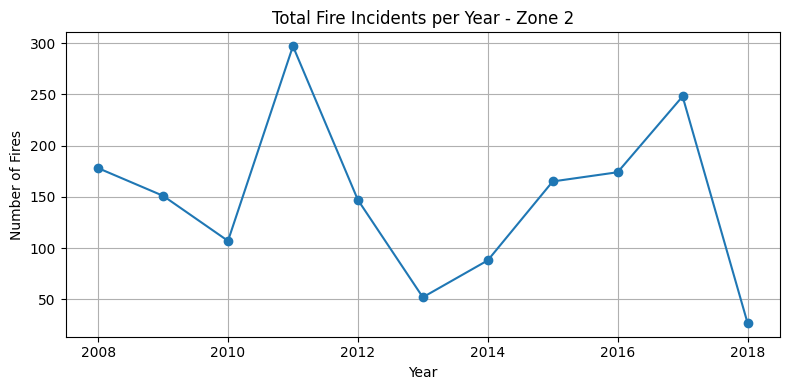

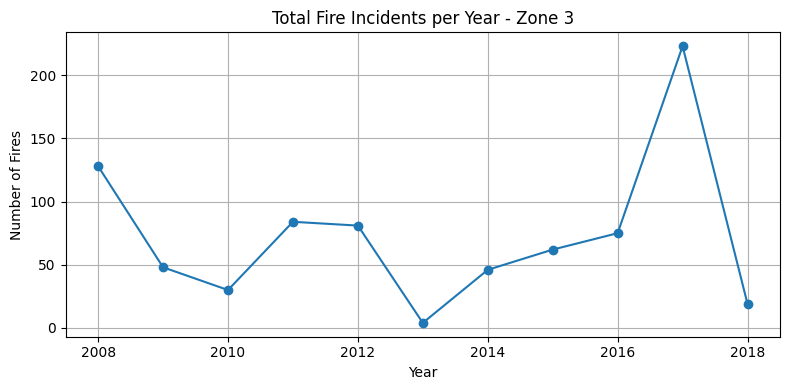

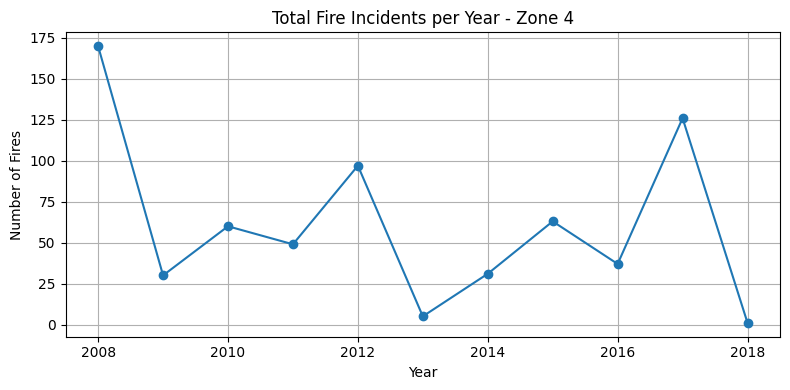

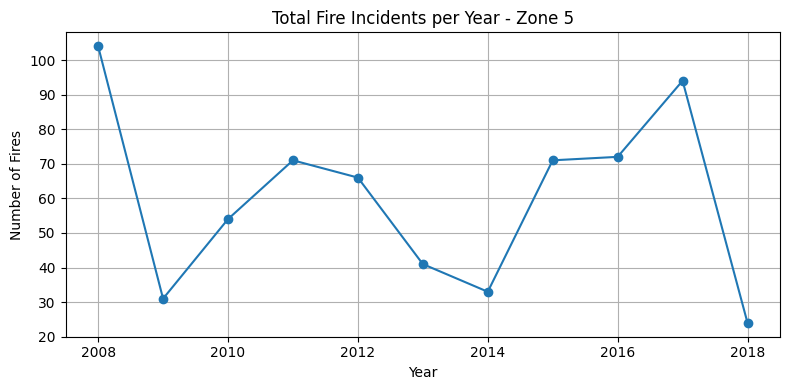

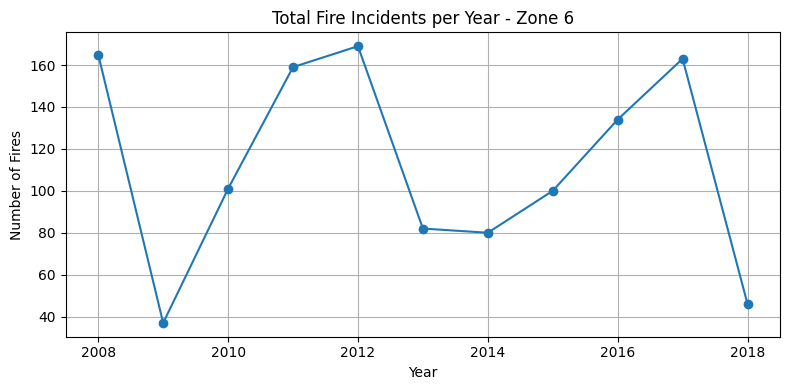

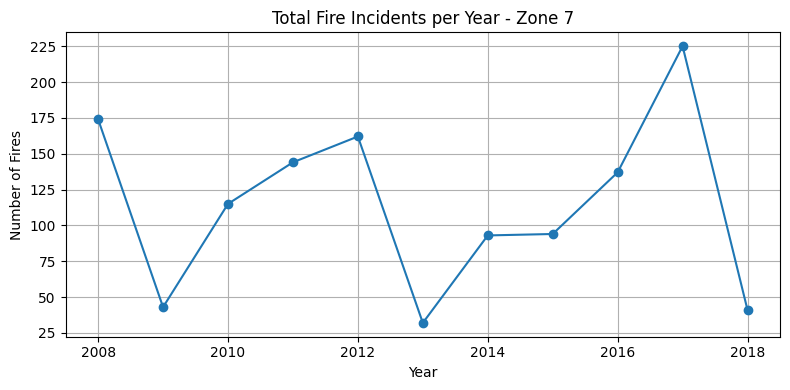

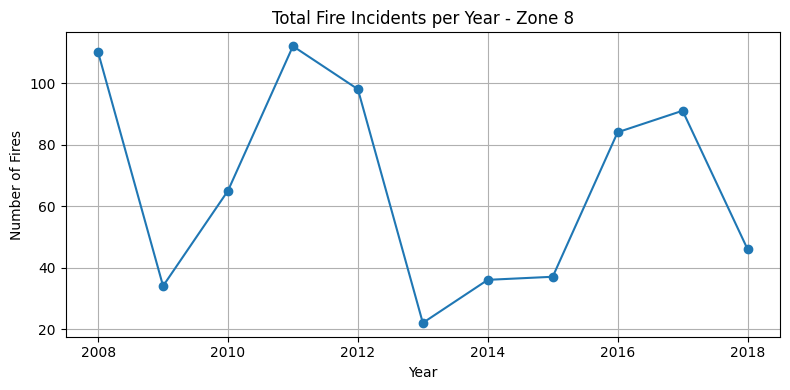

In [9]:
# Plot total fire incidents per year for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    yearly_fire = zone_df.groupby(zone_df["Date"].dt.year)["Num_Fires"].sum()

    plt.figure(figsize=(8, 4))
    plt.plot(yearly_fire.index, yearly_fire.values, marker="o")
    plt.title(f"Total Fire Incidents per Year - Zone {zone}")
    plt.xlabel("Year")
    plt.ylabel("Number of Fires")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


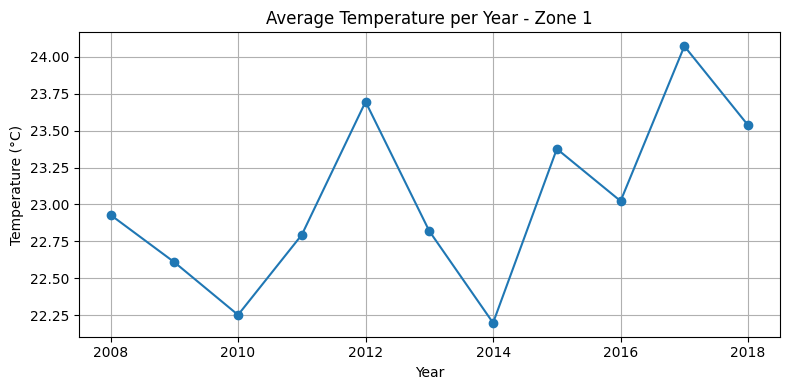

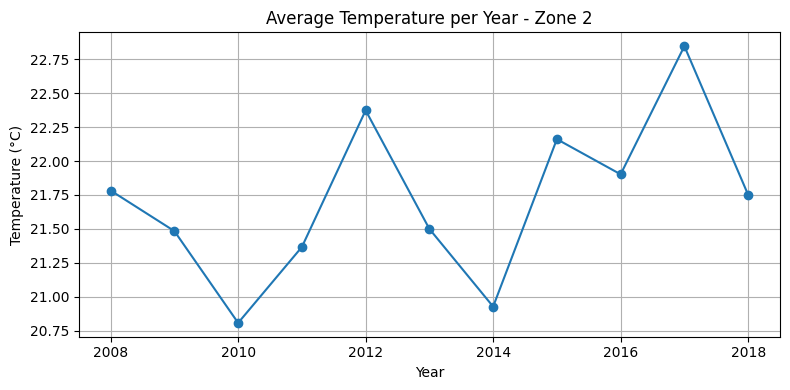

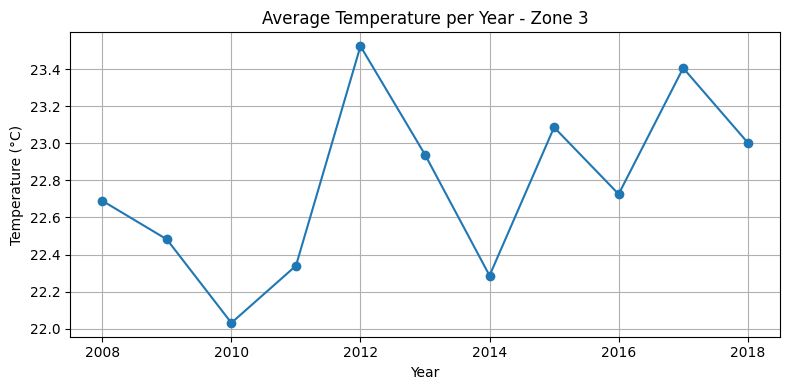

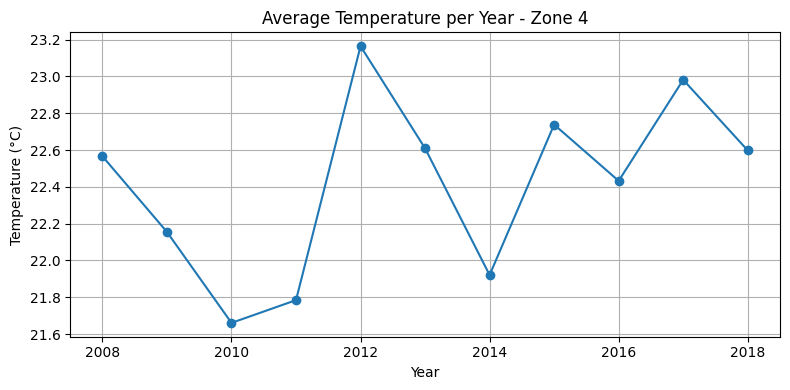

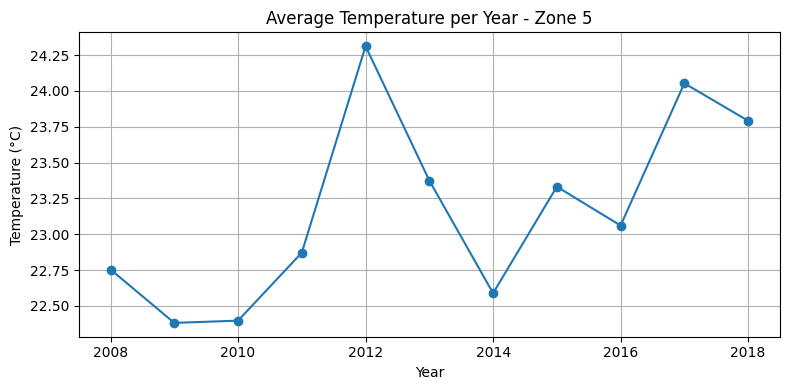

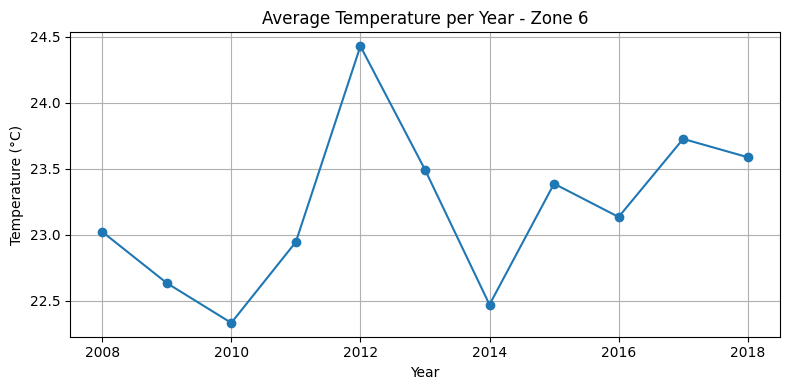

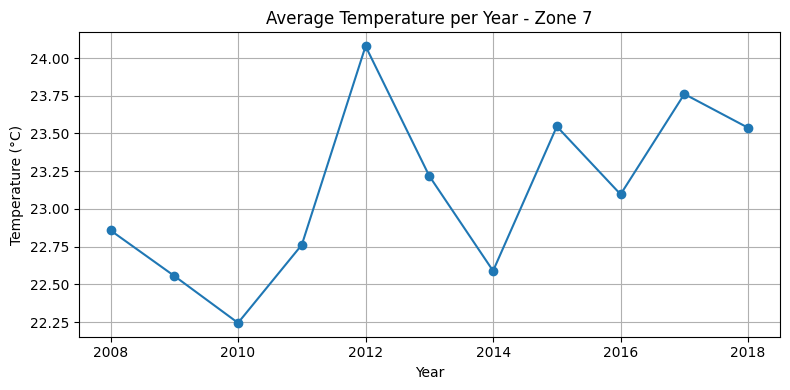

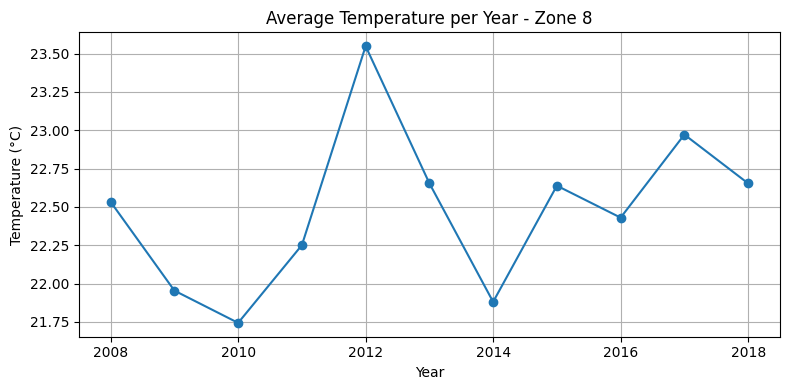

In [10]:
# Plot average temperature per year for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    yearly_temp = zone_df.groupby(zone_df["Date"].dt.year)["Temperature"].mean()

    plt.figure(figsize=(8, 4))
    plt.plot(yearly_temp.index, yearly_temp.values, marker="o")
    plt.title(f"Average Temperature per Year - Zone {zone}")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


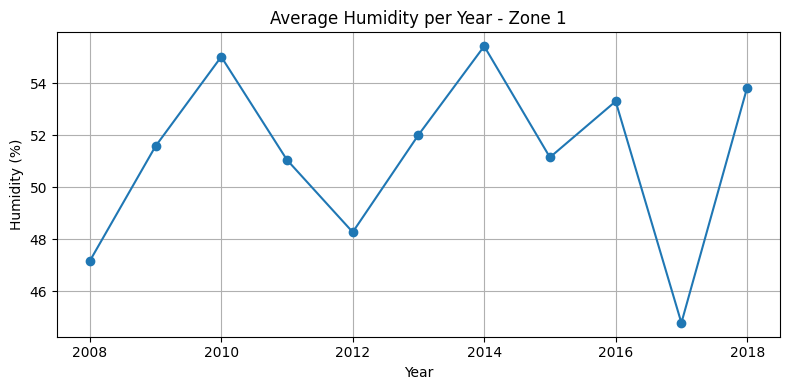

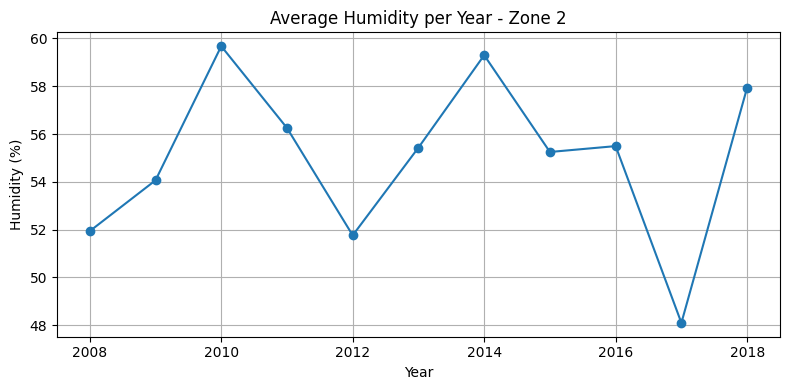

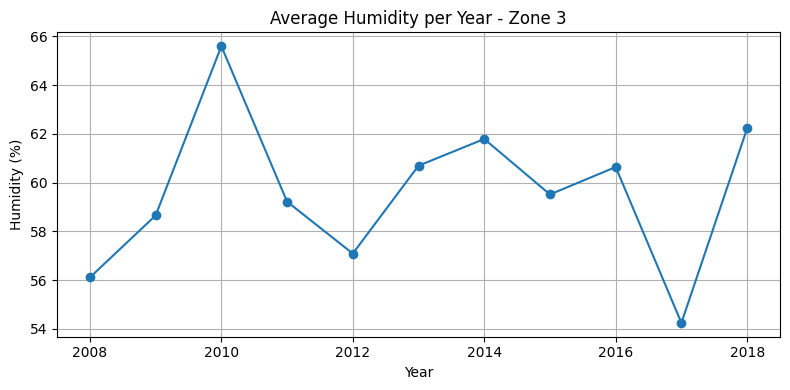

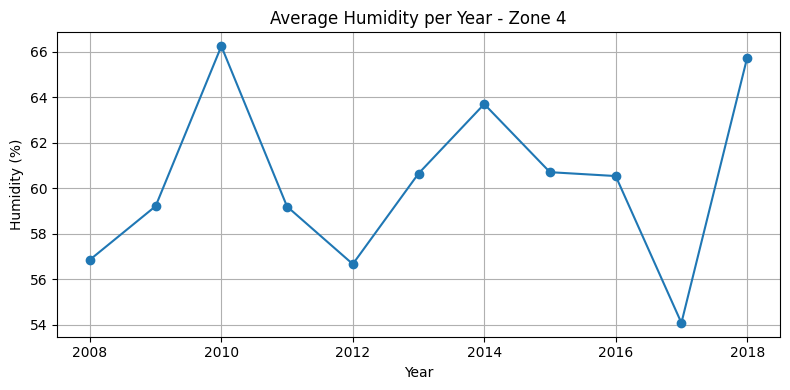

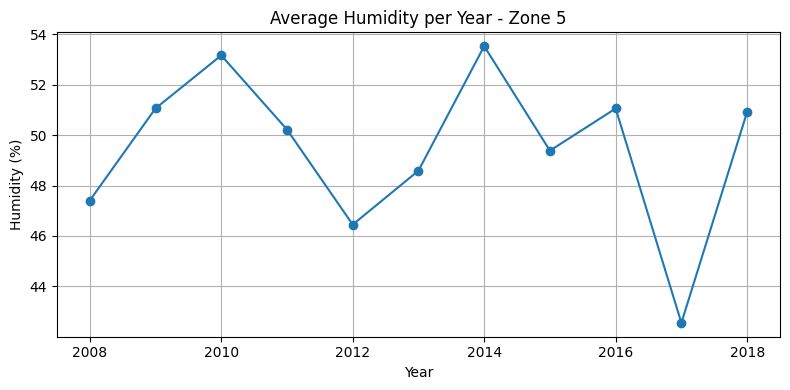

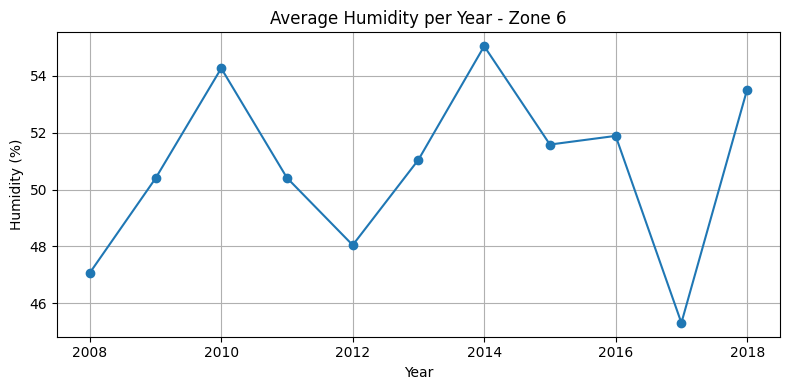

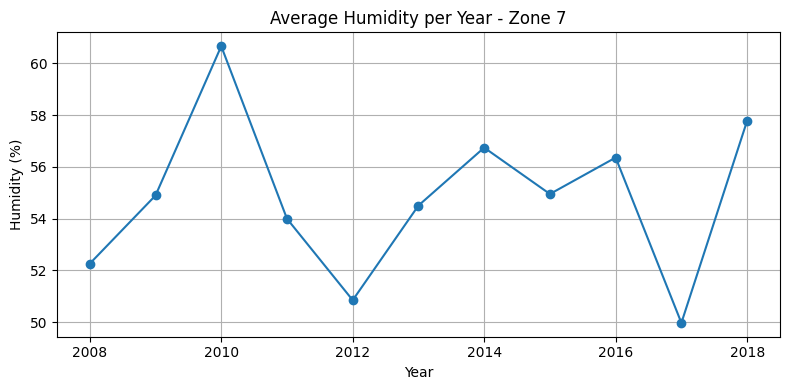

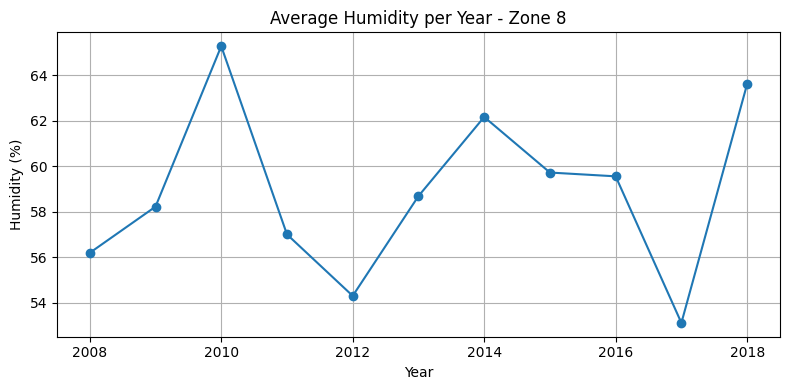

In [11]:
# Plot average humidity per year for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    yearly_humidity = zone_df.groupby(zone_df["Date"].dt.year)["Humidity"].mean()

    plt.figure(figsize=(8, 4))
    plt.plot(yearly_humidity.index, yearly_humidity.values, marker="o")
    plt.title(f"Average Humidity per Year - Zone {zone}")
    plt.xlabel("Year")
    plt.ylabel("Humidity (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


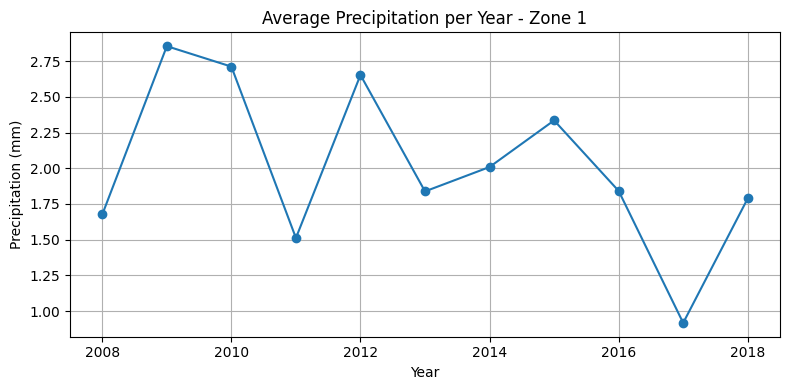

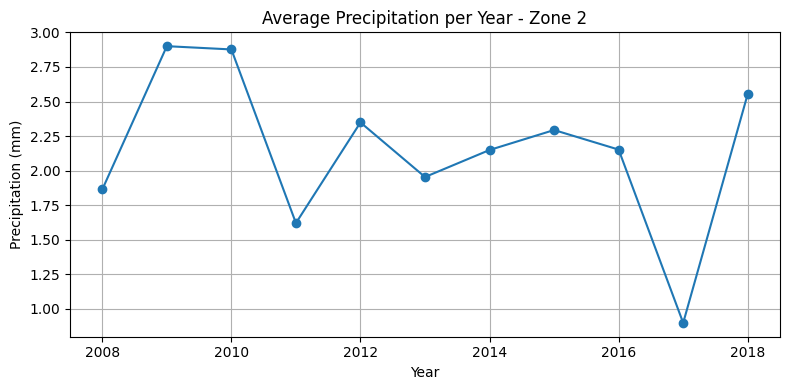

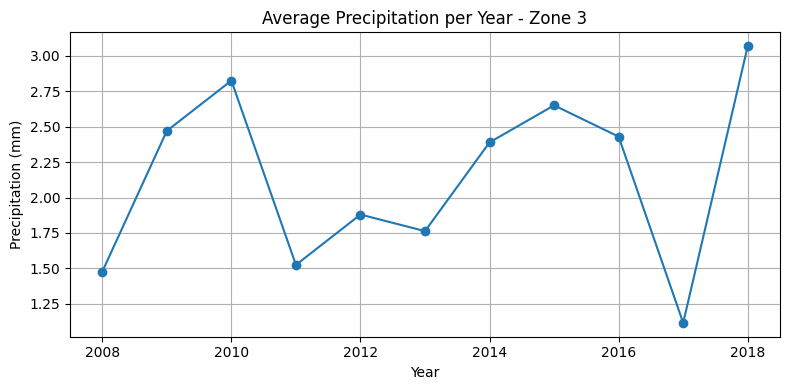

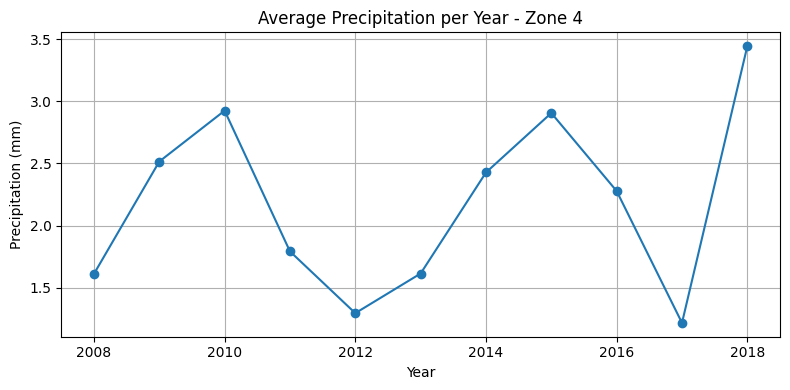

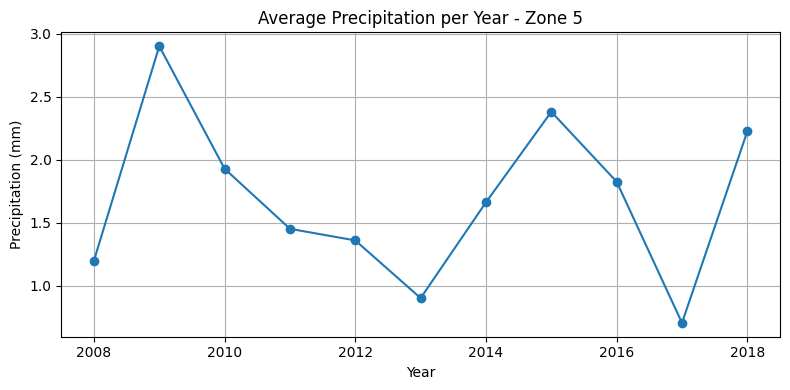

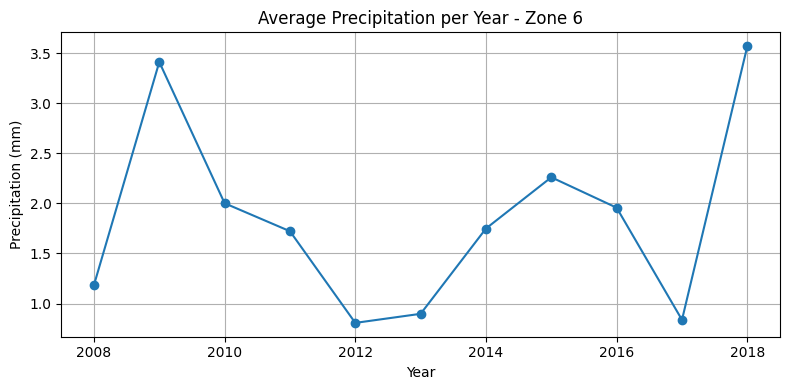

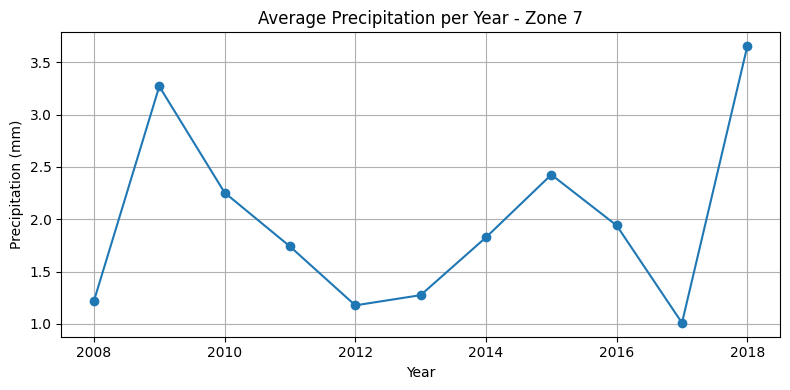

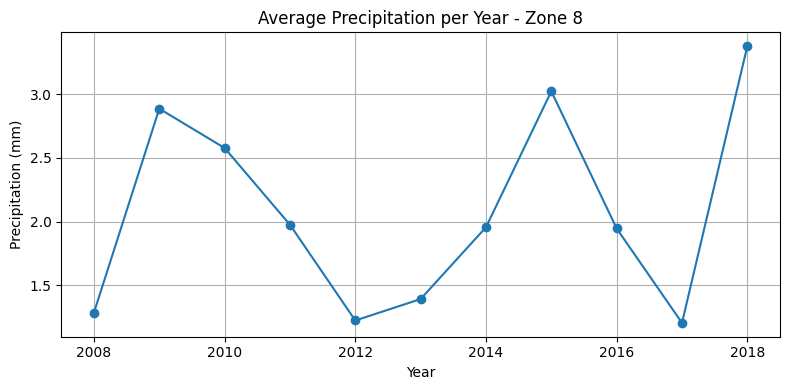

In [12]:
# Plot average precipitation per year for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    yearly_precip = zone_df.groupby(zone_df["Date"].dt.year)["Precipitation"].mean()

    plt.figure(figsize=(8, 4))
    plt.plot(yearly_precip.index, yearly_precip.values, marker="o")
    plt.title(f"Average Precipitation per Year - Zone {zone}")
    plt.xlabel("Year")
    plt.ylabel("Precipitation (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


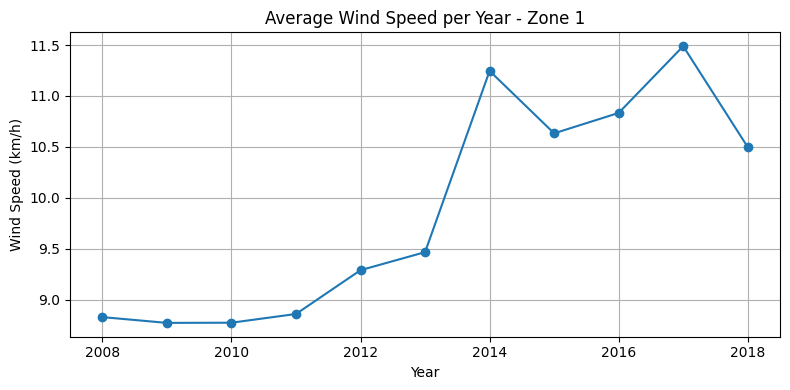

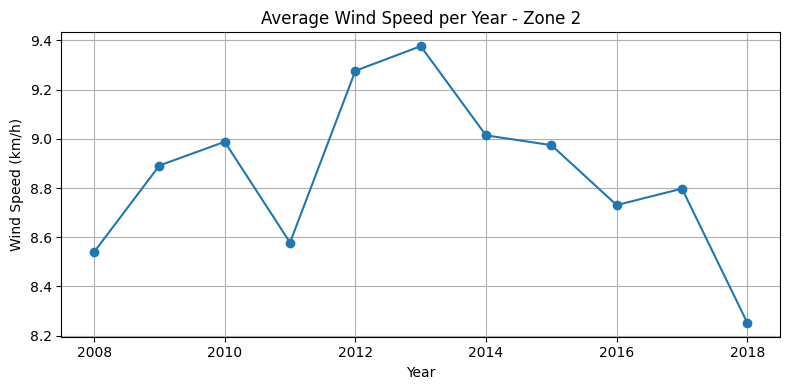

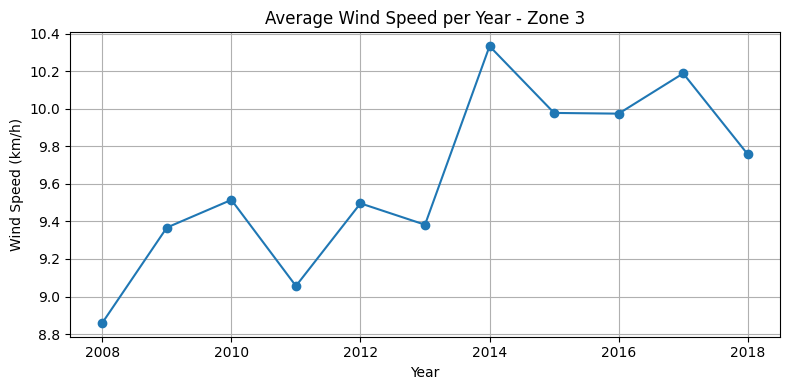

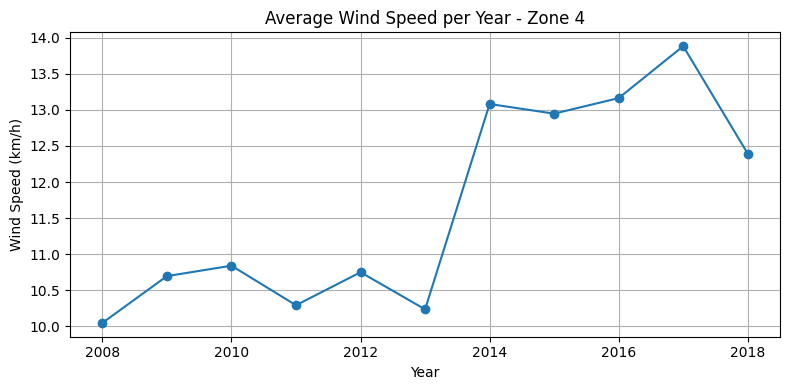

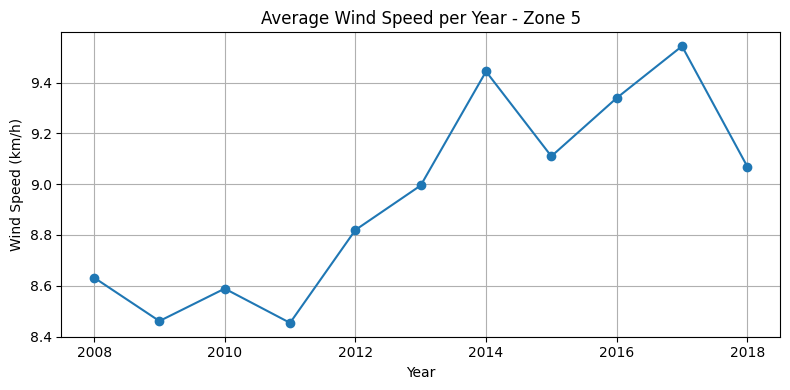

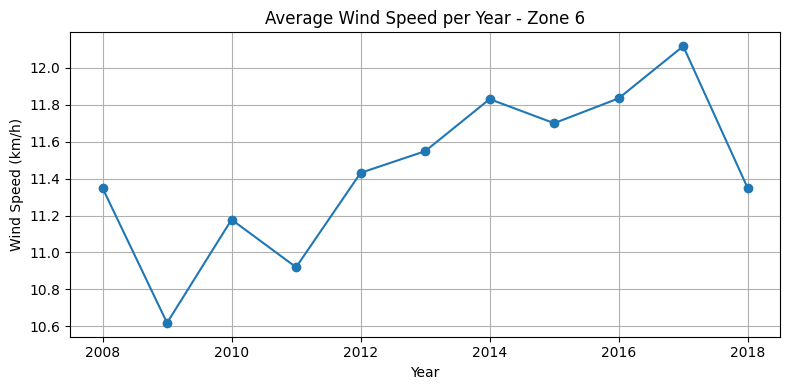

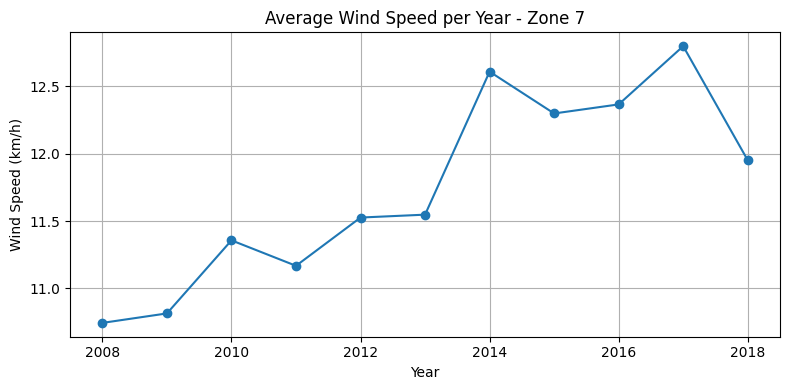

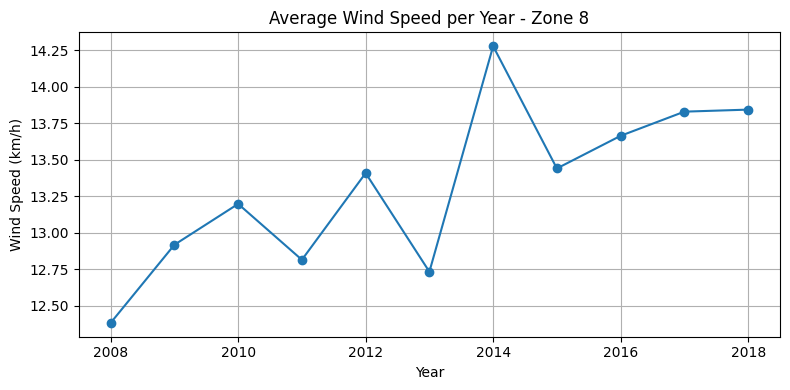

In [13]:
# Plot average wind speed per year for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    yearly_wind = zone_df.groupby(zone_df["Date"].dt.year)["Wind"].mean()

    plt.figure(figsize=(8, 4))
    plt.plot(yearly_wind.index, yearly_wind.values, marker="o")
    plt.title(f"Average Wind Speed per Year - Zone {zone}")
    plt.xlabel("Year")
    plt.ylabel("Wind Speed (km/h)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
# Compute correlation between climate features and Num_Fires for each zone
climate_features = ["Precipitation", "Humidity", "Temperature", "Wind"]
correlation_summary = {}

for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    correlation = zone_df[climate_features + ["Num_Fires"]].corr()["Num_Fires"].drop("Num_Fires")
    correlation_summary[zone] = correlation

for zone, corr in correlation_summary.items():
    print(f"Zone {zone} - Correlation with Num_Fires:")
    print(corr.round(3))
    print("-" * 40)


Zone 1 - Correlation with Num_Fires:
Precipitation   -0.167
Humidity        -0.393
Temperature      0.450
Wind             0.039
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 2 - Correlation with Num_Fires:
Precipitation   -0.151
Humidity        -0.377
Temperature      0.477
Wind            -0.044
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 3 - Correlation with Num_Fires:
Precipitation   -0.116
Humidity        -0.355
Temperature      0.391
Wind             0.001
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 4 - Correlation with Num_Fires:
Precipitation   -0.126
Humidity        -0.334
Temperature      0.390
Wind             0.061
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 5 - Correlation with Num_Fires:
Precipitation   -0.112
Humidity        -0.276
Temperature      0.383
Wind            -0.048
Name: Num_Fires, dtype: float64
-------------------------------

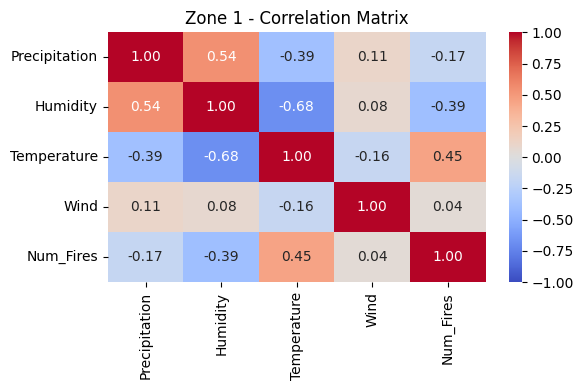

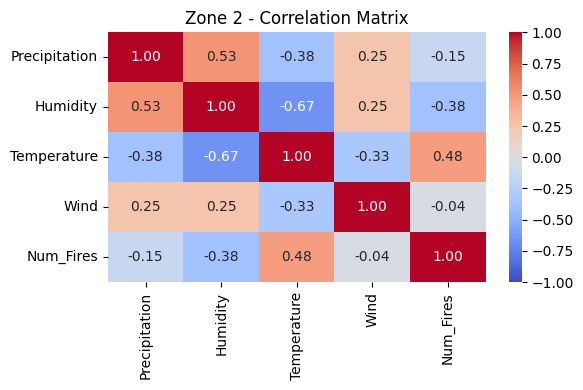

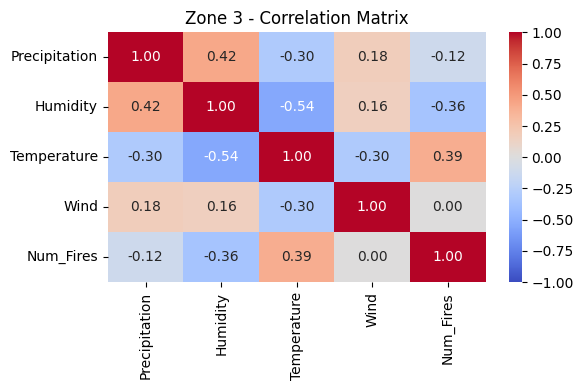

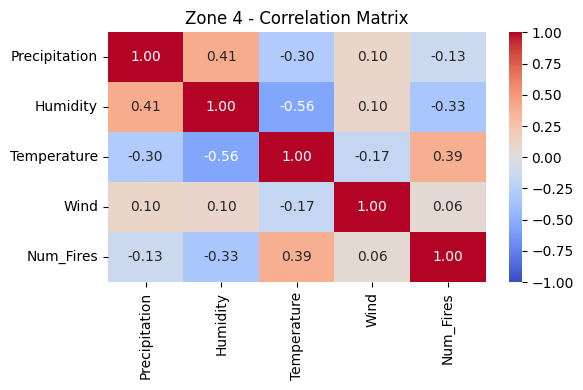

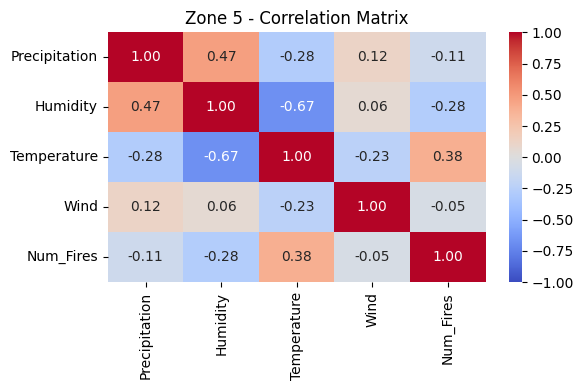

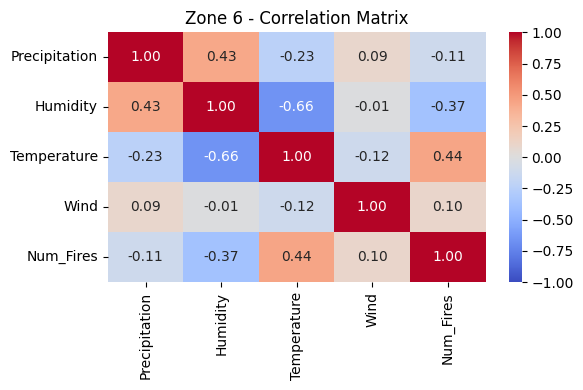

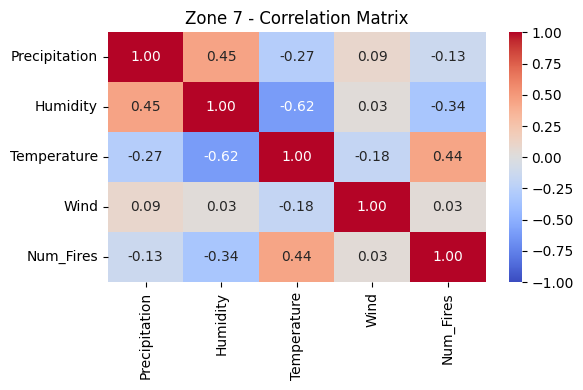

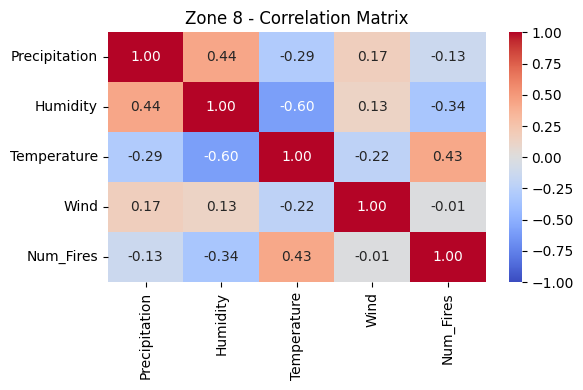

In [15]:
# Plot correlation heatmap between climate variables and fire counts
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    corr = zone_df[["Precipitation", "Humidity", "Temperature", "Wind", "Num_Fires"]].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title(f"Zone {zone} - Correlation Matrix")
    plt.tight_layout()
    plt.show()


In [16]:
# Show distribution of fire counts for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    counts = zone_df["Num_Fires"].value_counts().sort_index()
    print(f"Zone {zone} - Fire Count Distribution:")
    print(counts)
    print("-" * 40)


Zone 1 - Fire Count Distribution:
Num_Fires
0    1755
1     307
2     127
3      94
4      71
5      40
6      13
7      12
8       8
9       4
Name: count, dtype: int64
----------------------------------------
Zone 2 - Fire Count Distribution:
Num_Fires
0     1752
1      306
2      133
3      102
4       62
5       26
6       20
7       11
8        7
9        7
10       1
11       2
14       1
16       1
Name: count, dtype: int64
----------------------------------------
Zone 3 - Fire Count Distribution:
Num_Fires
0    2027
1     211
2      94
3      48
4      23
5      14
6       8
7       3
8       1
9       2
Name: count, dtype: int64
----------------------------------------
Zone 4 - Fire Count Distribution:
Num_Fires
0    2011
1     274
2      80
3      40
4      19
5       5
7       2
Name: count, dtype: int64
----------------------------------------
Zone 5 - Fire Count Distribution:
Num_Fires
0    1978
1     313
2      93
3      31
4      13
5       2
7       1
Name: count, dtype

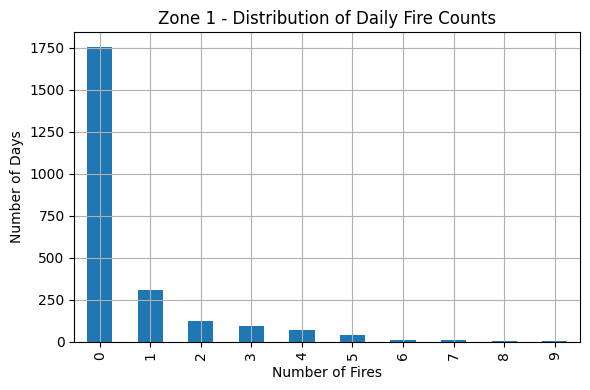

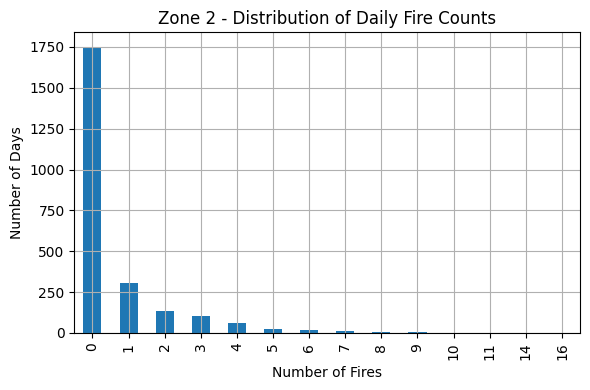

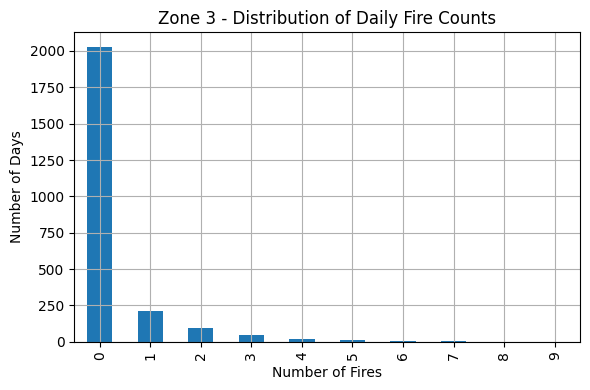

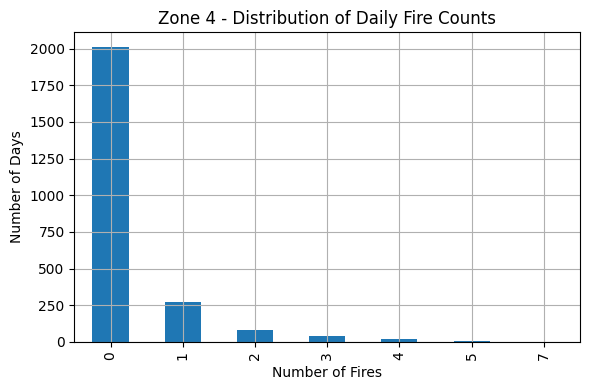

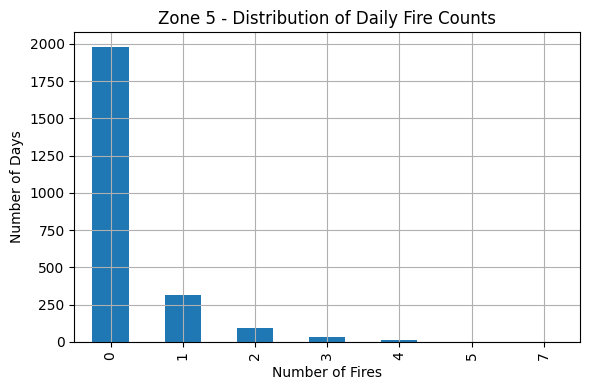

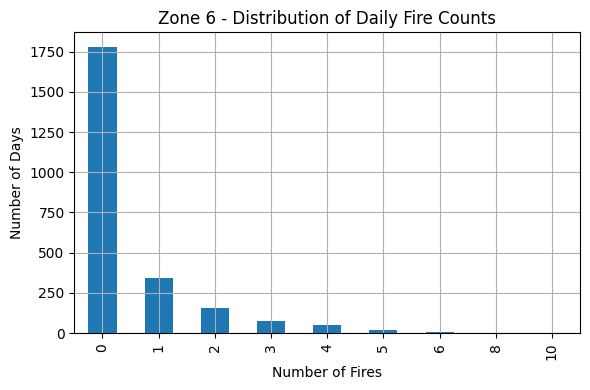

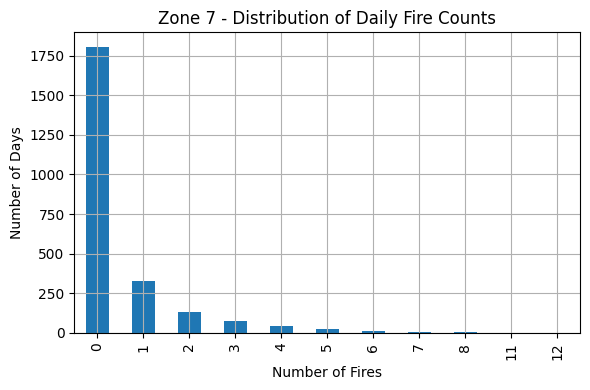

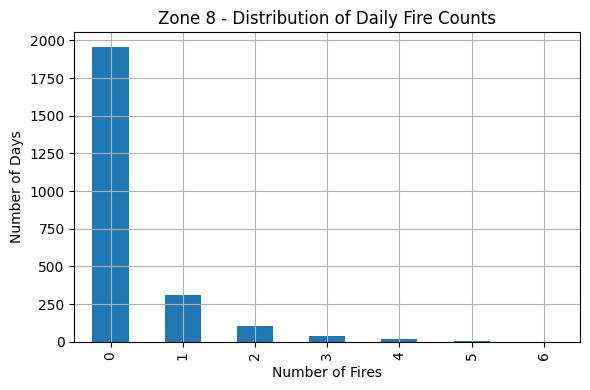

In [17]:
# Plot distribution of daily fire counts for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    fire_counts = zone_df["Num_Fires"].value_counts().sort_index()

    plt.figure(figsize=(6, 4))
    fire_counts.plot(kind="bar")
    plt.title(f"Zone {zone} - Distribution of Daily Fire Counts")
    plt.xlabel("Number of Fires")
    plt.ylabel("Number of Days")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_2285469/2126514673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_fire_df["Month"] = climate_fire_df["Date"].dt.month


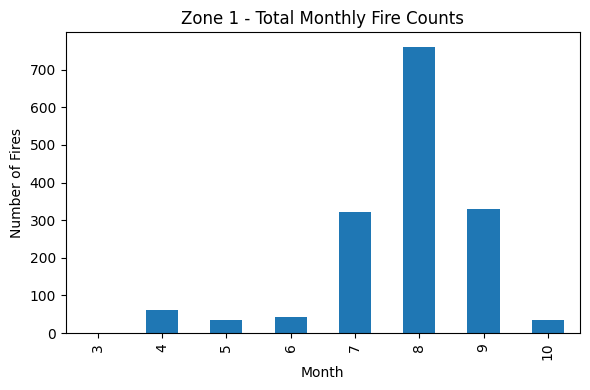

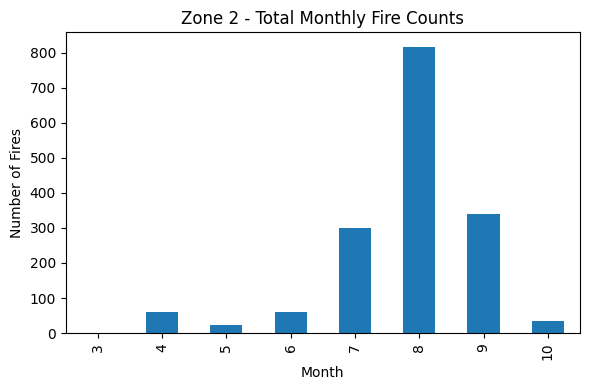

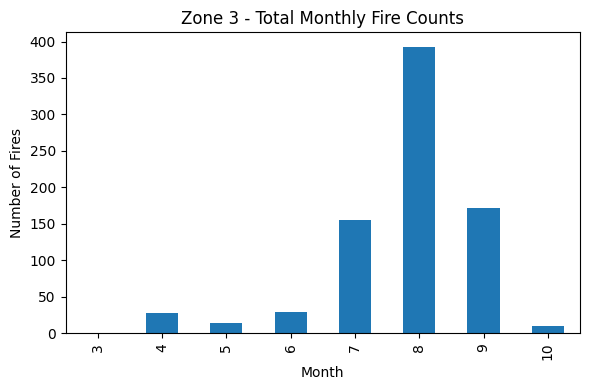

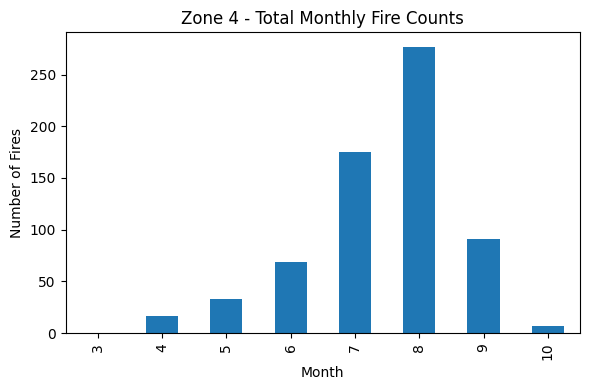

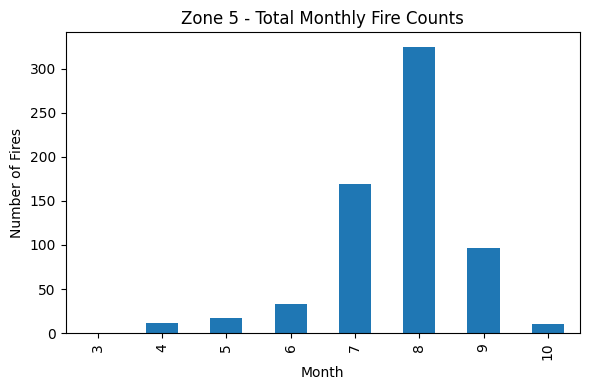

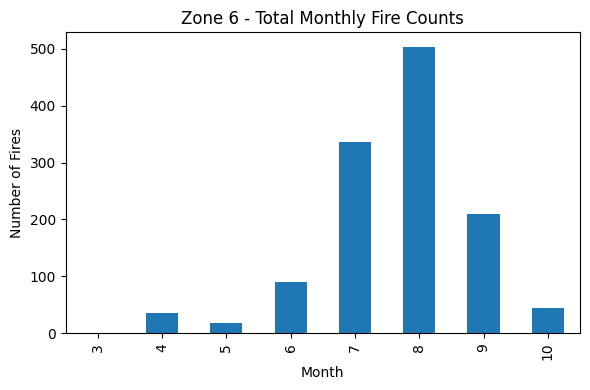

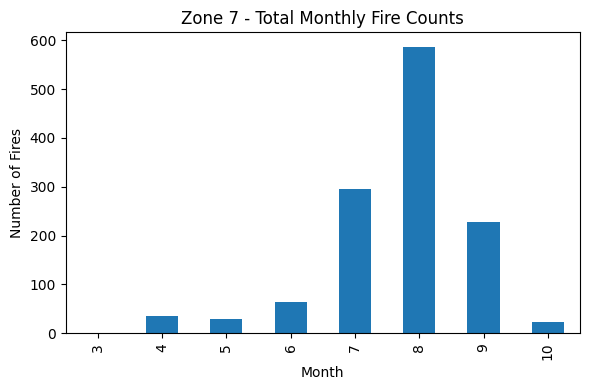

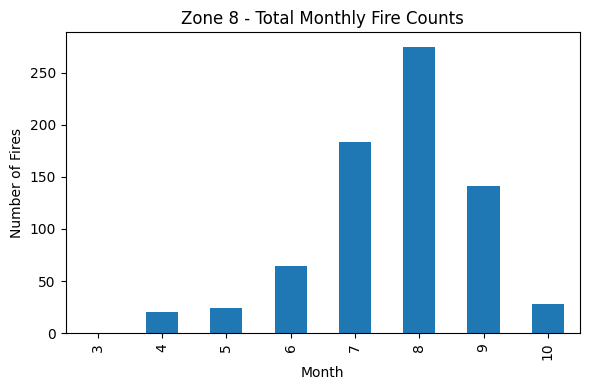

In [18]:
# Plot total monthly fire counts for each zone
climate_fire_df["Month"] = climate_fire_df["Date"].dt.month

for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    monthly_fire = zone_df.groupby("Month")["Num_Fires"].sum()

    plt.figure(figsize=(6, 4))
    monthly_fire.plot(kind="bar")
    plt.title(f"Zone {zone} - Total Monthly Fire Counts")
    plt.xlabel("Month")
    plt.ylabel("Number of Fires")
    plt.tight_layout()
    plt.show()


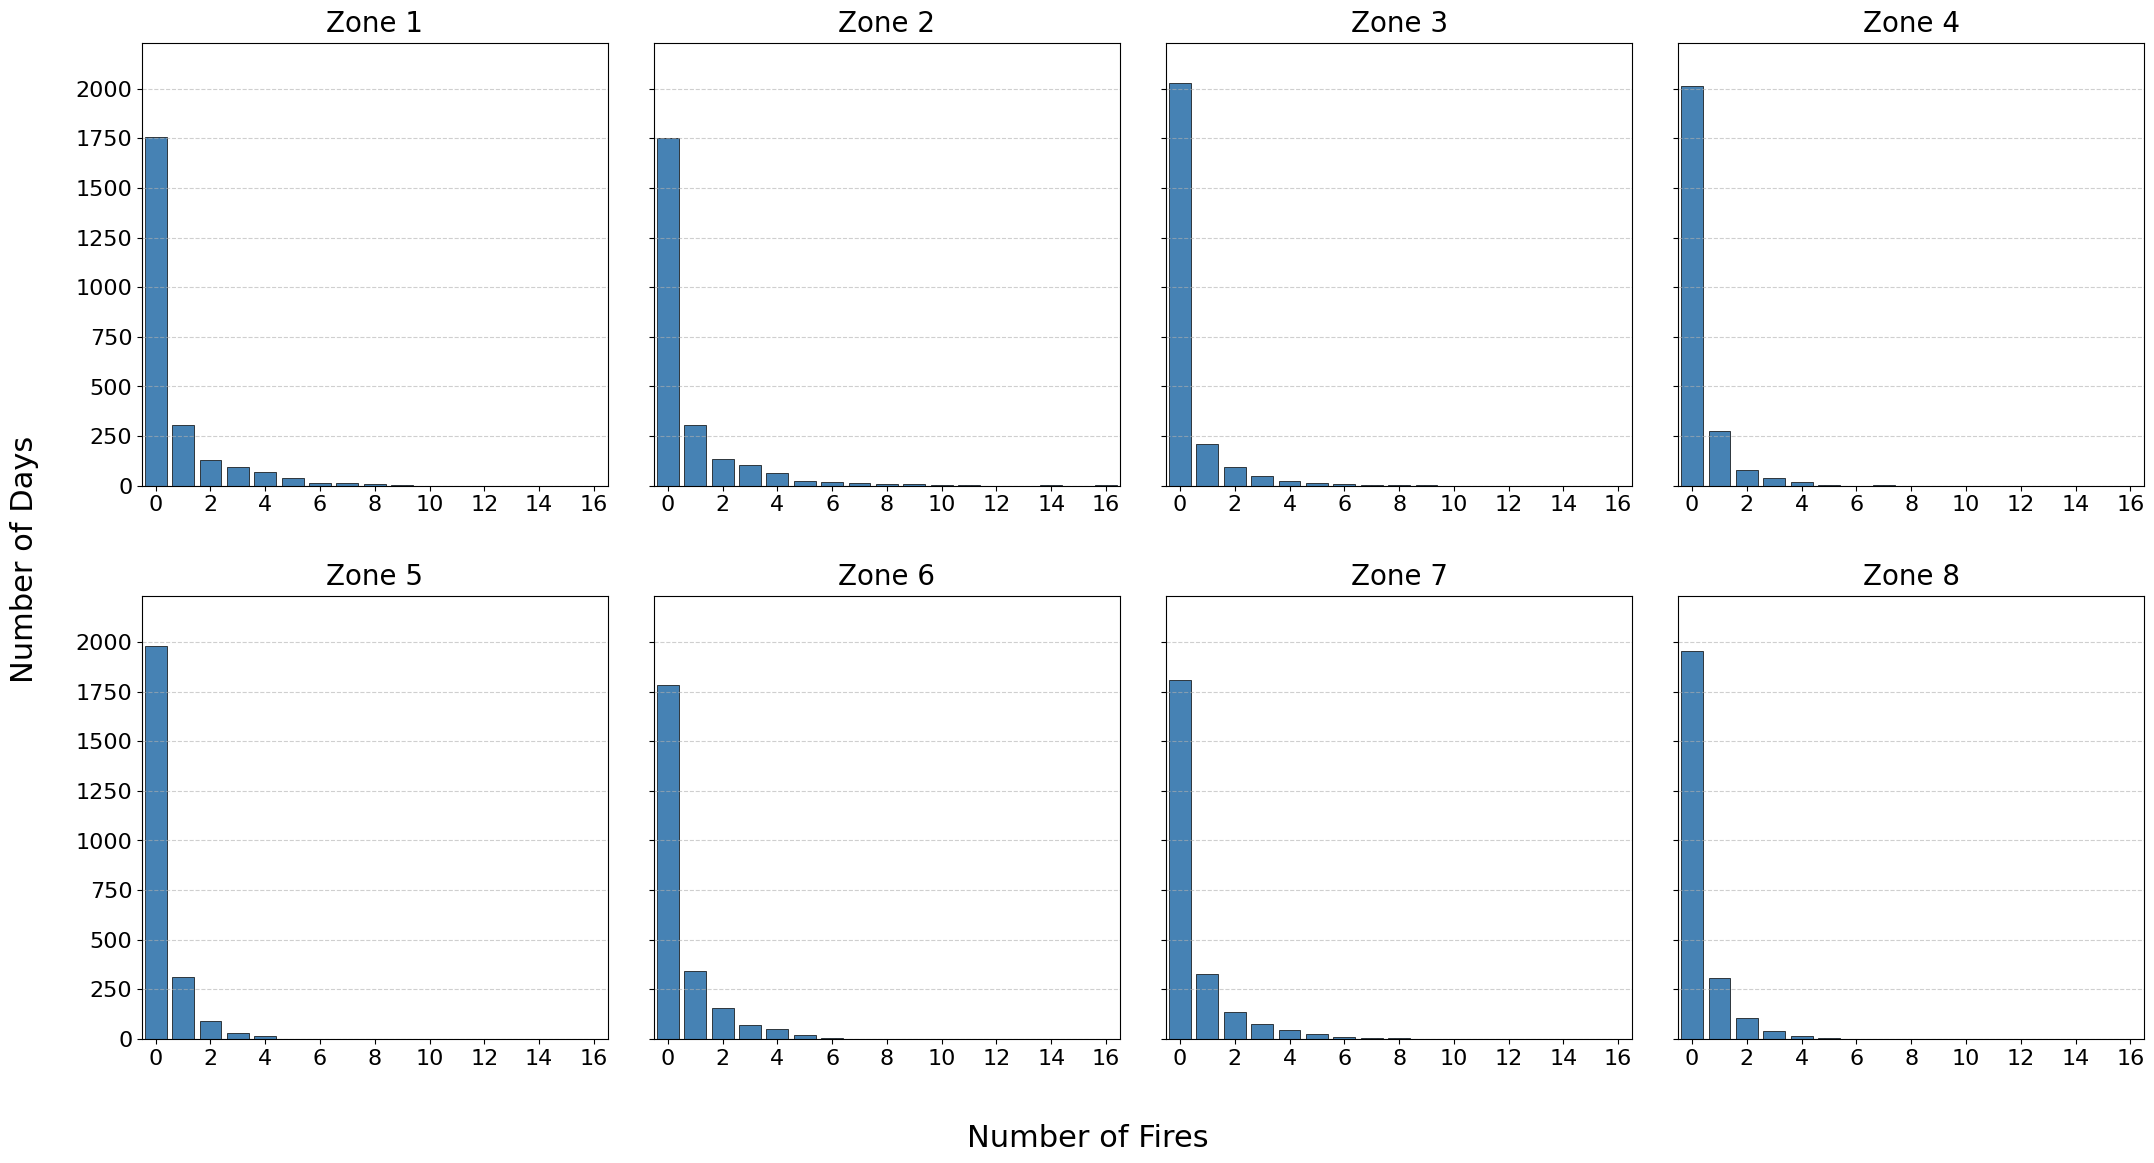

In [73]:
# Plot a multi-panel distribution of daily fire counts for all zones
os.makedirs("EDA_plots", exist_ok=True)
zones = sorted(climate_fire_df["Zone_ID"].unique())
max_class = int(climate_fire_df["Num_Fires"].max())
max_count = max(climate_fire_df[climate_fire_df["Zone_ID"] == z]["Num_Fires"].value_counts().max() for z in zones)

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, zone in enumerate(zones):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    fire_counts = zone_df["Num_Fires"].value_counts().sort_index()
    axes[i].bar(fire_counts.index, fire_counts.values, color="steelblue", edgecolor="black", linewidth=0.5)
    axes[i].set_title(f"Zone {zone}", fontsize=20, pad=8)
    axes[i].set_ylim(0, max_count * 1.1)
    axes[i].set_xlim(-0.5, max_class + 0.5)
    axes[i].set_xticks(range(0, max_class + 1, 2))
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    axes[i].tick_params(axis="x", labelsize=16)
    axes[i].tick_params(axis="y", labelsize=16)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Number of Fires", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Number of Days", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.07, bottom=0.10, right=0.98, top=0.93, wspace=0.10, hspace=0.25)

output_path = os.path.join("EDA_plots", "daily_fire_count_distribution_zones.png")
plt.savefig(output_path, dpi=600, bbox_inches="tight")


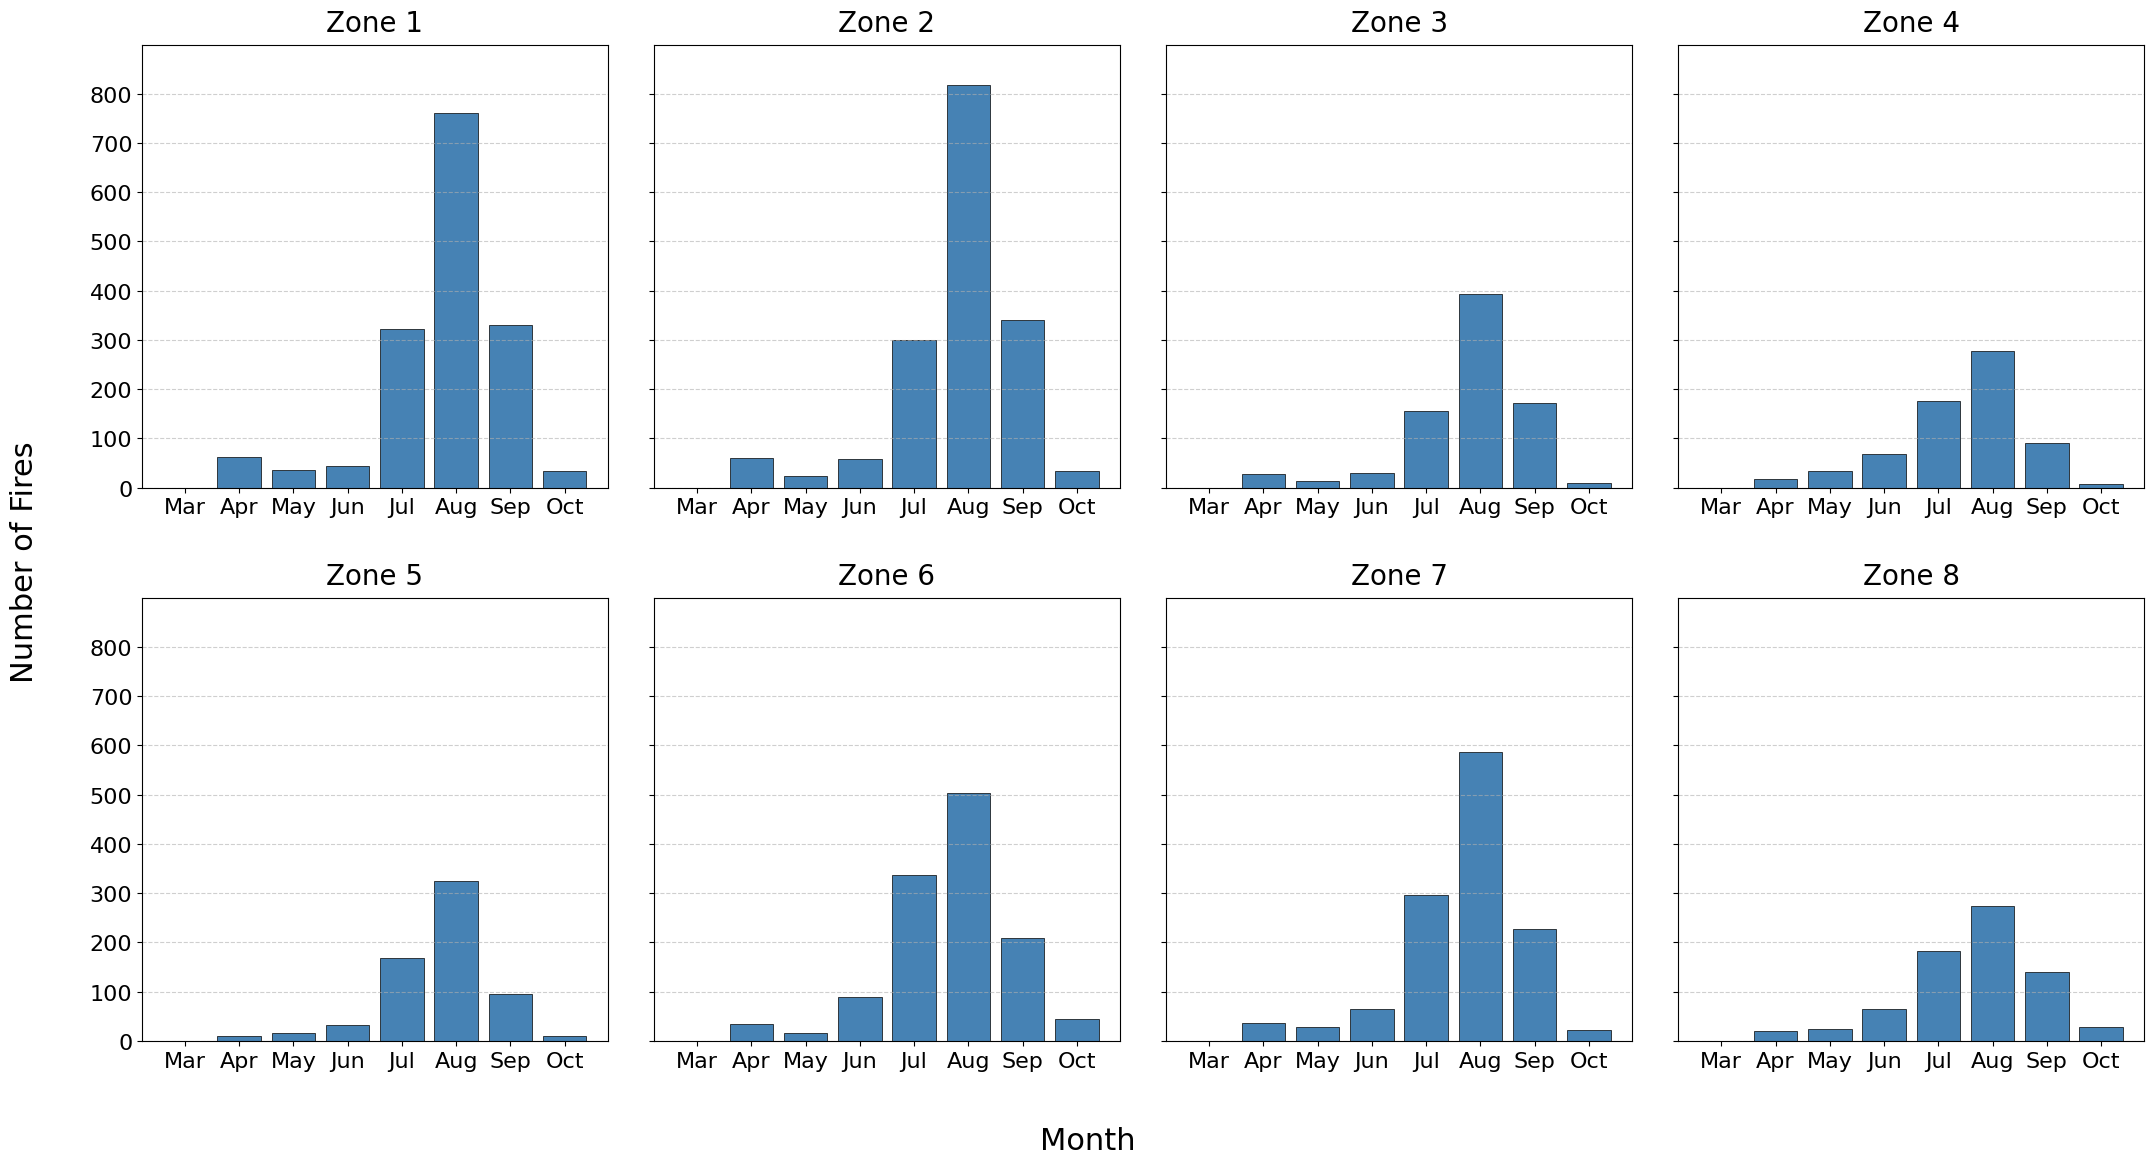

In [75]:
# Plot monthly fire count totals per zone across all years in one multi-panel figure
months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

tmp = climate_fire_df.copy()
tmp["Month"] = tmp["Date"].dt.month
monthly = (tmp.groupby(["Zone_ID","Month"])["Num_Fires"].sum()
             .unstack(fill_value=0).reindex(columns=months, fill_value=0))
zones = sorted(monthly.index)
max_y = monthly.values.max()

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = monthly.loc[z].values
    axes[i].bar(range(len(months)), vals, color="steelblue", edgecolor="black", linewidth=0.5)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(0, max_y * 1.1)
    axes[i].set_xticks(range(len(months)))
    axes[i].set_xticklabels(labels, fontsize=16)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    axes[i].tick_params(axis="y", labelsize=16)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Number of Fires", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.07, bottom=0.10, right=0.98, top=0.93, wspace=0.10, hspace=0.25)

out_path = os.path.join("EDA_plots", "monthly_fire_totals_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")


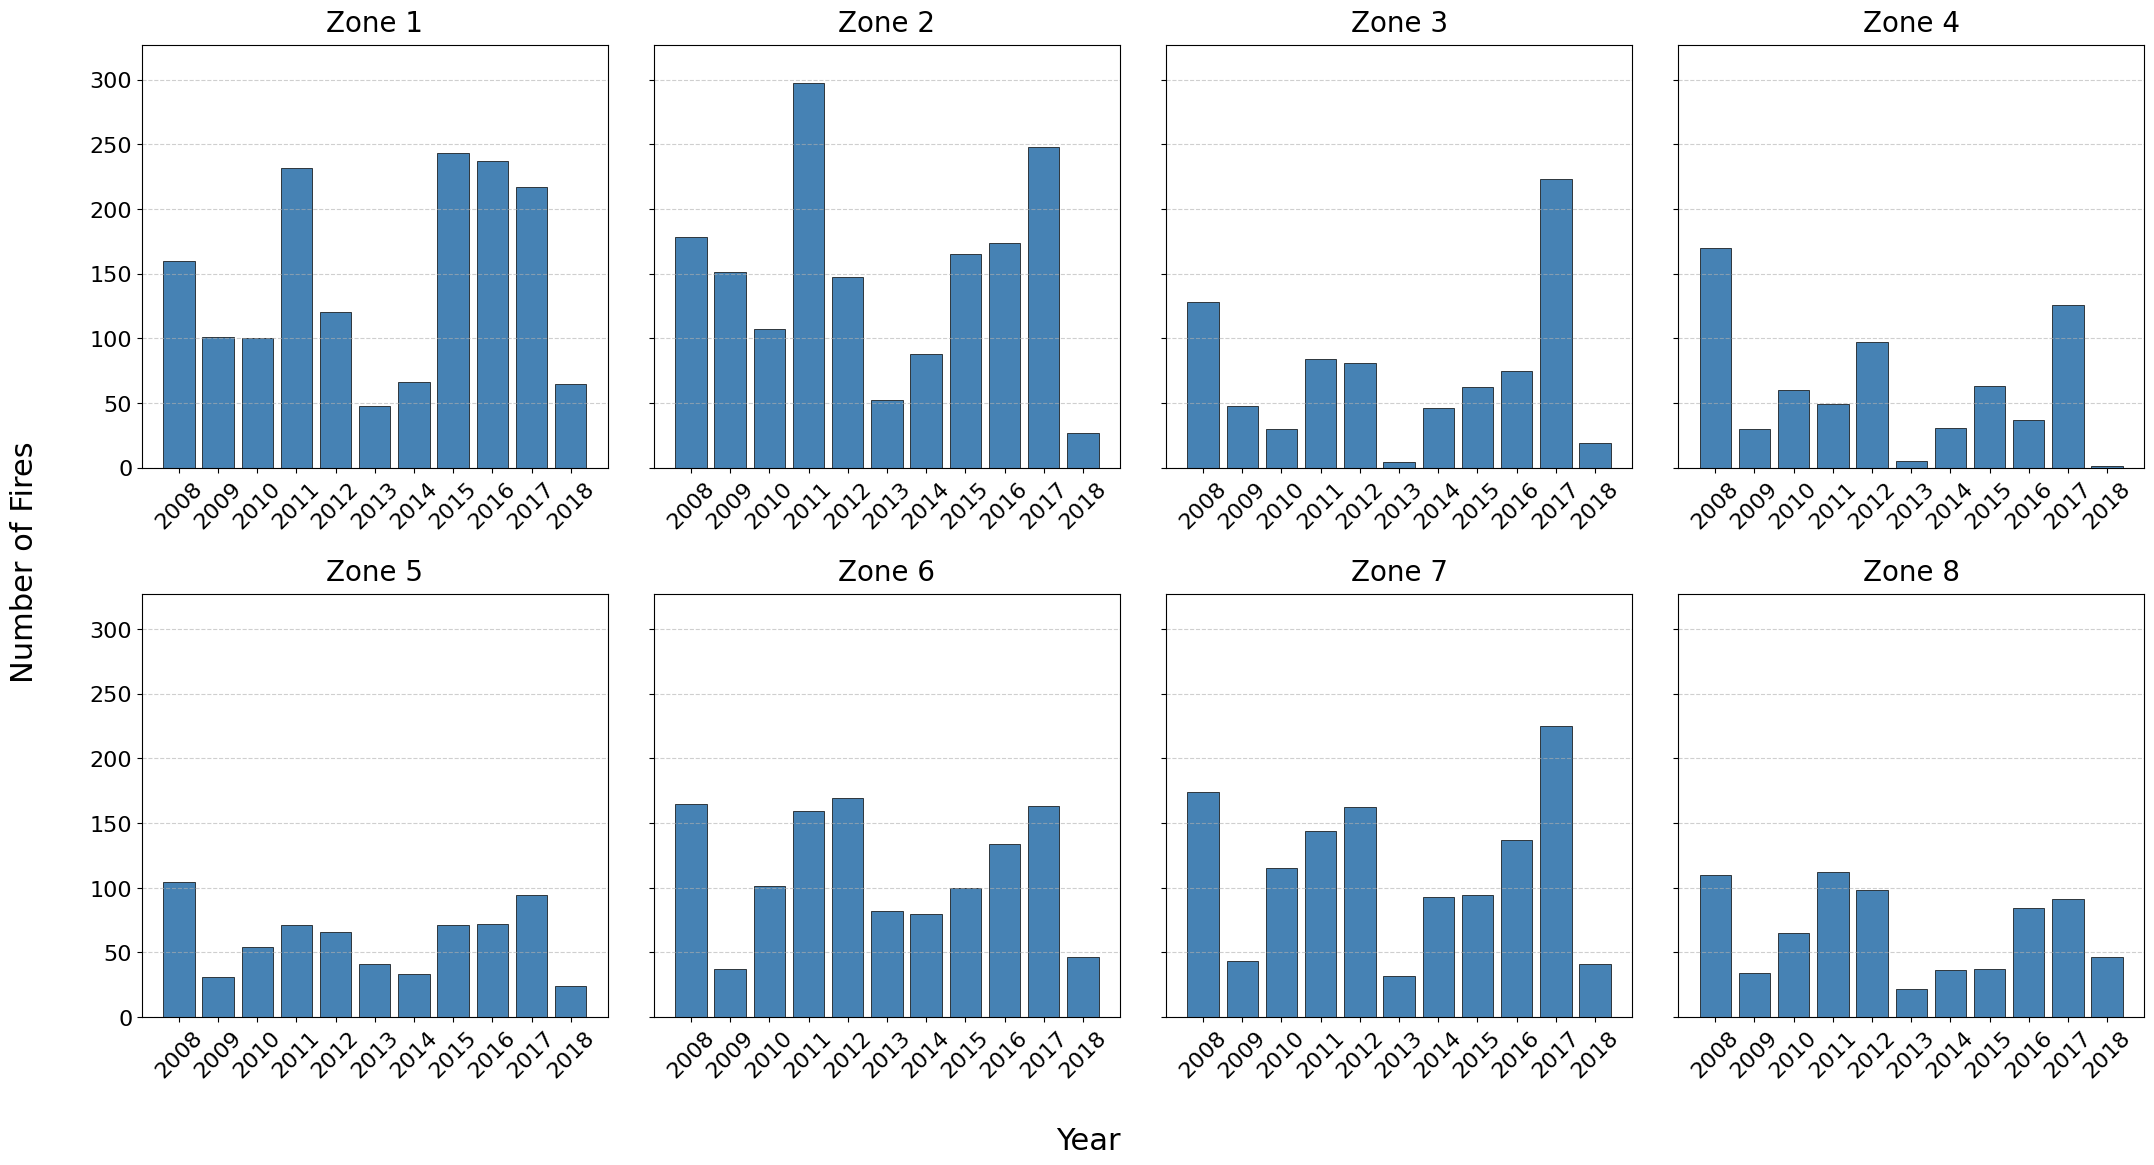

In [77]:
# Plot yearly fire count totals per zone
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year
yearly = (df.groupby(["Zone_ID","Year"])["Num_Fires"].sum()
            .unstack(fill_value=0).reindex(columns=range(2008, 2019), fill_value=0))
zones = sorted(yearly.index)
years = list(yearly.columns)
max_y = yearly.values.max()

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = yearly.loc[z].values
    axes[i].bar(years, vals, edgecolor="black", linewidth=0.5, color="steelblue")
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(0, max_y * 1.1)
    axes[i].set_xticks(years)
    axes[i].set_xticklabels(years, rotation=45, fontsize=16)  
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    axes[i].tick_params(axis="y", labelsize=16)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Year", ha="center", fontsize=22)  
fig.text(0.01, 0.5, "Number of Fires", va="center", rotation="vertical", fontsize=22)  

plt.subplots_adjust(left=0.07, bottom=0.12, right=0.98, top=0.93, wspace=0.10, hspace=0.30)

out_path = os.path.join("EDA_plots", "yearly_fire_totals_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")


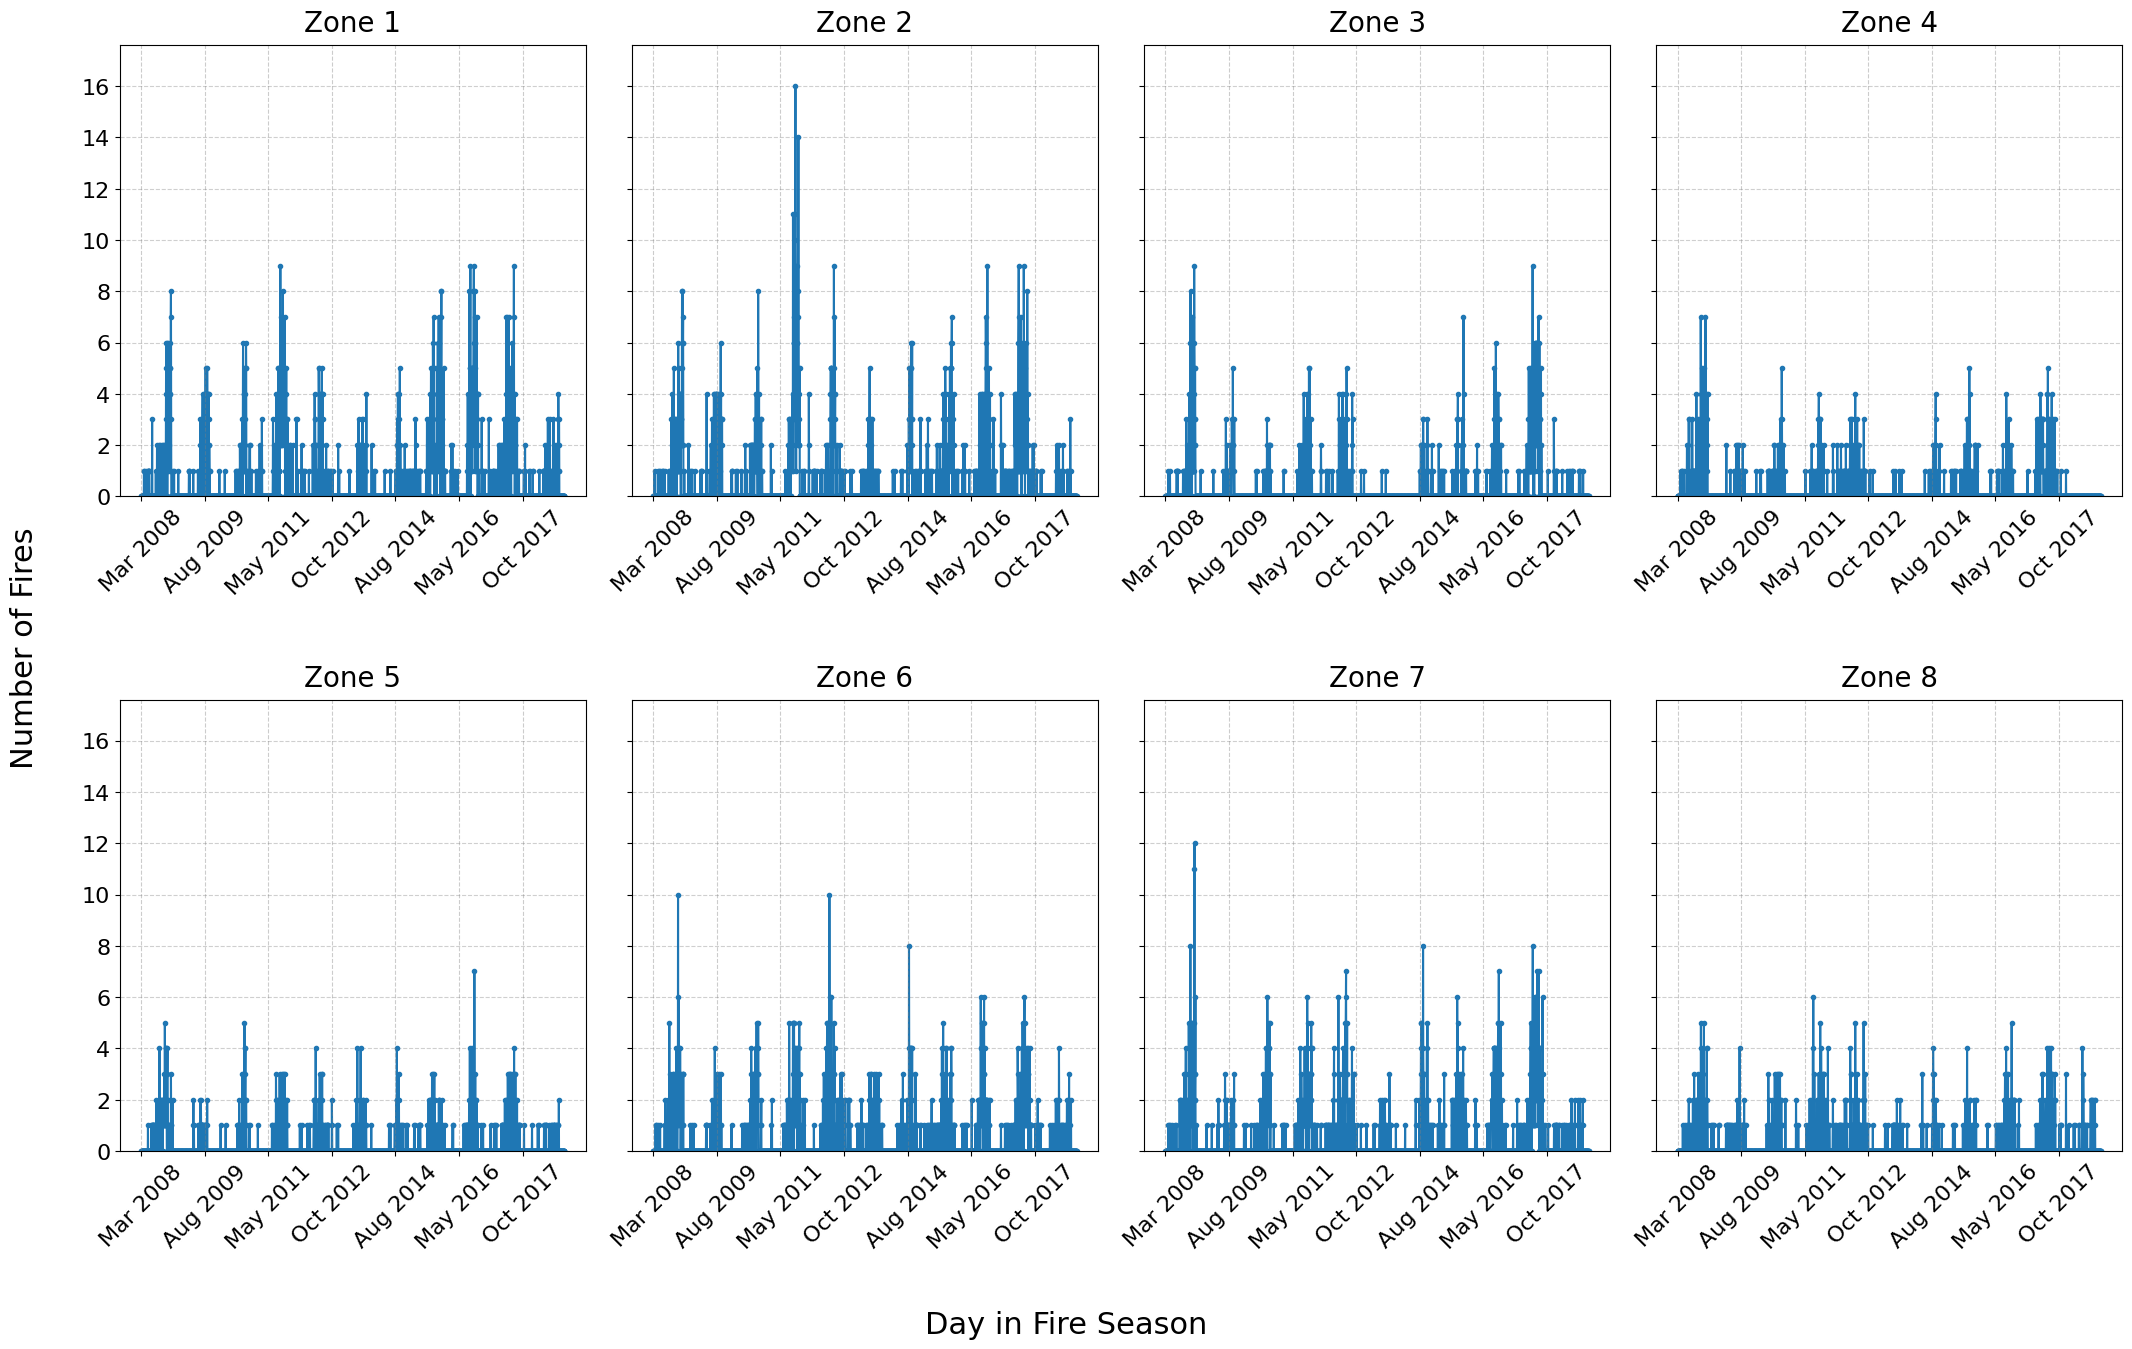

In [82]:
# Plot daily fire time series per zone
zones = sorted(climate_fire_df["Zone_ID"].unique())
max_y = climate_fire_df["Num_Fires"].max()

fig, axes = plt.subplots(2, 4, figsize=(22, 14), sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == z].copy()
    zone_df["Month"] = zone_df["Date"].dt.month
    zone_df = zone_df[zone_df["Month"].between(3, 10)].sort_values("Date").reset_index(drop=True)

    axes[i].plot(range(len(zone_df)), zone_df["Num_Fires"],
                 color="#1f77b4", linewidth=1.5, marker="o", markersize=3)

    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(0, max_y * 1.1)

    tick_interval = 365
    xticks = np.arange(0, len(zone_df), tick_interval)
    xtick_labels = zone_df["Date"].dt.strftime('%b %Y').iloc[xticks]
    axes[i].set_xticks(xticks)
    axes[i].set_xticklabels(xtick_labels, rotation=45, fontsize=16)

    axes[i].tick_params(axis="y", labelsize=16)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

    for xt in xticks:
        axes[i].axvline(x=xt, color="gray", linestyle="--", alpha=0.4, linewidth=0.8)

fig.text(0.5, 0.01, "Day in Fire Season", ha="center", fontsize=22)
fig.text(0.02, 0.5, "Number of Fires", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.07, bottom=0.14, right=0.98, top=0.93, wspace=0.10, hspace=0.45)

out_path = os.path.join("EDA_plots", "daily_fire_time_series_zones_nogaps.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")


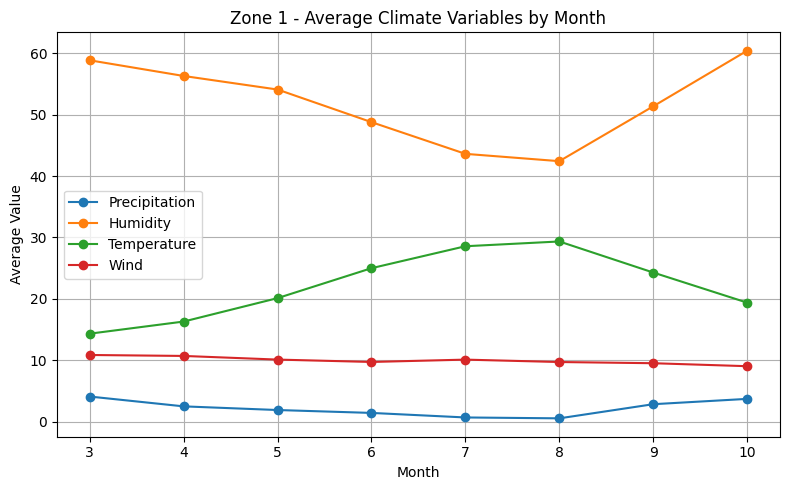

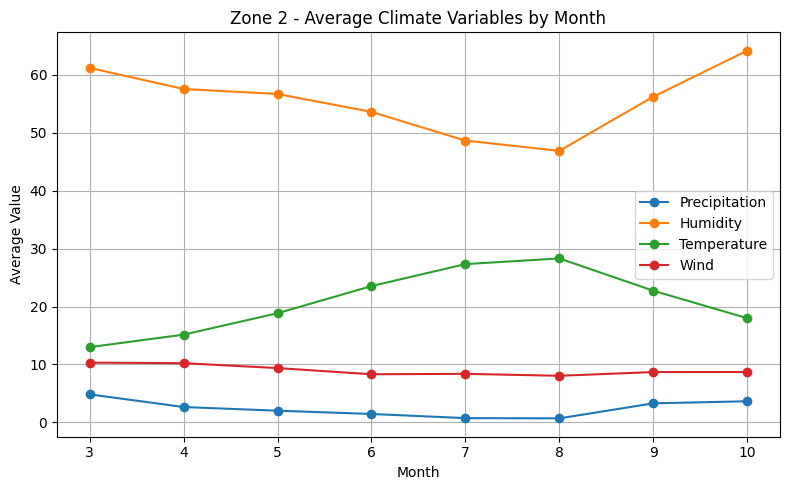

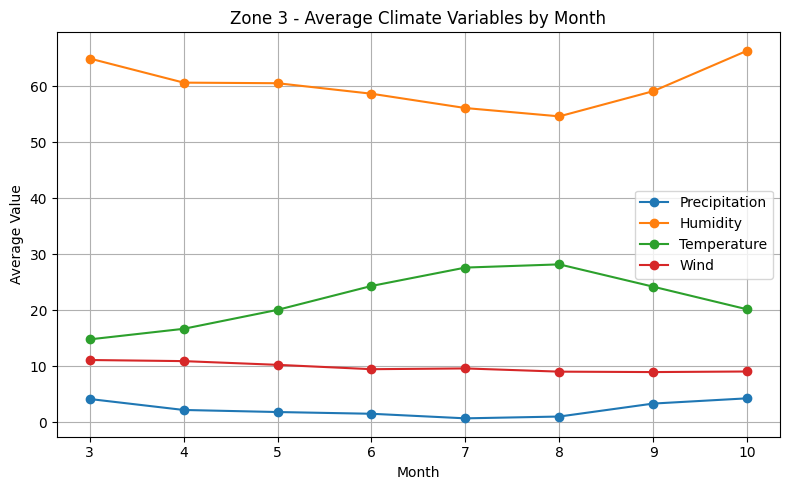

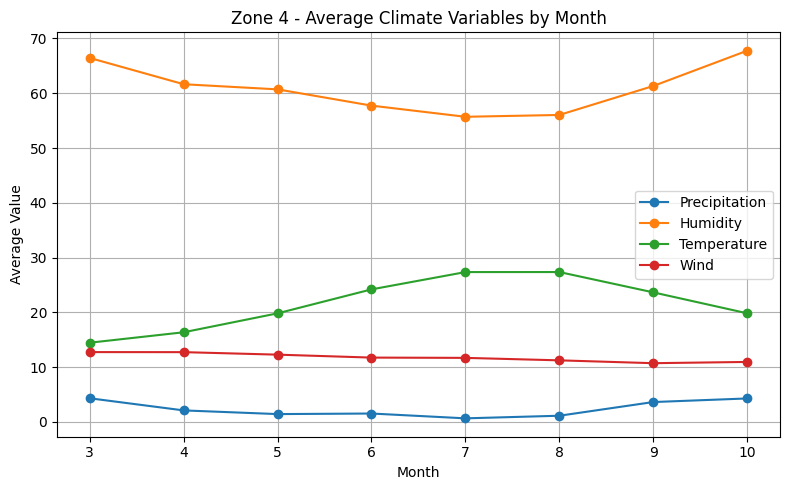

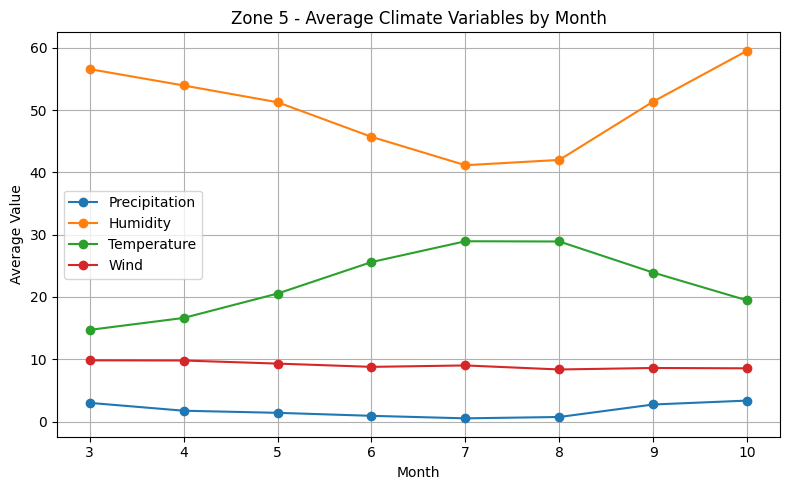

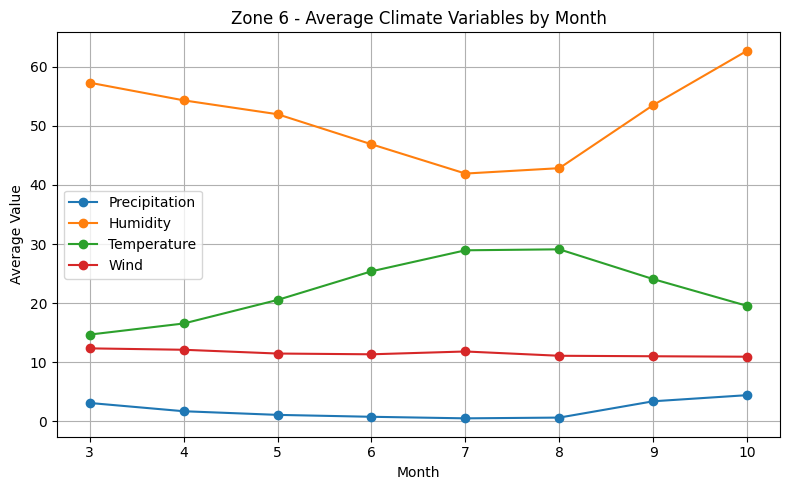

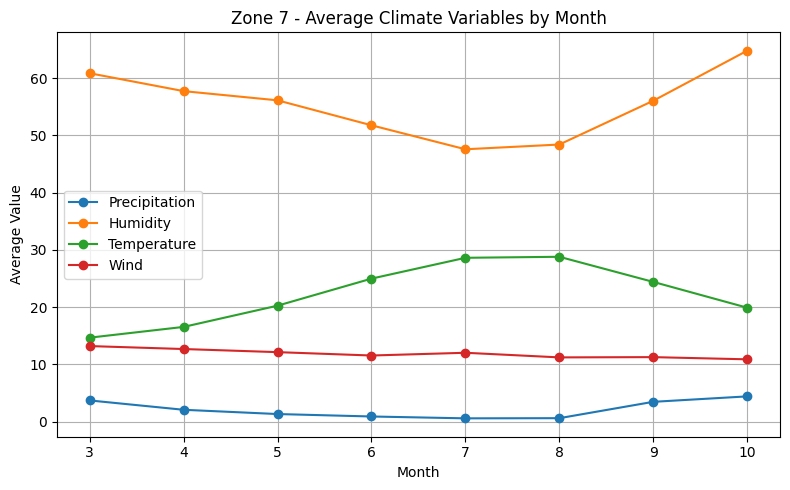

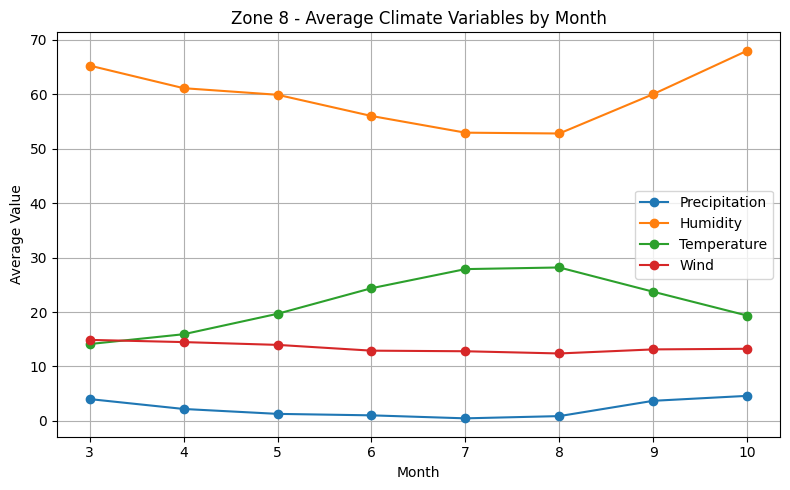

In [23]:
# Plot average climate variables by month for each zone
climate_vars = ["Precipitation", "Humidity", "Temperature", "Wind"]

for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    monthly_avg = zone_df.groupby("Month")[climate_vars].mean()

    monthly_avg.plot(marker="o", figsize=(8, 5))
    plt.title(f"Zone {zone} - Average Climate Variables by Month")
    plt.xlabel("Month")
    plt.ylabel("Average Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [24]:
# Compute lag-1 day correlation between climate variables and fire counts
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone].copy()

    zone_df["Precipitation_lag1"] = zone_df["Precipitation"].shift(1)
    zone_df["Humidity_lag1"] = zone_df["Humidity"].shift(1)
    zone_df["Temperature_lag1"] = zone_df["Temperature"].shift(1)
    zone_df["Wind_lag1"] = zone_df["Wind"].shift(1)

    zone_df.dropna(inplace=True)

    lag_corr = zone_df[[
        "Precipitation_lag1",
        "Humidity_lag1",
        "Temperature_lag1",
        "Wind_lag1",
        "Num_Fires"
    ]].corr()

    print(f"Zone {zone} - Lag-1 Correlation with Num_Fires:")
    print(lag_corr["Num_Fires"].drop("Num_Fires").round(3))
    print("-" * 40)


Zone 1 - Lag-1 Correlation with Num_Fires:
Precipitation_lag1   -0.151
Humidity_lag1        -0.370
Temperature_lag1      0.436
Wind_lag1             0.040
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 2 - Lag-1 Correlation with Num_Fires:
Precipitation_lag1   -0.141
Humidity_lag1        -0.333
Temperature_lag1      0.456
Wind_lag1            -0.087
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 3 - Lag-1 Correlation with Num_Fires:
Precipitation_lag1   -0.112
Humidity_lag1        -0.299
Temperature_lag1      0.379
Wind_lag1            -0.015
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 4 - Lag-1 Correlation with Num_Fires:
Precipitation_lag1   -0.120
Humidity_lag1        -0.285
Temperature_lag1      0.373
Wind_lag1             0.010
Name: Num_Fires, dtype: float64
----------------------------------------
Zone 5 - Lag-1 Correlation with Num_Fires:
Precipitation_lag1   -0.099
Humidity_lag1    

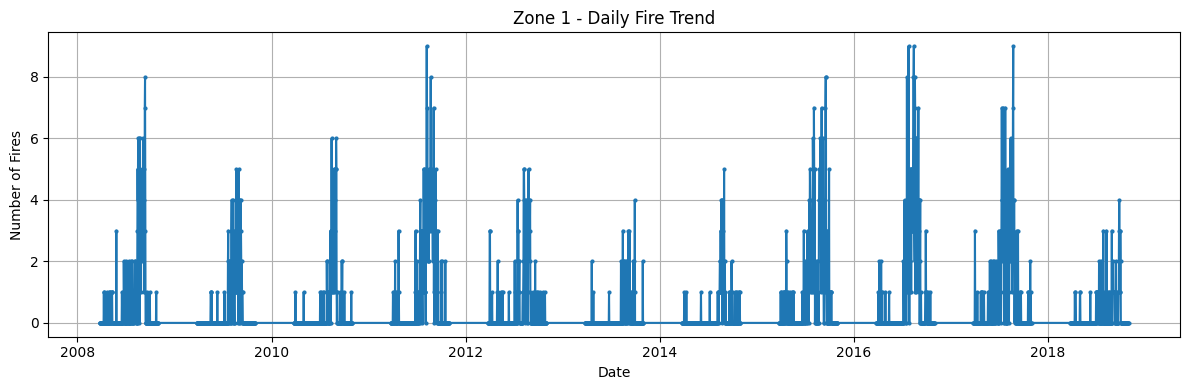

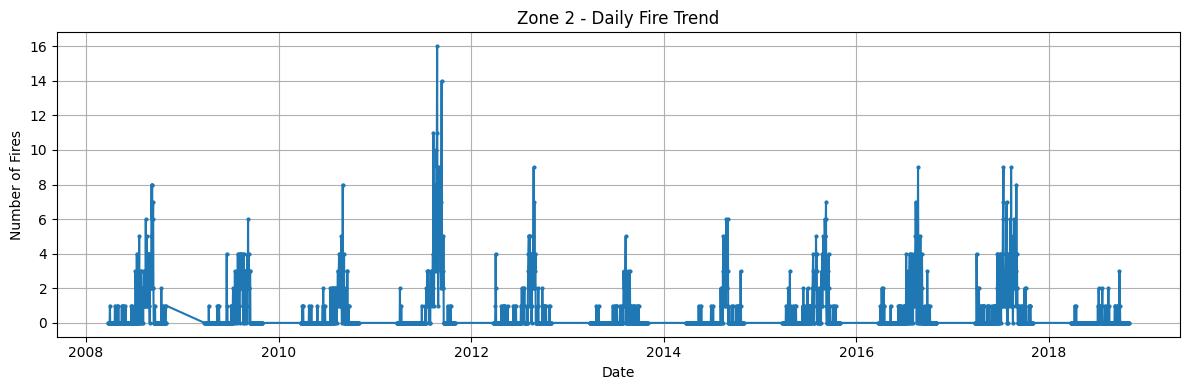

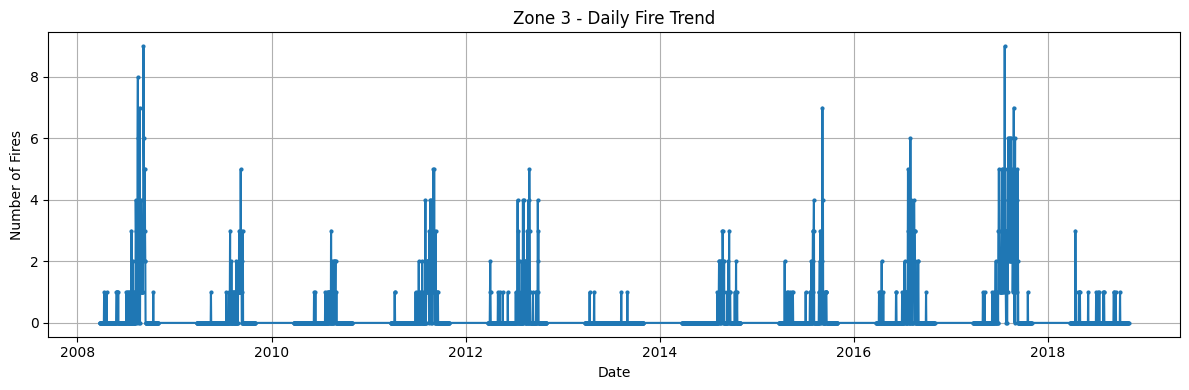

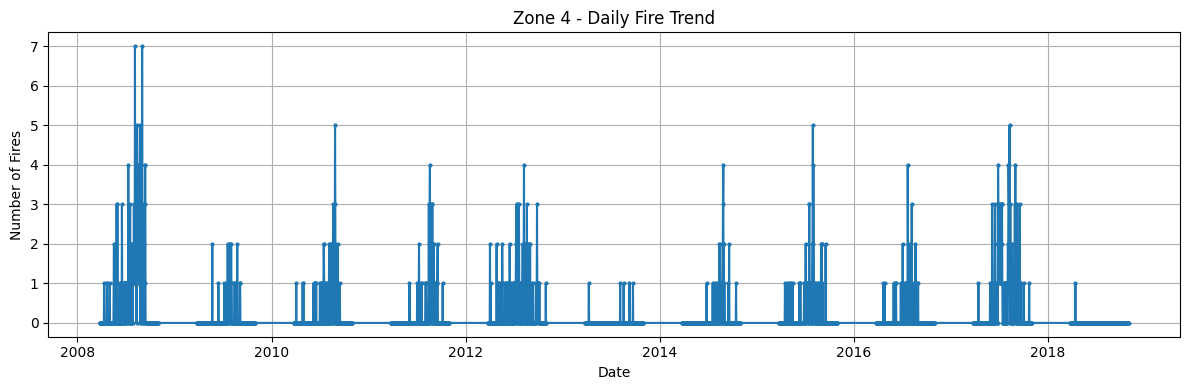

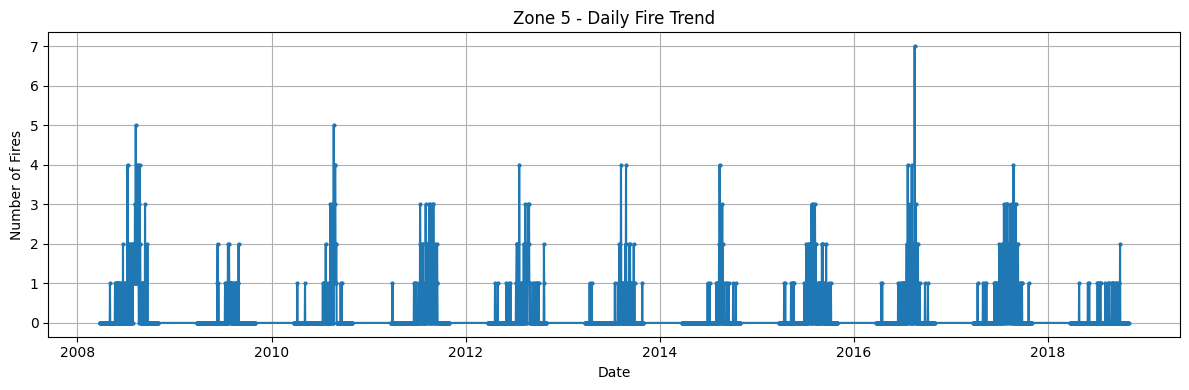

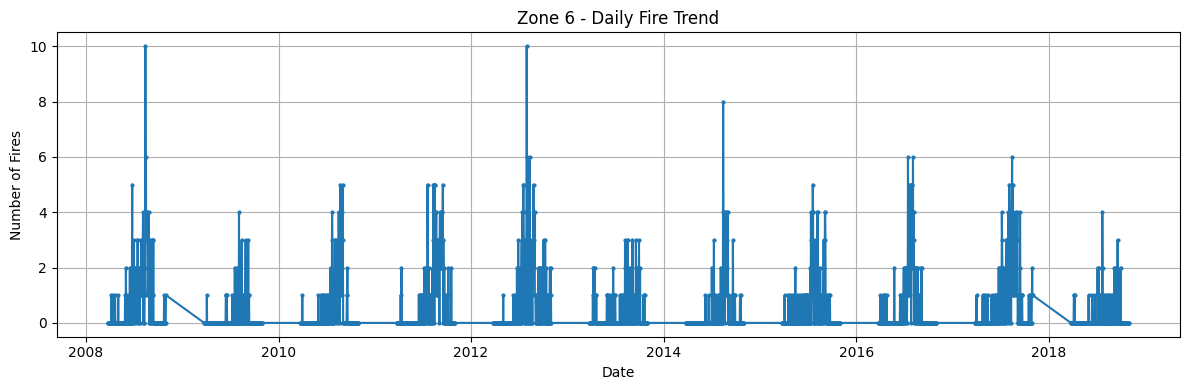

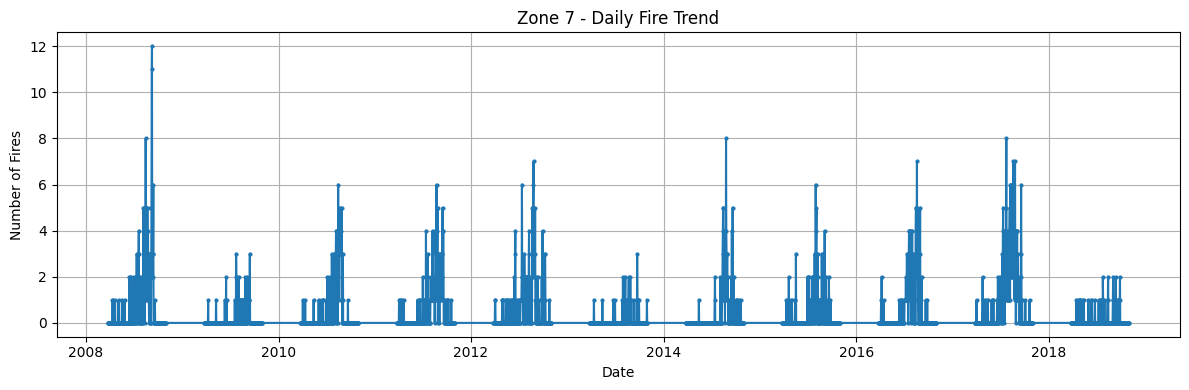

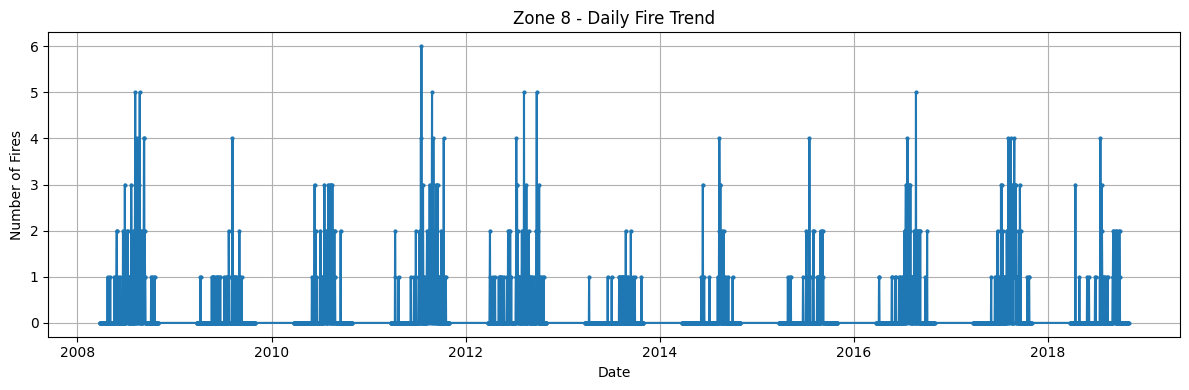

In [25]:
# Plot daily fire trend over time for each zone
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]

    plt.figure(figsize=(12, 4))
    plt.plot(zone_df["Date"], zone_df["Num_Fires"], marker="o", linestyle="-", markersize=2)
    plt.title(f"Zone {zone} - Daily Fire Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Fires")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


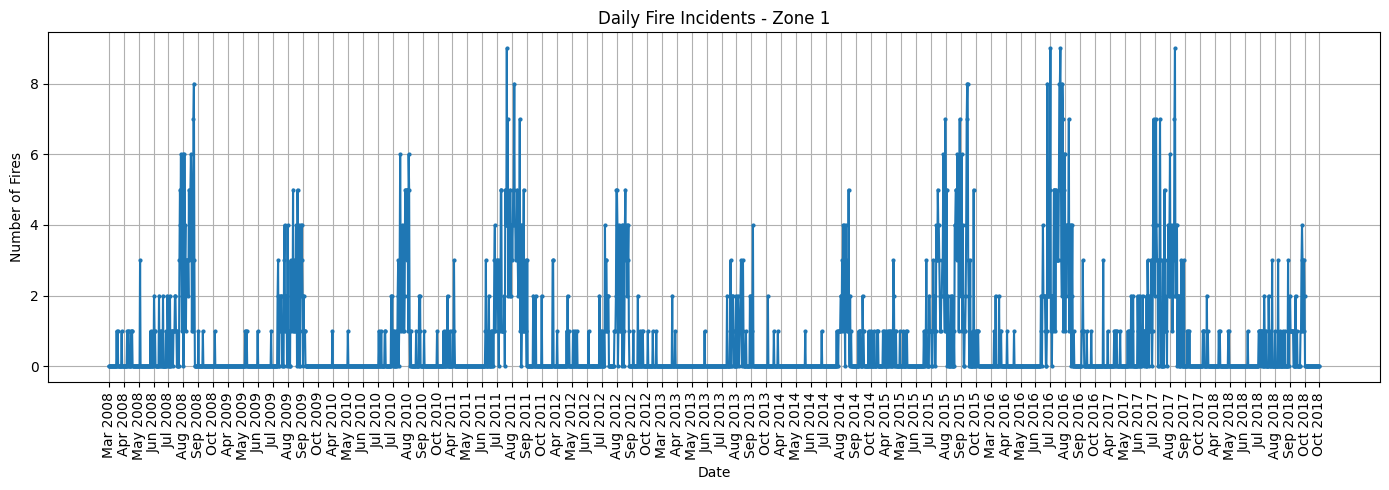

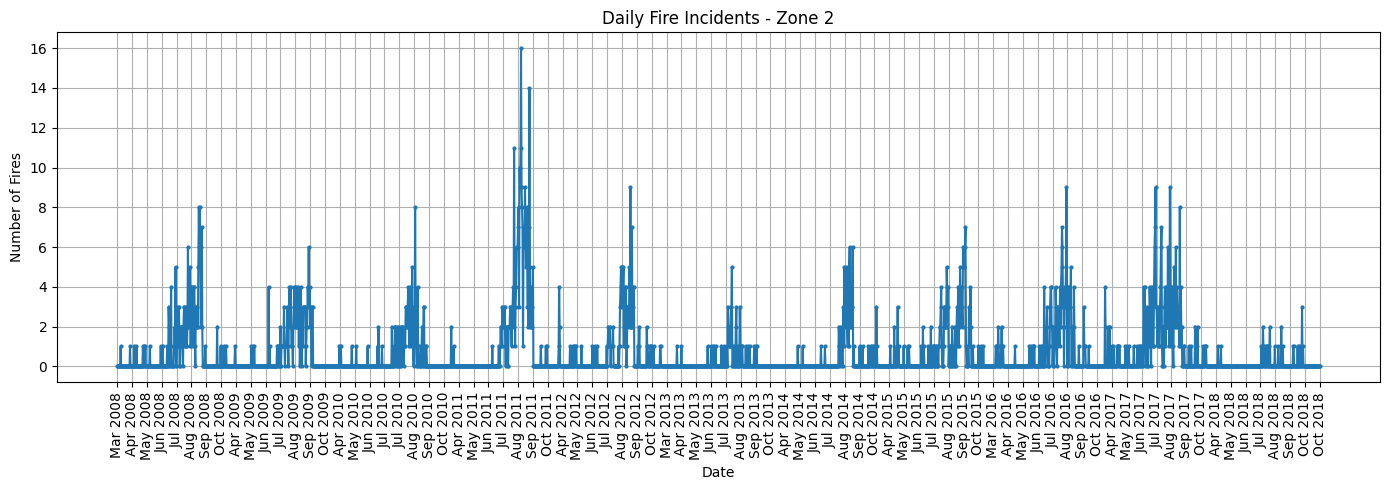

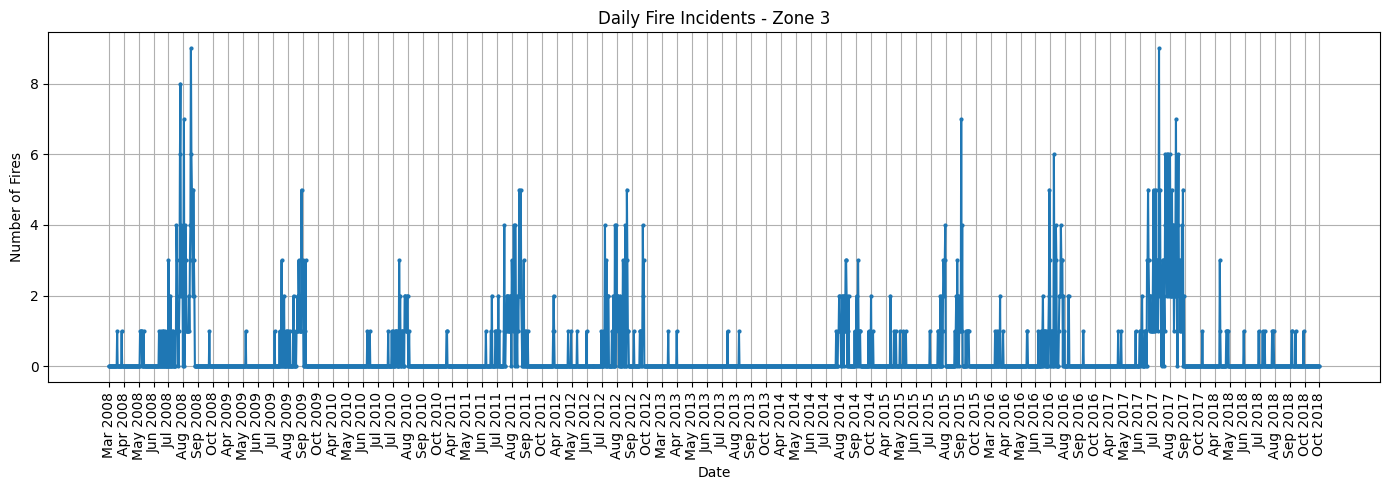

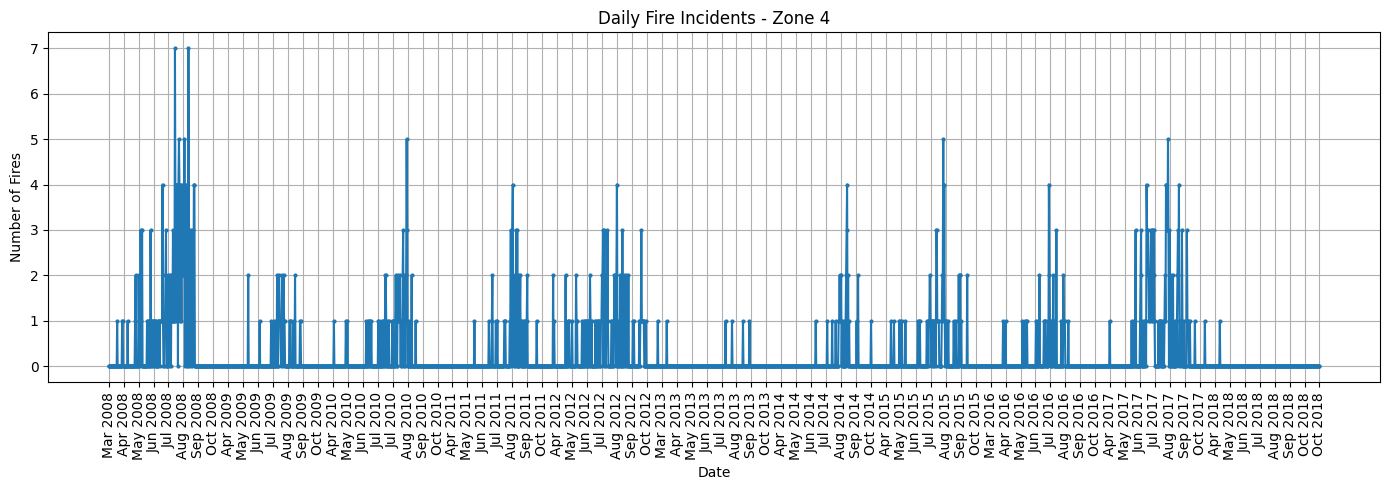

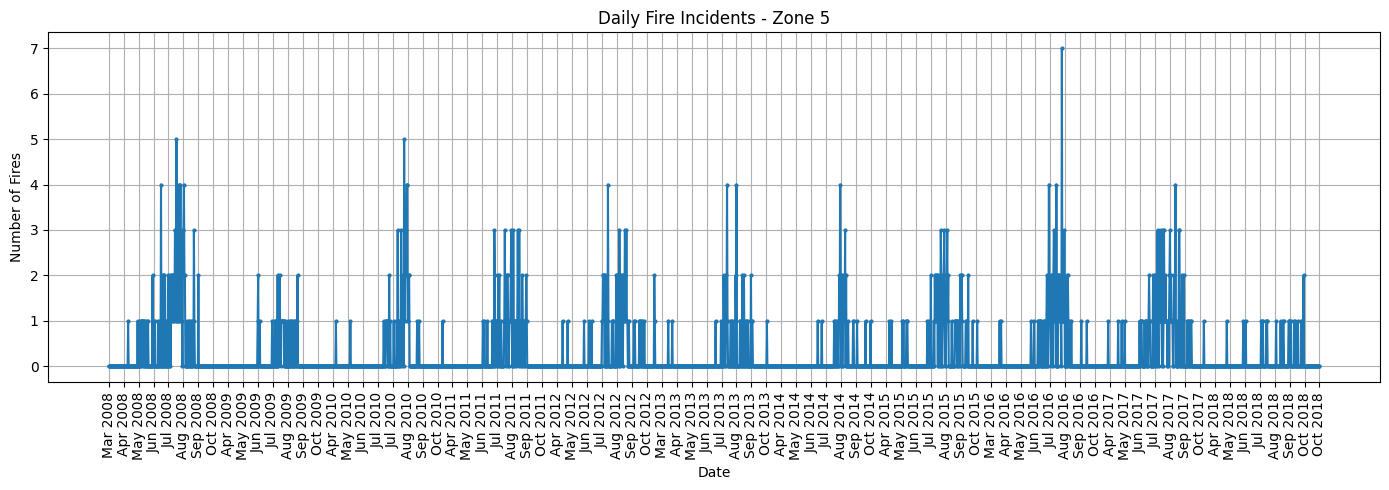

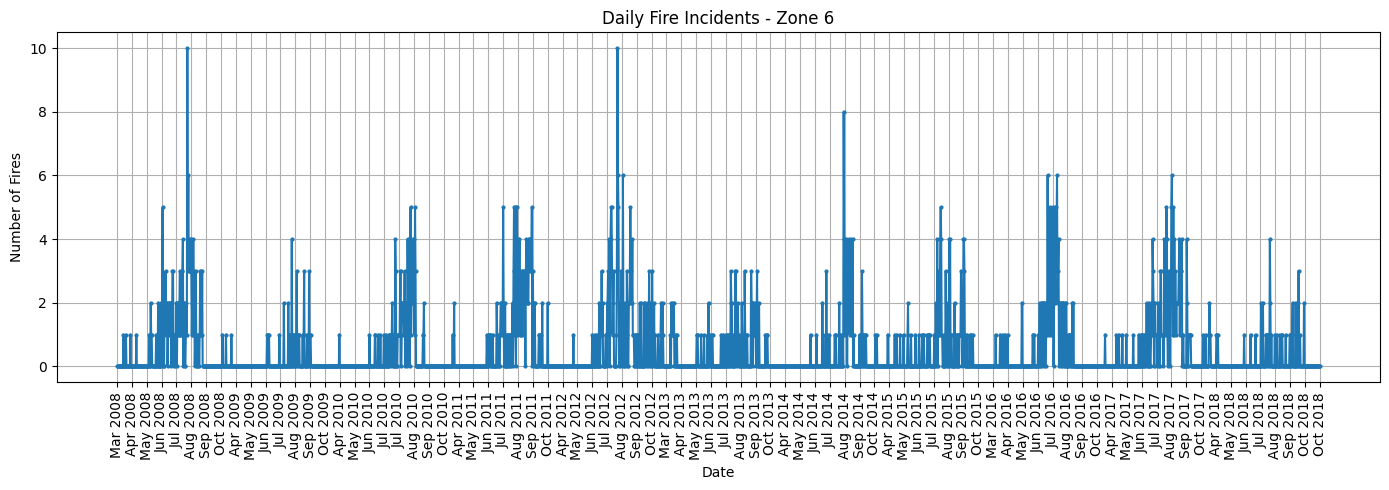

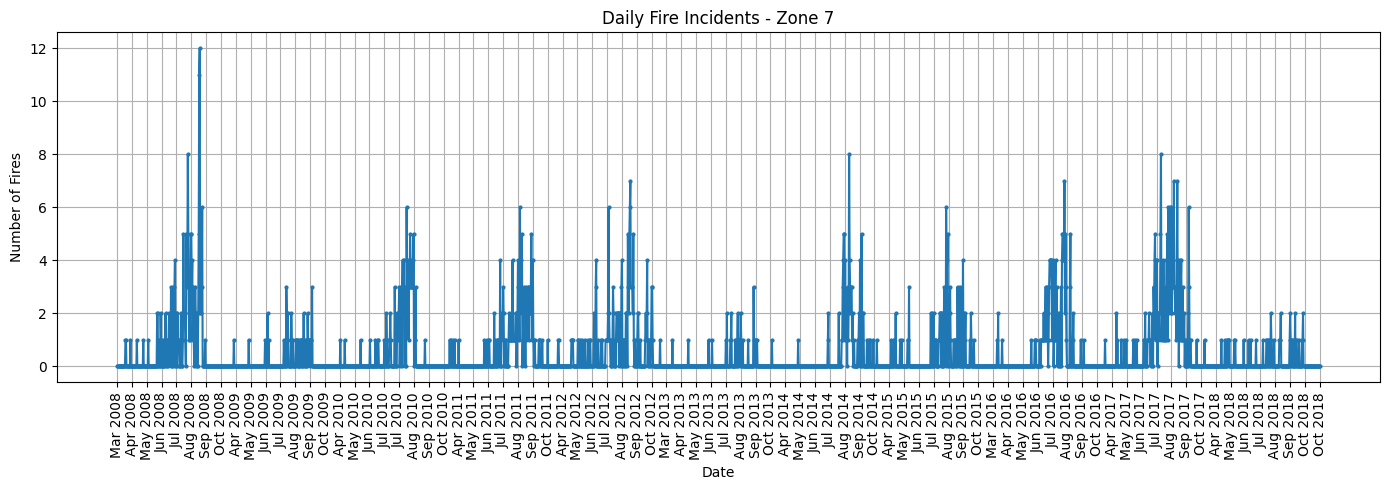

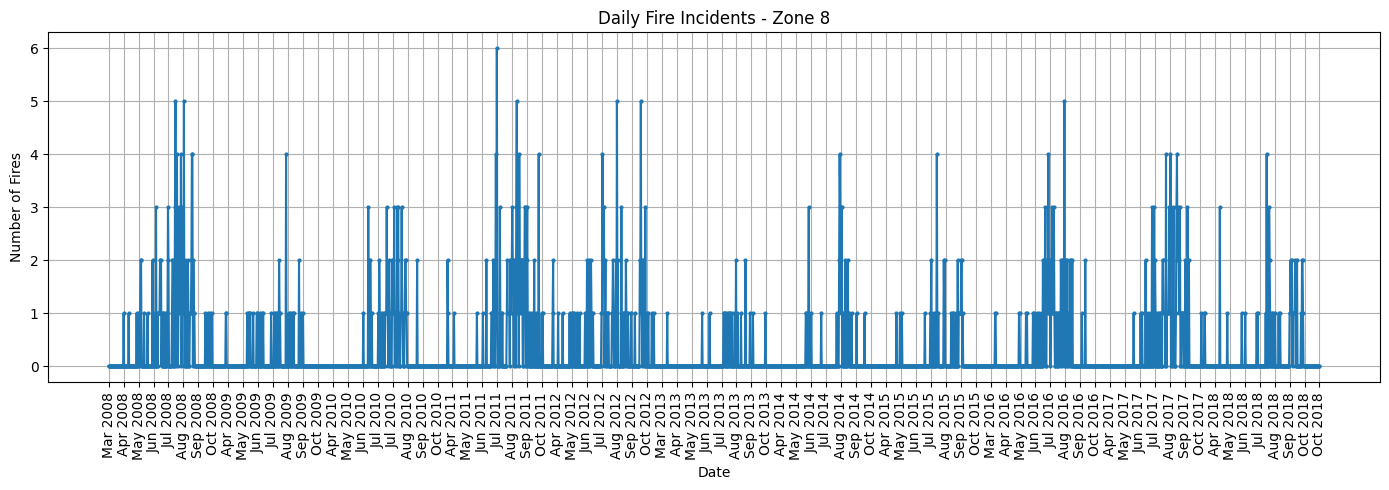

In [26]:
# Plot sequential fire season trend per zone without gaps from off-season months
for zone in sorted(climate_fire_df["Zone_ID"].unique()):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone].copy()

    zone_df["Month"] = zone_df["Date"].dt.month
    zone_df = zone_df[zone_df["Month"].between(3, 10)].copy()
    zone_df = zone_df.sort_values("Date").reset_index(drop=True)

    plt.figure(figsize=(14, 5))
    plt.plot(range(len(zone_df)), zone_df["Num_Fires"], marker="o", linestyle="-", markersize=2)
    plt.title(f"Daily Fire Incidents - Zone {zone}")
    plt.xlabel("Date")
    plt.ylabel("Number of Fires")

    tick_interval = 30
    xticks = np.arange(0, len(zone_df), tick_interval)
    xtick_labels = zone_df["Date"].dt.strftime('%b %Y').iloc[xticks]

    plt.xticks(ticks=xticks, labels=xtick_labels, rotation='vertical')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


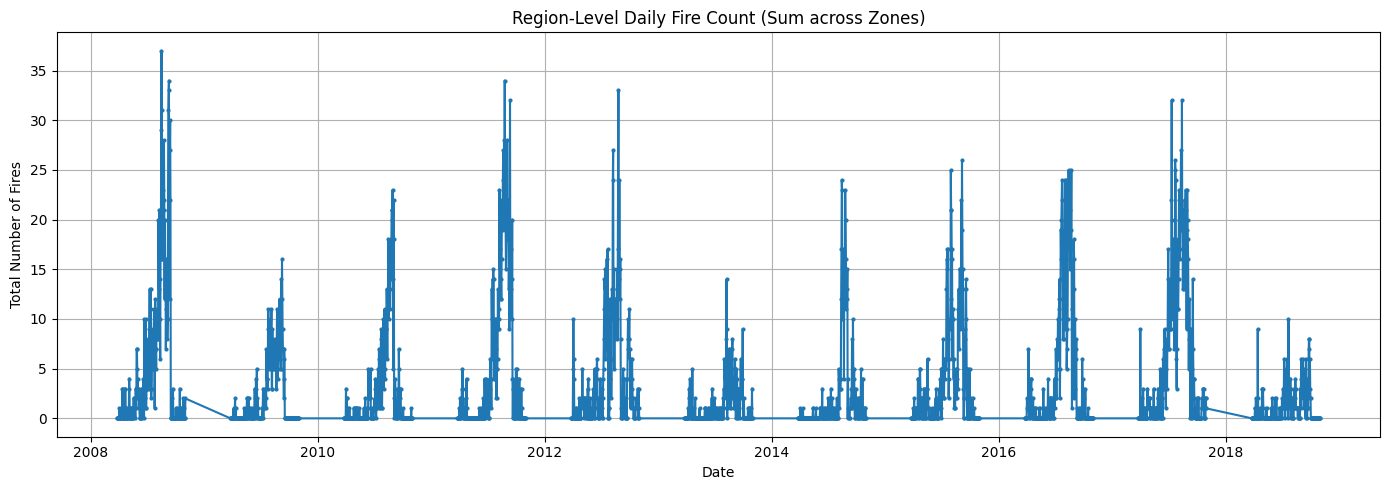

In [27]:
# Aggregate fire as sum and climate variables as average per day across all zones (region-level)
region_daily_df = climate_fire_df.groupby("Date").agg({
    "Num_Fires": "sum",
    "Temperature": "mean",
    "Humidity": "mean",
    "Precipitation": "mean",
    "Wind": "mean"
}).reset_index()

plt.figure(figsize=(14, 5))
plt.plot(region_daily_df["Date"], region_daily_df["Num_Fires"], marker="o", linestyle="-", markersize=2)
plt.title("Region-Level Daily Fire Count (Sum across Zones)")
plt.xlabel("Date")
plt.ylabel("Total Number of Fires")
plt.grid(True)
plt.tight_layout()
plt.show()


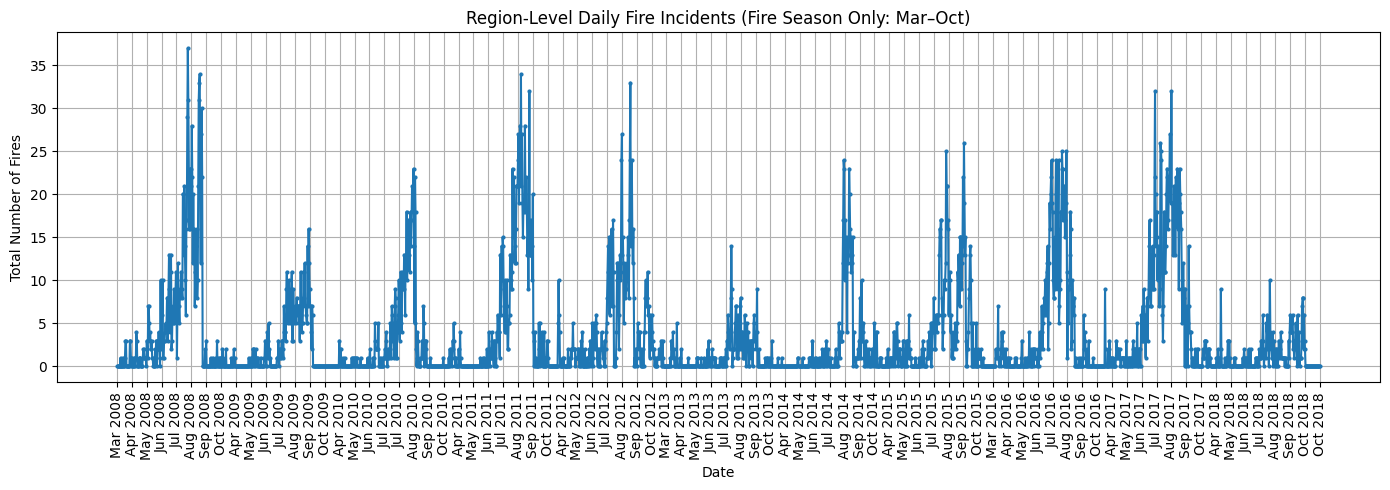

In [28]:
region_daily_df["Month"] = region_daily_df["Date"].dt.month
region_fire_season_df = region_daily_df[region_daily_df["Month"].between(3, 10)].copy()
region_fire_season_df = region_fire_season_df.sort_values("Date").reset_index(drop=True)

plt.figure(figsize=(14, 5))
plt.plot(range(len(region_fire_season_df)), region_fire_season_df["Num_Fires"], marker="o", linestyle="-", markersize=2)
plt.title("Region-Level Daily Fire Incidents (Fire Season Only: Mar–Oct)")
plt.xlabel("Date")
plt.ylabel("Total Number of Fires")

tick_interval = 30
xticks = np.arange(0, len(region_fire_season_df), tick_interval)
xtick_labels = region_fire_season_df["Date"].dt.strftime('%b %Y').iloc[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation='vertical')

plt.grid(True)
plt.tight_layout()
plt.show()

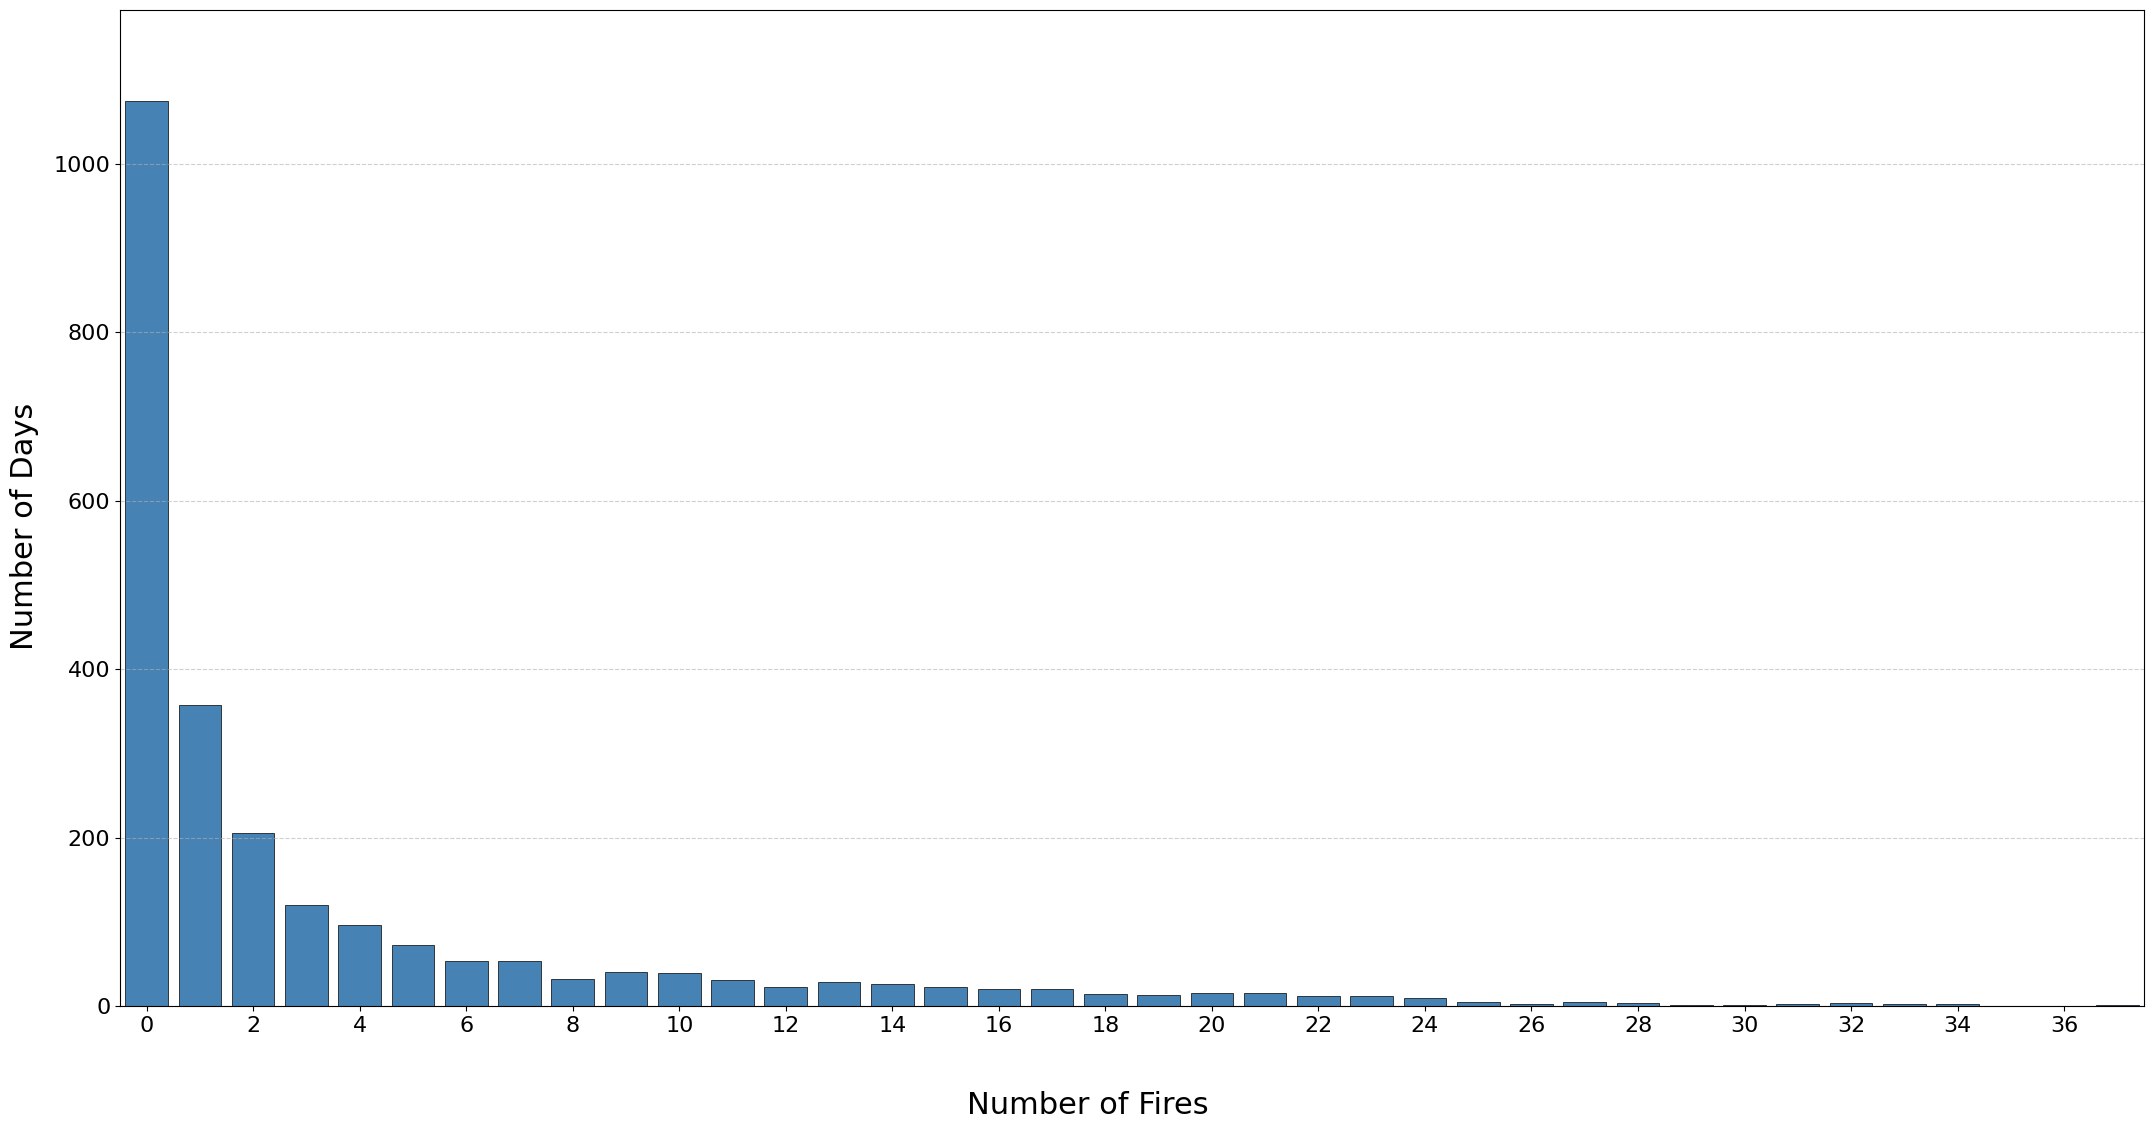

In [52]:
# Regional daily fire count distribution
os.makedirs("EDA_plots", exist_ok=True)
region_for_dist = region_daily_df  

counts = region_for_dist["Num_Fires"].value_counts().sort_index()
max_class = int(region_for_dist["Num_Fires"].max())
max_count = int(counts.max())

fig, ax = plt.subplots(figsize=(22, 12))
ax.bar(counts.index, counts.values, color="steelblue", edgecolor="black", linewidth=0.5)

ax.set_xlim(-0.5, max_class + 0.5)
ax.set_ylim(0, max_count * 1.1)
ax.set_xticks(range(0, max_class + 1, 2))
ax.grid(axis="y", linestyle="--", alpha=0.6)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

fig.text(0.5, 0.01, "Number of Fires", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Number of Days", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.06, bottom=0.10, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "daily_fire_count_distribution_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")


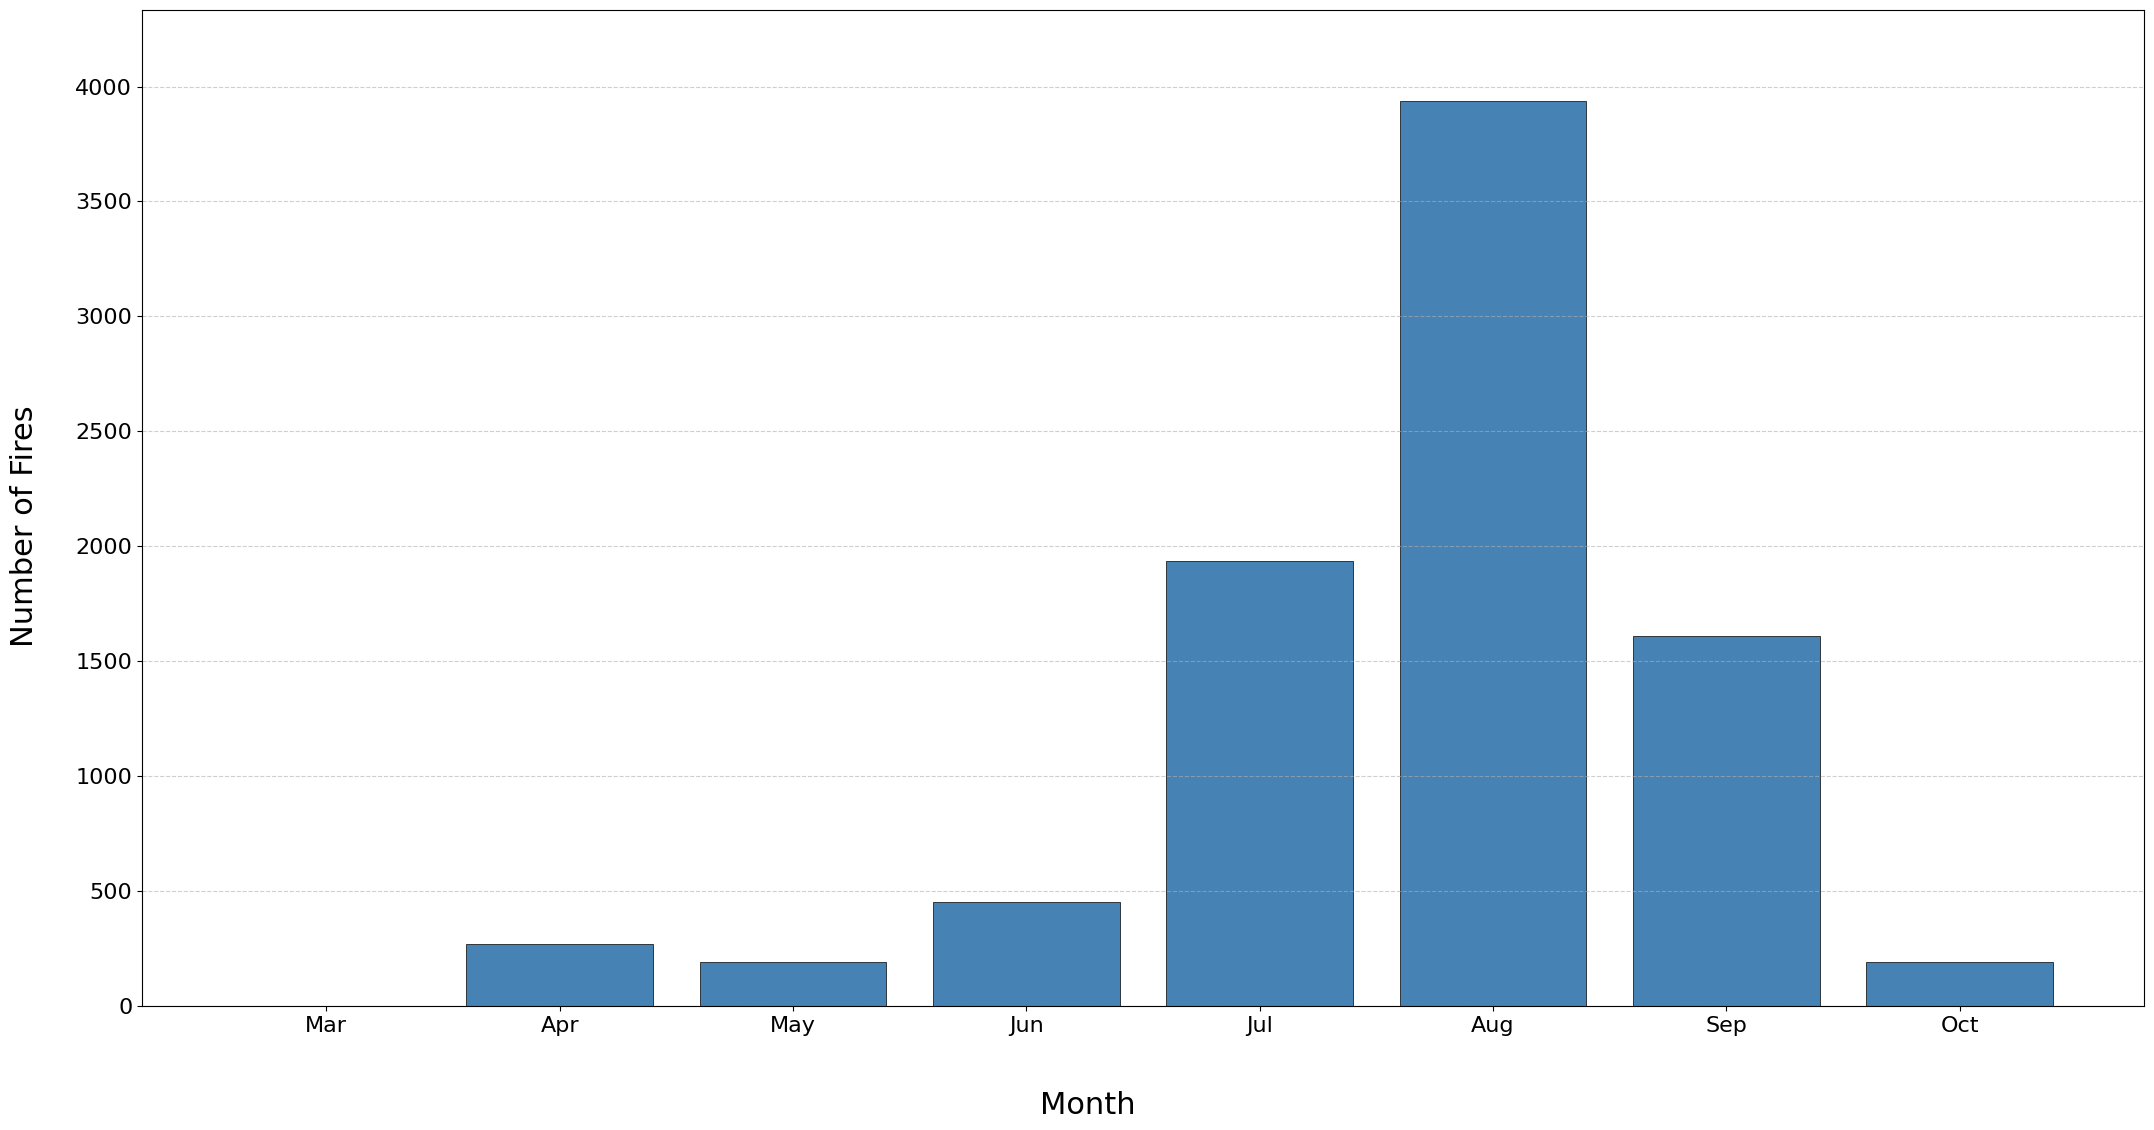

In [83]:
# Plot monthly regional fire count totals
os.makedirs("EDA_plots", exist_ok=True)

months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

tmp = region_daily_df.copy()
tmp["Month"] = tmp["Date"].dt.month

monthly_regional = (
    tmp[tmp["Month"].isin(months)]
    .groupby("Month")["Num_Fires"].sum()
    .reindex(months, fill_value=0)
)

max_y = monthly_regional.max()

fig, ax = plt.subplots(figsize=(22, 12))
ax.bar(range(len(months)), monthly_regional.values, color="steelblue", edgecolor="black", linewidth=0.5)

ax.set_ylim(0, max_y * 1.1)
ax.set_xticks(range(len(months)))
ax.set_xticklabels(labels, fontsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.01, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Number of Fires", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.07, bottom=0.10, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "monthly_fire_totals_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")



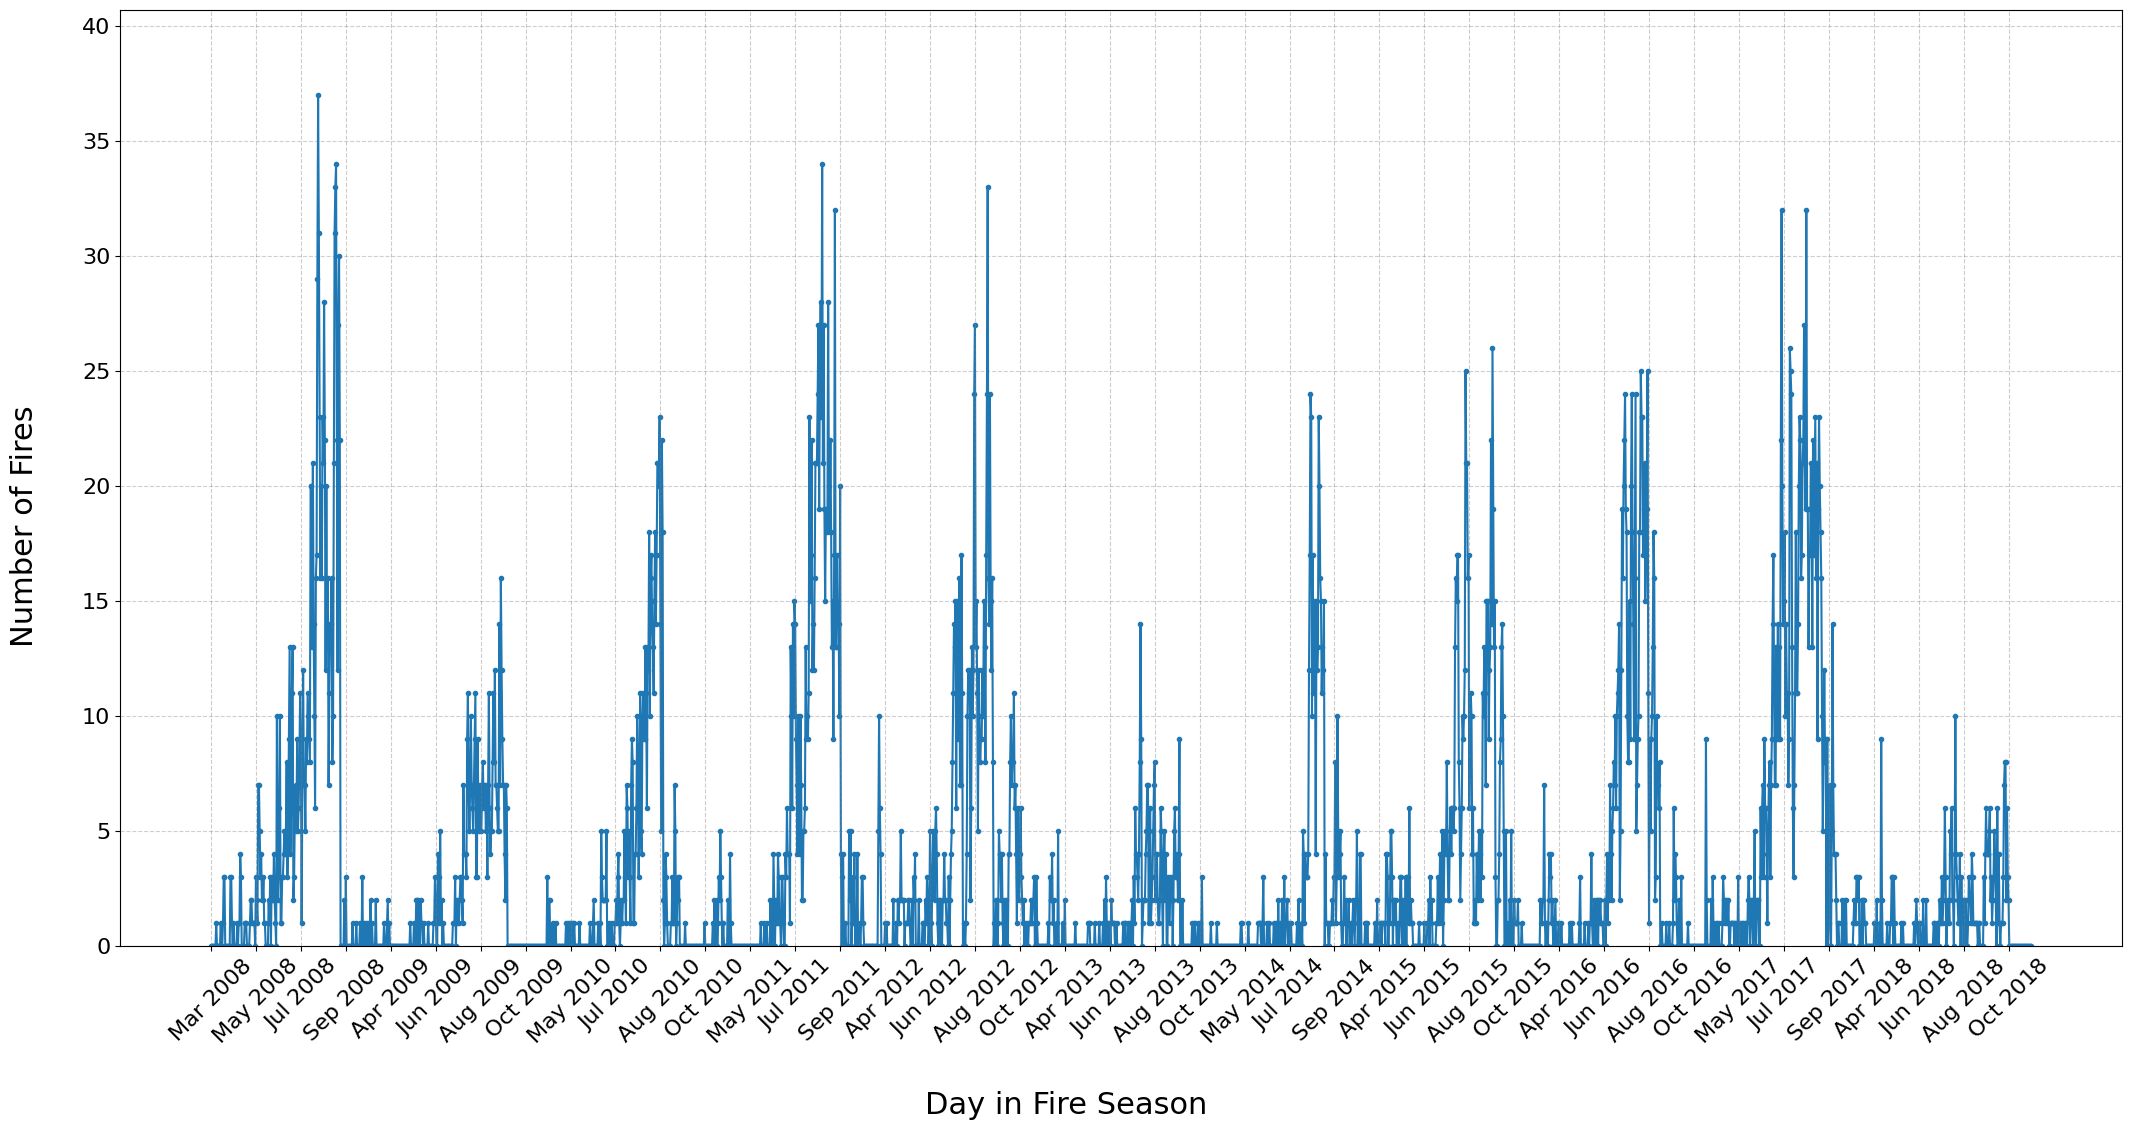

In [84]:
os.makedirs("EDA_plots", exist_ok=True)

region_daily_df["Month"] = region_daily_df["Date"].dt.month
region_fire_season_df = region_daily_df[region_daily_df["Month"].between(3, 10)].copy()
region_fire_season_df = region_fire_season_df.sort_values("Date").reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(range(len(region_fire_season_df)), region_fire_season_df["Num_Fires"],
        color="#1f77b4", linewidth=1.5, marker="o", markersize=3)

ax.set_ylim(0, region_fire_season_df["Num_Fires"].max() * 1.1)

ax.tick_params(axis="y", labelsize=16)
tick_interval = 60
xticks = np.arange(0, len(region_fire_season_df), tick_interval)
xtick_labels = region_fire_season_df["Date"].dt.strftime('%b %Y').iloc[xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=45, fontsize=16)

ax.grid(axis="y", linestyle="--", alpha=0.6)
for xt in xticks:
    ax.axvline(x=xt, color="gray", linestyle="--", alpha=0.4, linewidth=0.8)

fig.text(0.5, 0.01, "Day in Fire Season", ha="center", fontsize=22)
fig.text(0.02, 0.5, "Number of Fires", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.07, bottom=0.15, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "daily_fire_time_series_region_nogaps.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")


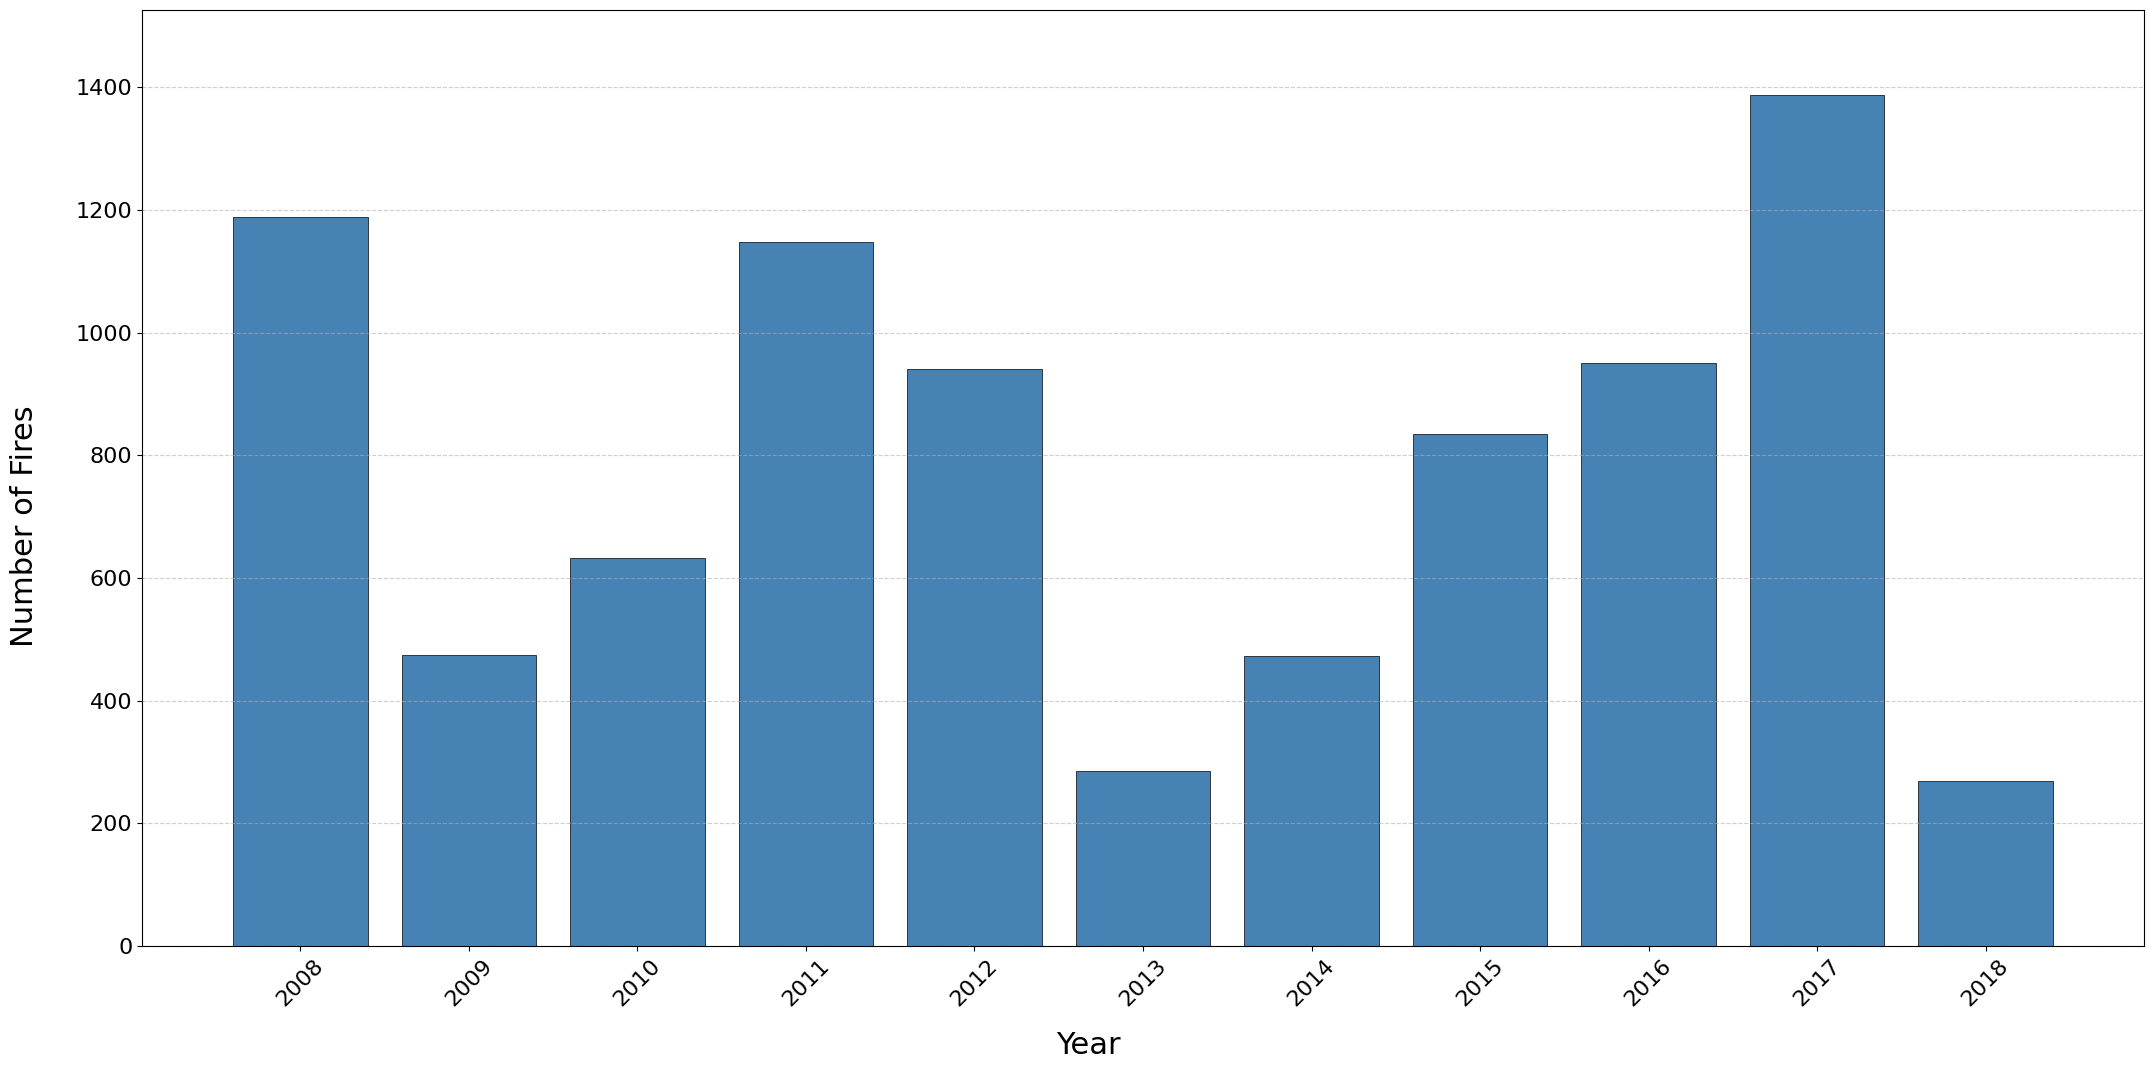

In [86]:
# Plot yearly regional fire count totals
os.makedirs("EDA_plots", exist_ok=True)

df = region_daily_df.copy()
df["Year"] = df["Date"].dt.year
yearly_regional = df.groupby("Year")["Num_Fires"].sum().reindex(range(2008, 2019), fill_value=0)

years = list(yearly_regional.index)
max_y = yearly_regional.max()

fig, ax = plt.subplots(figsize=(22, 12))
ax.bar(years, yearly_regional.values, edgecolor="black", linewidth=0.5, color="steelblue")

ax.set_ylim(0, max_y * 1.1)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Year", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Number of Fires", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.07, bottom=0.15, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "yearly_fire_totals_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")



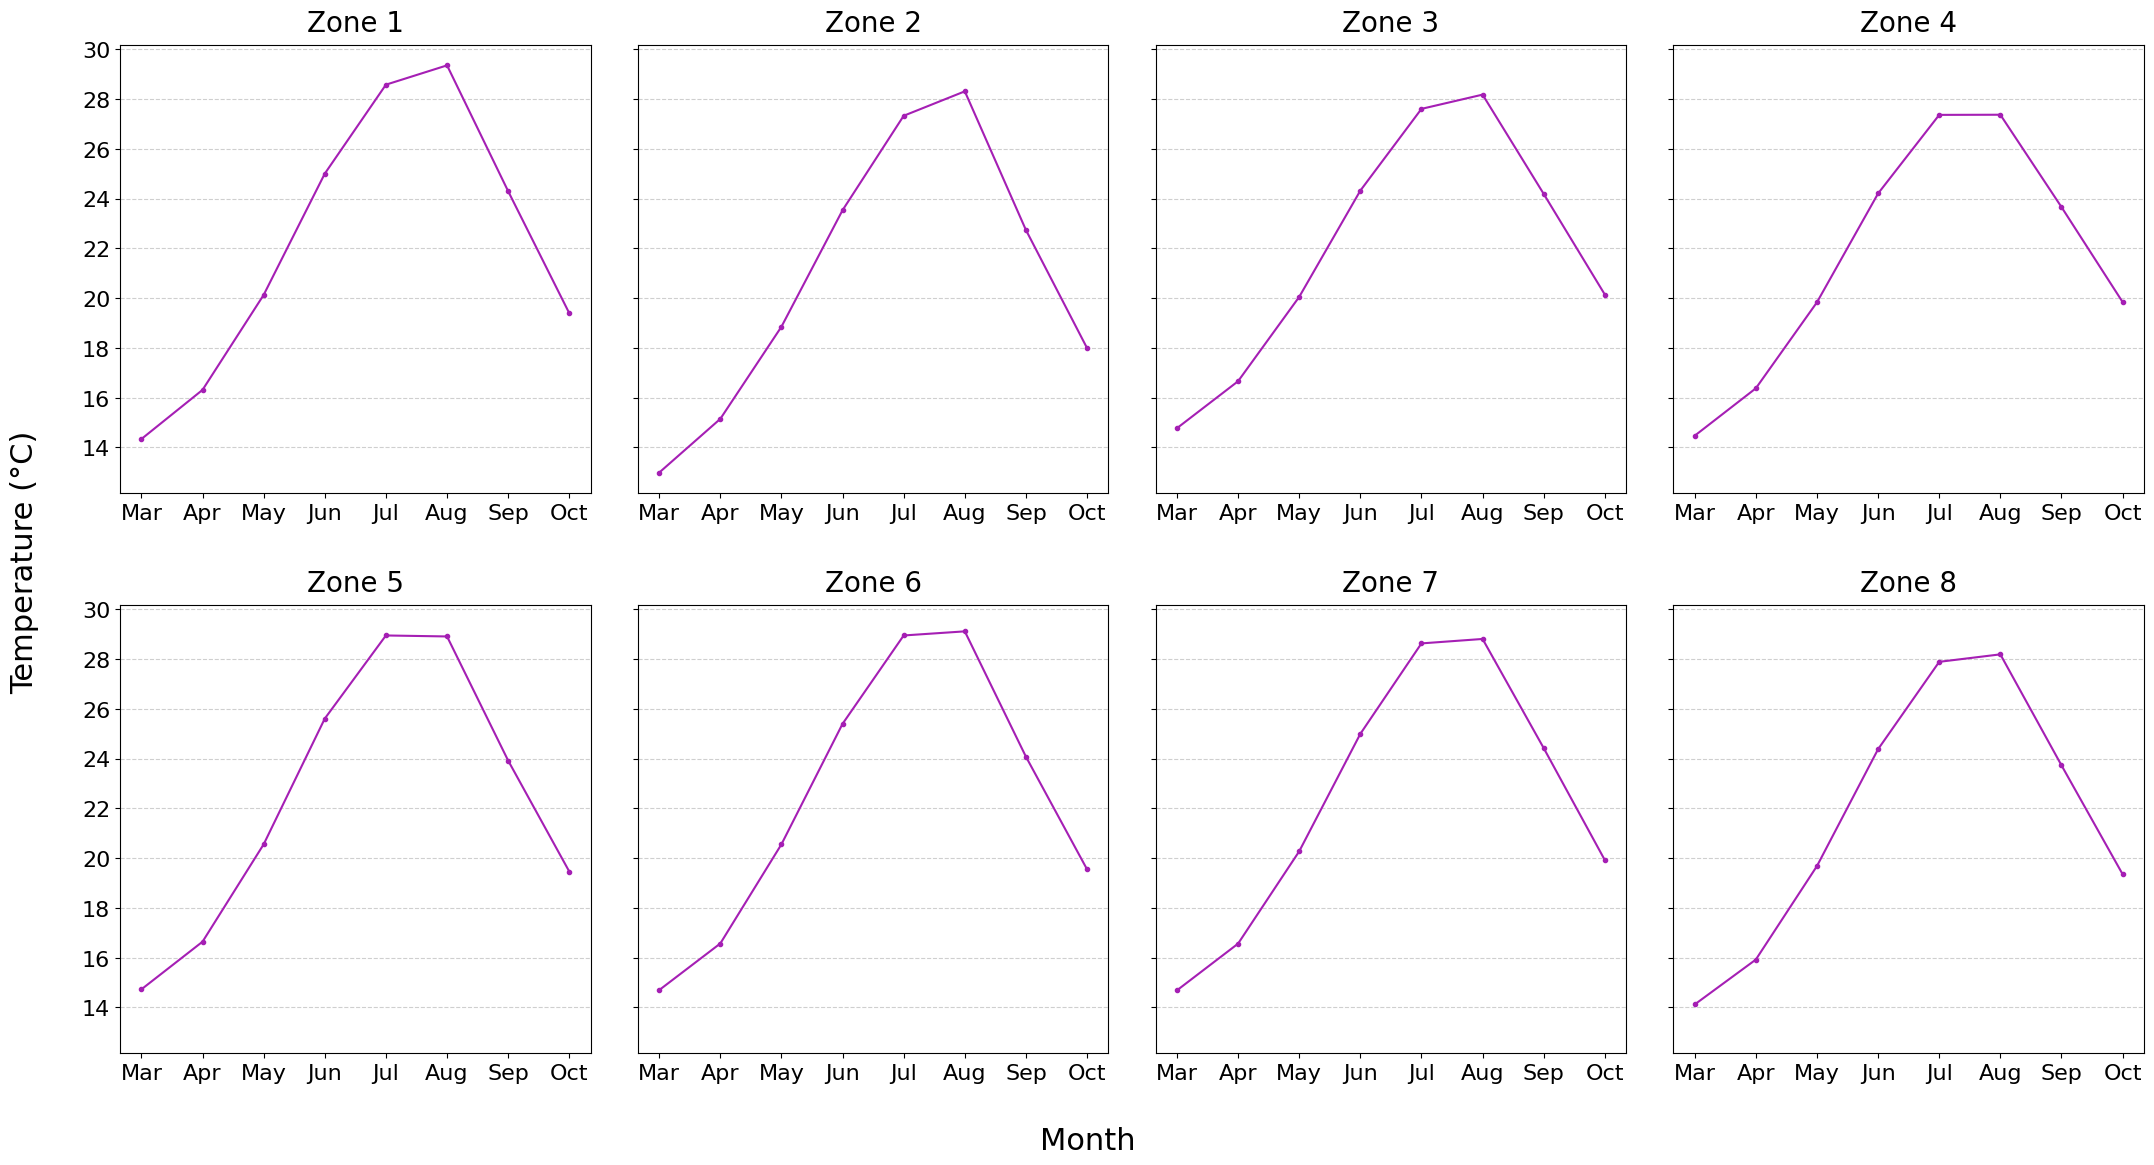

In [97]:
# Plot monthly average temperature per zone (Mar–Oct) in a multi-panel figure
months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

os.makedirs("EDA_plots", exist_ok=True)

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_zone = (df.groupby(["Zone_ID","Month"])["Temperature"]
                  .mean().unstack(fill_value=0).reindex(columns=months, fill_value=0))
zones = sorted(monthly_zone.index)
max_y = monthly_zone.values.max()
min_y = monthly_zone.values.min()

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = monthly_zone.loc[z].values
    axes[i].plot(range(len(months)), vals, color="#a51fb4", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
    axes[i].set_xticks(range(len(months)))
    axes[i].set_xticklabels(labels, fontsize=16)
    axes[i].tick_params(axis="y", labelsize=16)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Temperature (°C)", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.06, bottom=0.09, right=0.98, top=0.93, wspace=0.10, hspace=0.25)

out_path = os.path.join("EDA_plots", "monthly_avg_temperature_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")


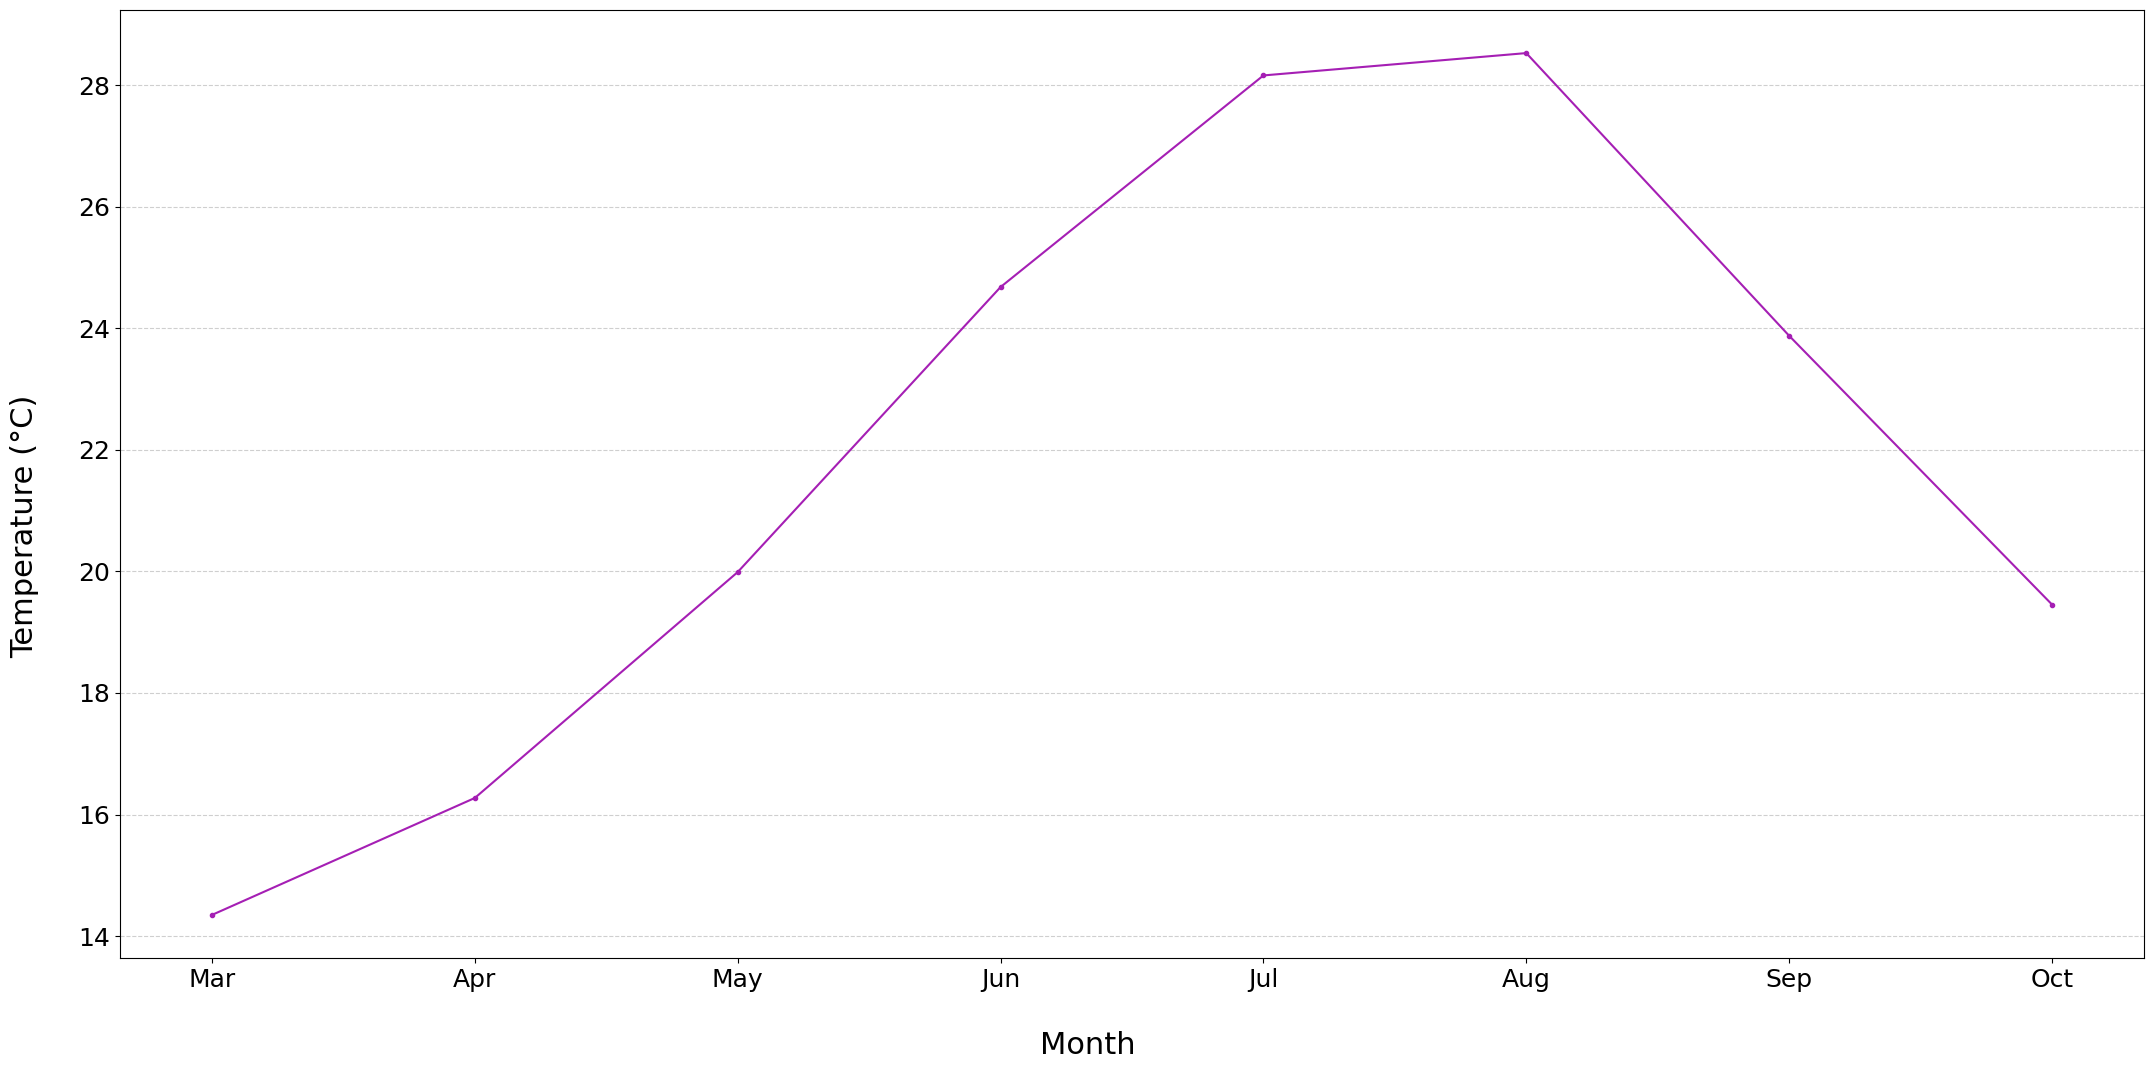

Saved: EDA_plots/monthly_avg_temperature_region.png


In [61]:
# Plot monthly average regional temperature (Mar–Oct)
os.makedirs("EDA_plots", exist_ok=True)

months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_region_temp = (
    df.groupby("Month")["Temperature"].mean().reindex(months, fill_value=0)
)

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(range(len(months)), monthly_region_temp.values, color="#a51fb4", linewidth=1.5, marker="o", markersize=3)

ax.set_xticks(range(len(months)))
ax.set_xticklabels(labels, fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Temperature (°C)", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.06, bottom=0.14, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "monthly_avg_temperature_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")



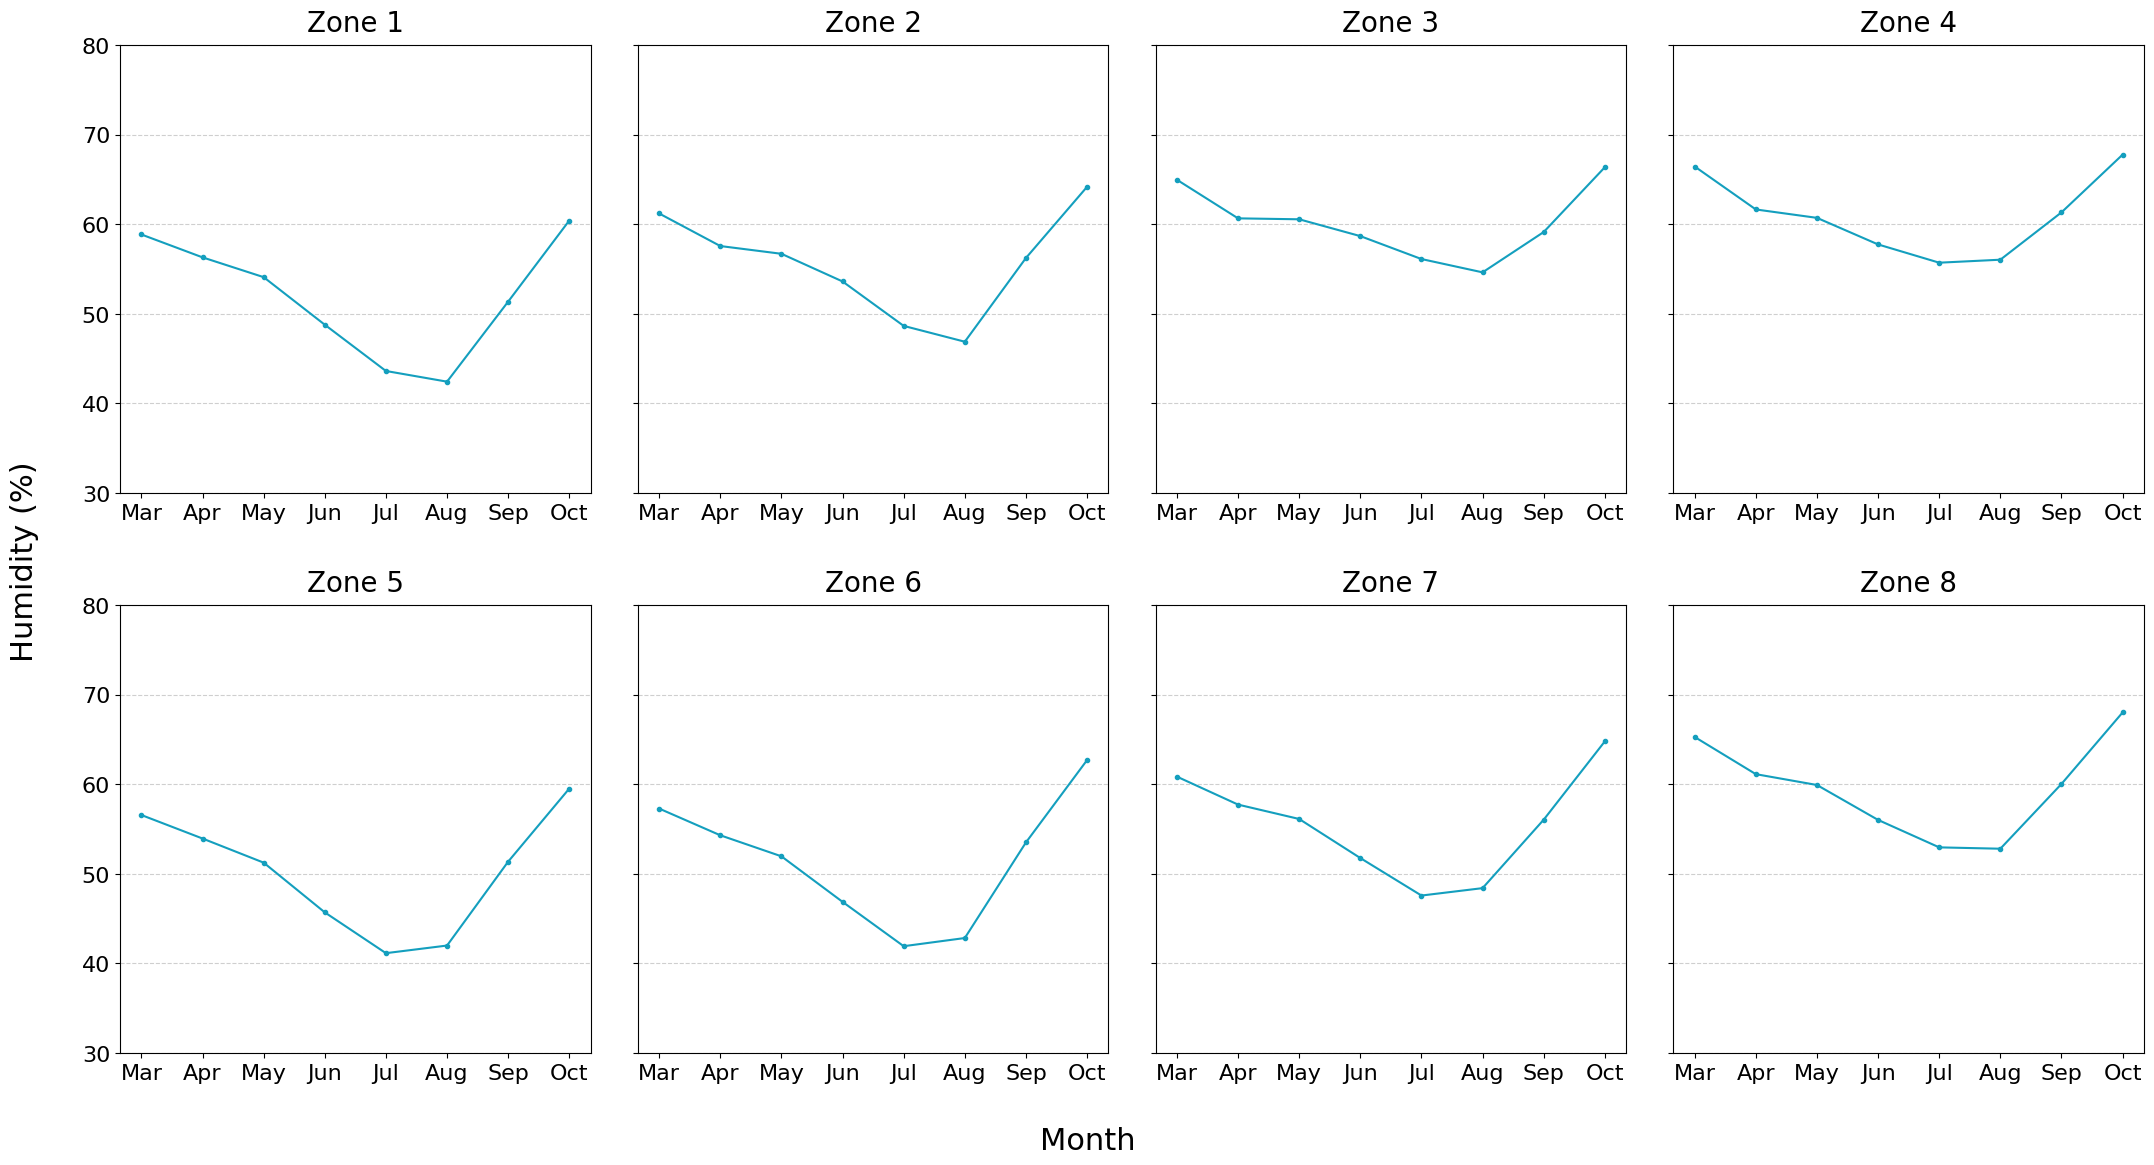

Saved: EDA_plots/monthly_avg_humidity_zones.png


In [95]:
# Plot monthly average humidity per zone
months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

os.makedirs("EDA_plots", exist_ok=True)

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_zone_hum = (df.groupby(["Zone_ID","Month"])["Humidity"]
                      .mean().unstack(fill_value=0).reindex(columns=months, fill_value=0))
zones = sorted(monthly_zone_hum.index)

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = monthly_zone_hum.loc[z].values
    axes[i].plot(range(len(months)), vals, color="#149fbe", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(30, 80)
    axes[i].set_xticks(range(len(months)))
    axes[i].set_xticklabels(labels, fontsize=16)
    axes[i].tick_params(axis="y", labelsize=16)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Humidity (%)", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.06, bottom=0.09, right=0.98, top=0.93, wspace=0.10, hspace=0.25)

out_path = os.path.join("EDA_plots", "monthly_avg_humidity_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


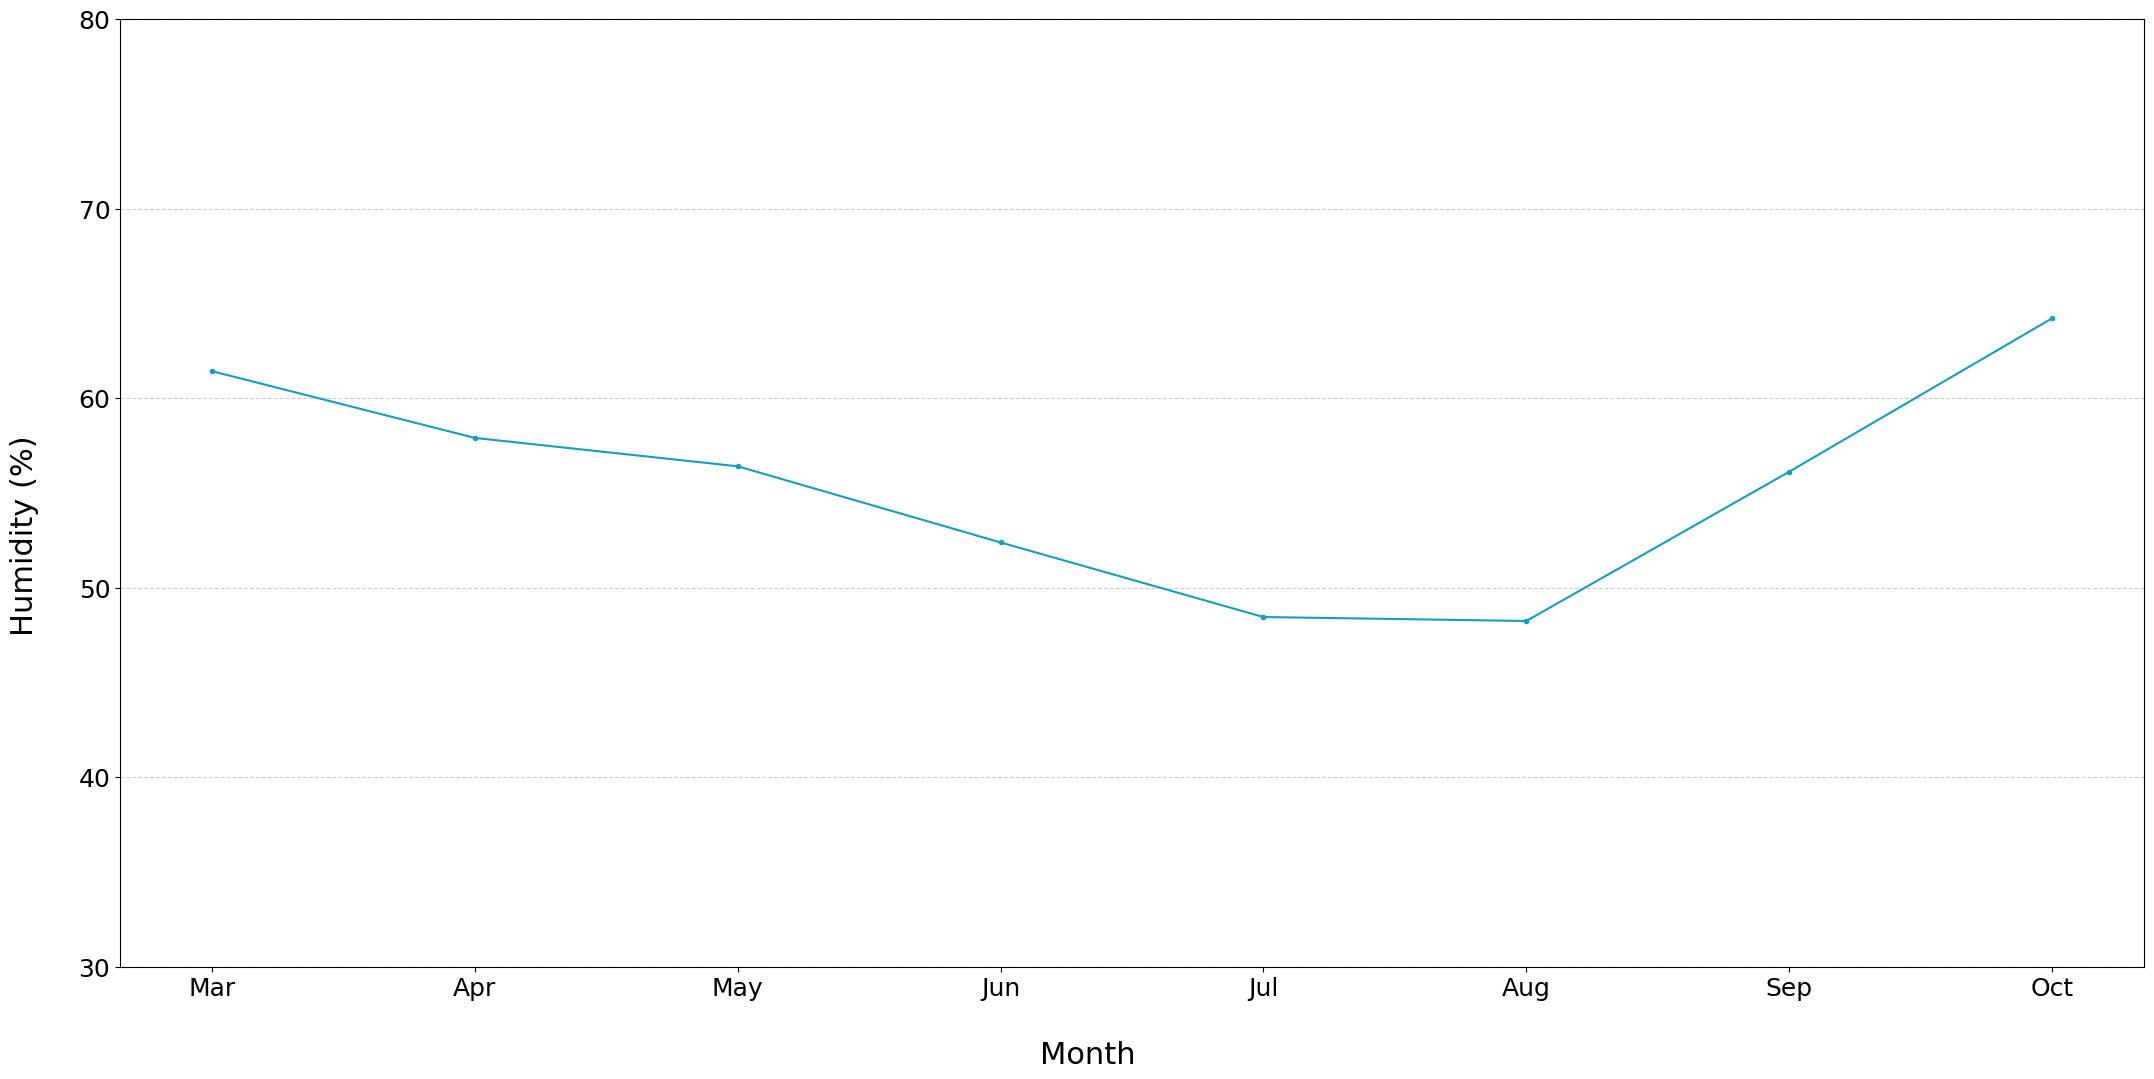

Saved: EDA_plots/monthly_avg_humidity_region.png


In [62]:
# Plot monthly average regional humidity (Mar–Oct)
os.makedirs("EDA_plots", exist_ok=True)

months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_region_hum = (
    df.groupby("Month")["Humidity"].mean().reindex(months, fill_value=0)
)

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(range(len(months)), monthly_region_hum.values, color="#149fbe", linewidth=1.5, marker="o", markersize=3)

ax.set_ylim(30, 80)
ax.set_xticks(range(len(months)))
ax.set_xticklabels(labels, fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Humidity (%)", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.06, bottom=0.14, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "monthly_avg_humidity_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


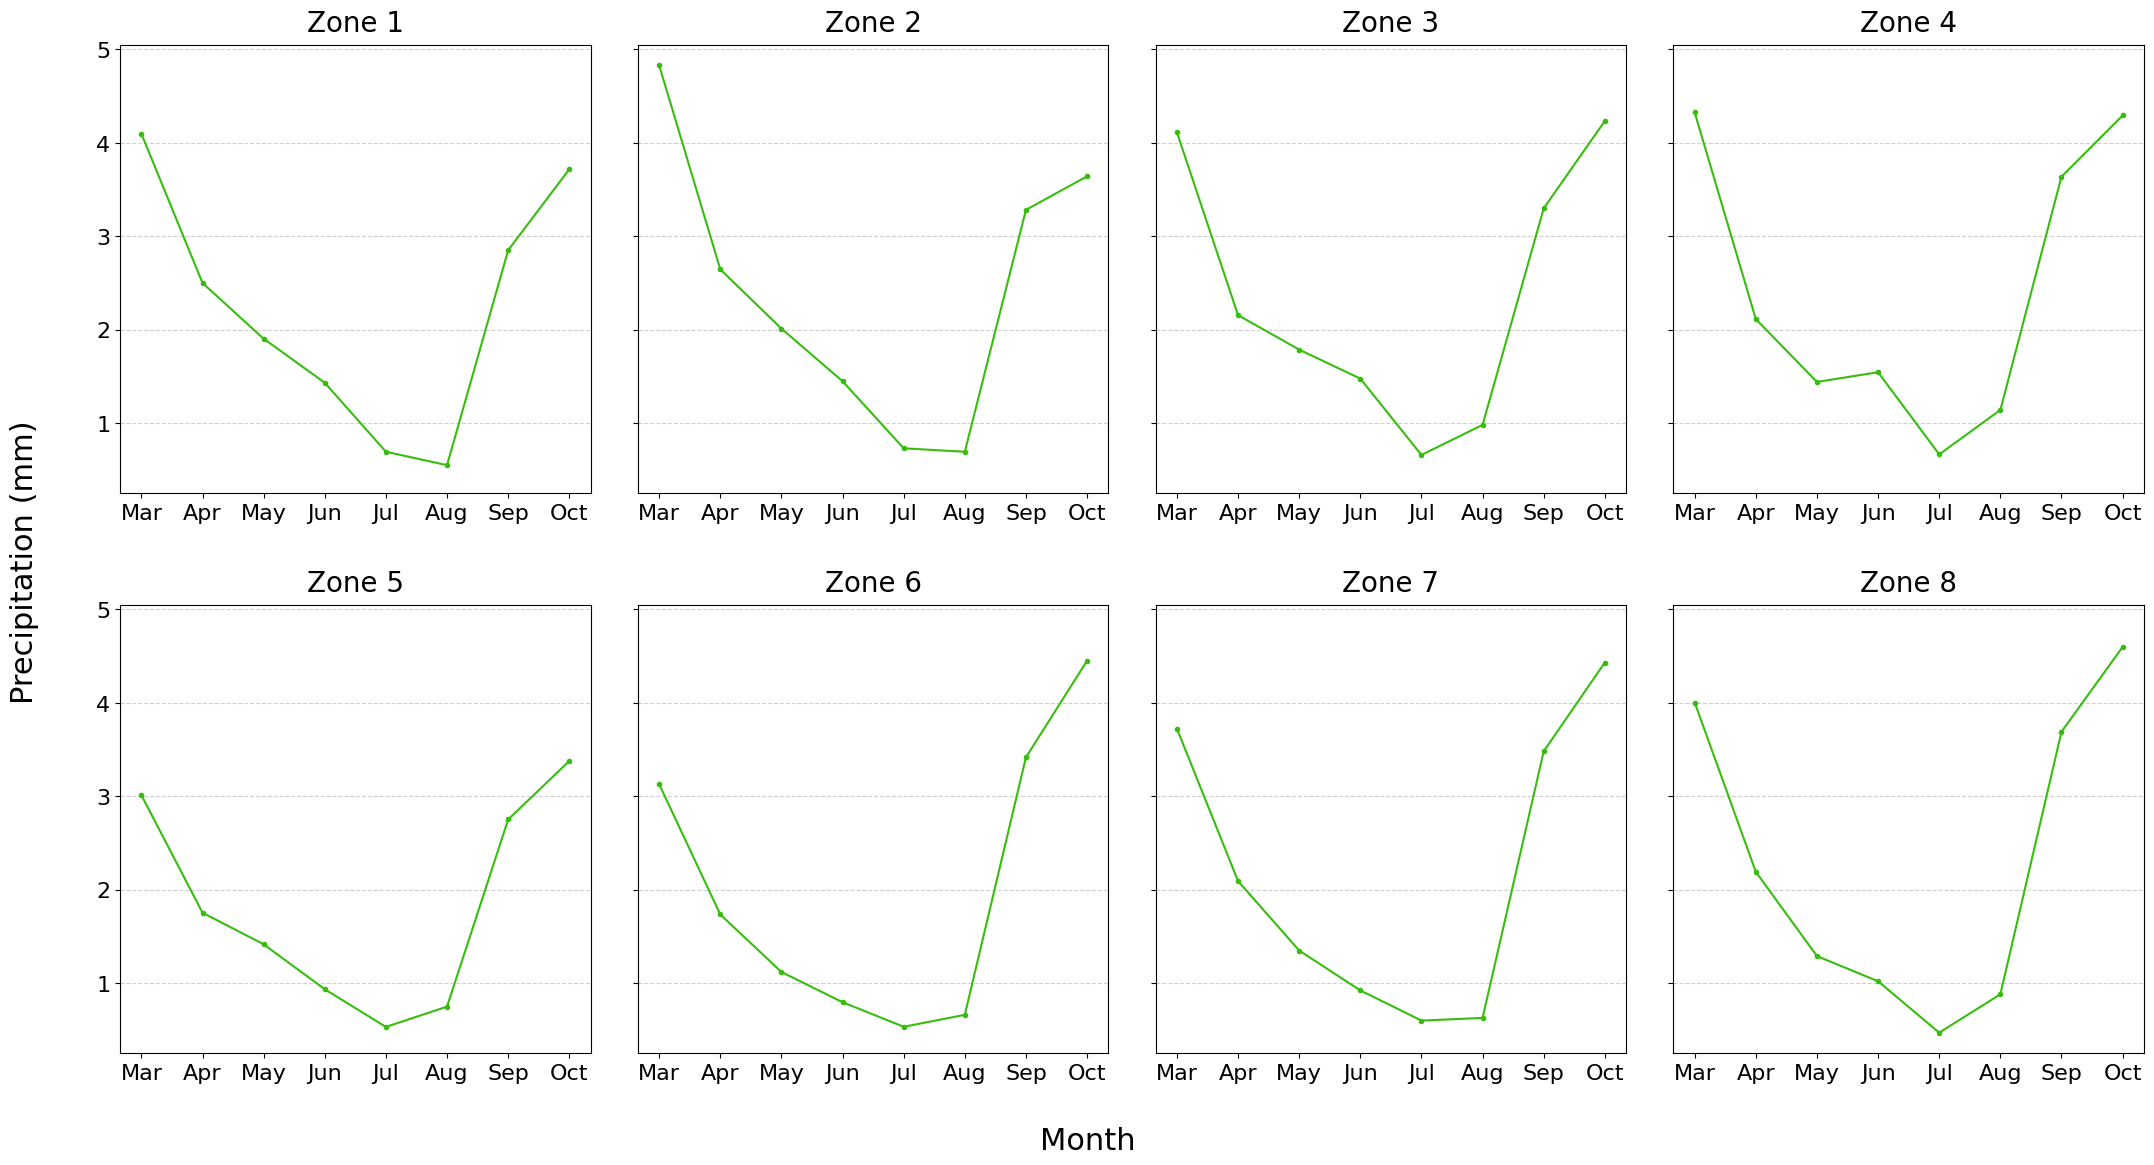

Saved: EDA_plots/monthly_avg_precipitation_zones.png


In [98]:
# Plot monthly average precipitation per zone 
months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

os.makedirs("EDA_plots", exist_ok=True)

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_zone_precip = (df.groupby(["Zone_ID","Month"])["Precipitation"]
                         .mean().unstack(fill_value=0).reindex(columns=months, fill_value=0))
zones = sorted(monthly_zone_precip.index)
max_y = monthly_zone_precip.values.max()
min_y = monthly_zone_precip.values.min()

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = monthly_zone_precip.loc[z].values
    axes[i].plot(range(len(months)), vals, color="#37bd0e", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
    axes[i].set_xticks(range(len(months)))
    axes[i].set_xticklabels(labels, fontsize=16)
    axes[i].tick_params(axis="y", labelsize=16)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Precipitation (mm)", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.06, bottom=0.09, right=0.98, top=0.93, wspace=0.10, hspace=0.25)

out_path = os.path.join("EDA_plots", "monthly_avg_precipitation_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


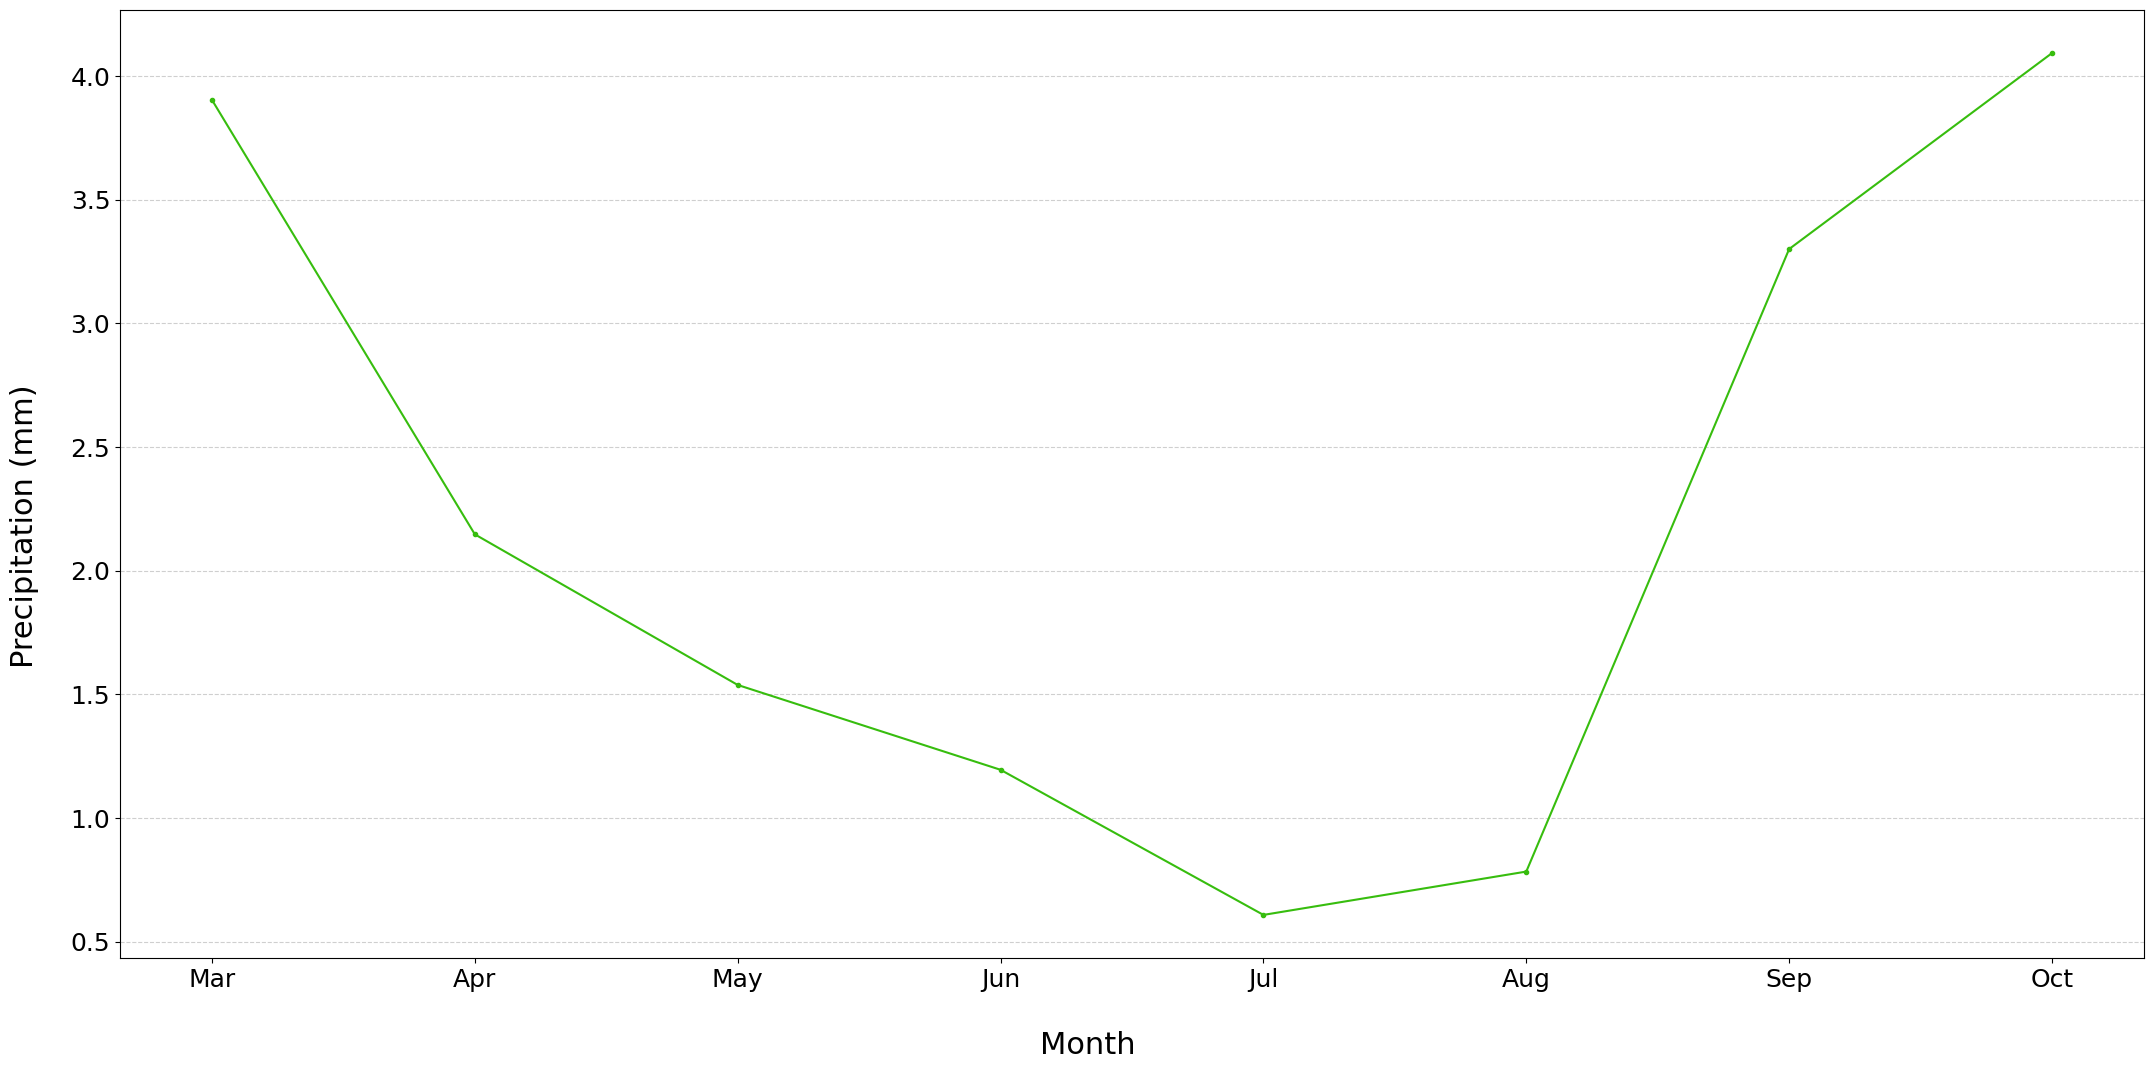

Saved: EDA_plots/monthly_avg_precipitation_region.png


In [63]:
# Plot monthly average regional precipitation (Mar–Oct)
os.makedirs("EDA_plots", exist_ok=True)

months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_region_precip = (
    df.groupby("Month")["Precipitation"].mean().reindex(months, fill_value=0)
)

max_y = monthly_region_precip.max()
min_y = monthly_region_precip.min()

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(range(len(months)), monthly_region_precip.values, color="#37bd0e", linewidth=1.5, marker="o", markersize=3)

ax.set_ylim(min_y - 0.05*(max_y - min_y), max_y + 0.05*(max_y - min_y))
ax.set_xticks(range(len(months)))
ax.set_xticklabels(labels, fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Precipitation (mm)", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.06, bottom=0.14, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "monthly_avg_precipitation_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")



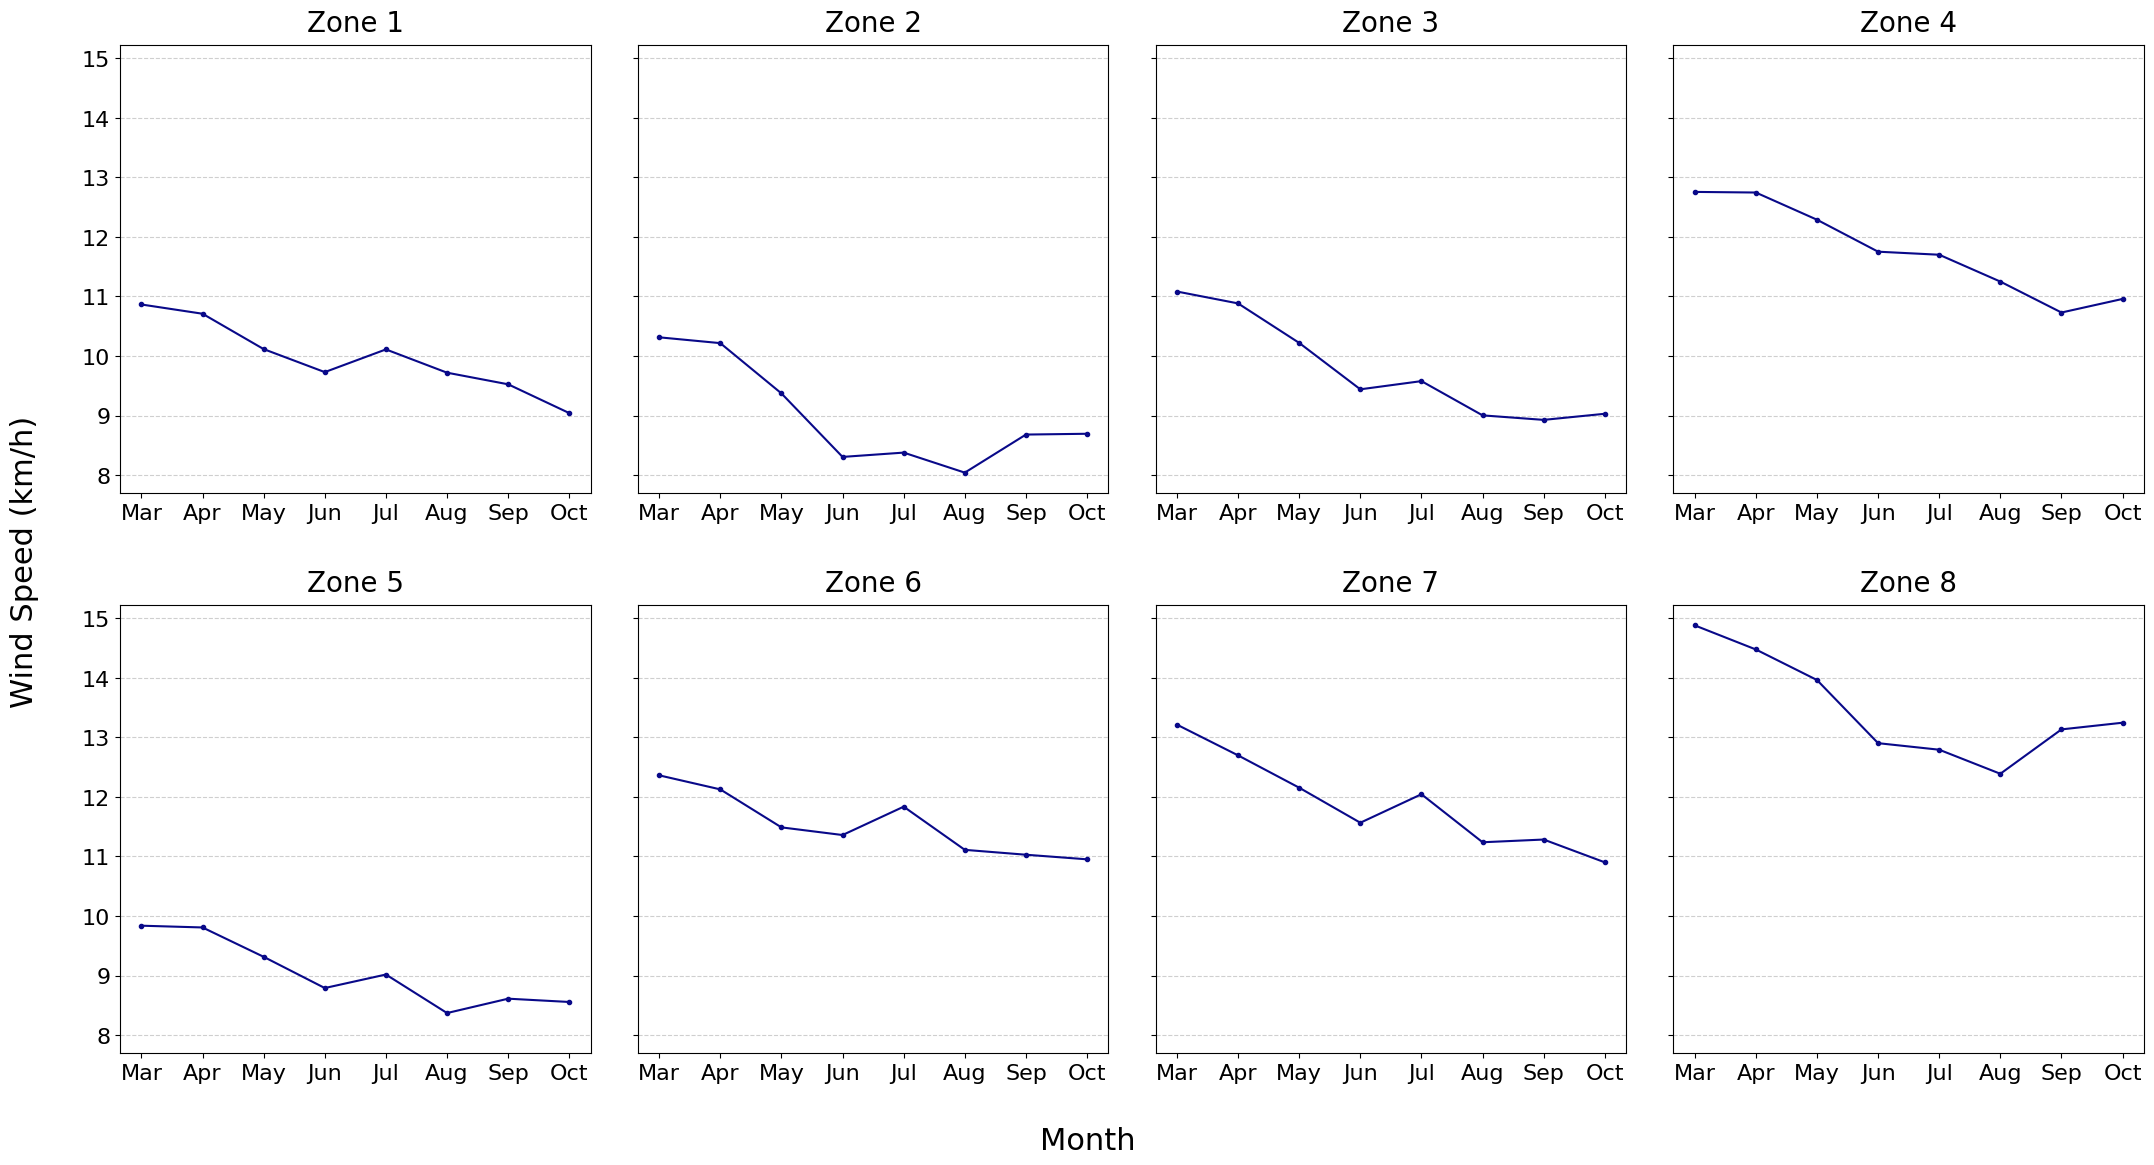

Saved: EDA_plots/monthly_avg_wind_zones.png


In [99]:
# Plot monthly average wind speed per zone 
months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

os.makedirs("EDA_plots", exist_ok=True)

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_zone_wind = (df.groupby(["Zone_ID","Month"])["Wind"]
                       .mean().unstack(fill_value=0).reindex(columns=months, fill_value=0))
zones = sorted(monthly_zone_wind.index)
max_y = monthly_zone_wind.values.max()
min_y = monthly_zone_wind.values.min()

fig, axes = plt.subplots(2, 4, figsize=(22, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = monthly_zone_wind.loc[z].values
    axes[i].plot(range(len(months)), vals, color="#090989", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
    axes[i].set_xticks(range(len(months)))
    axes[i].set_xticklabels(labels, fontsize=16)
    axes[i].tick_params(axis="y", labelsize=16)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    if i < 4:
        axes[i].tick_params(labelbottom=True)

fig.text(0.5, 0.01, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Wind Speed (km/h)", va="center", rotation="vertical", fontsize=22)

plt.subplots_adjust(left=0.06, bottom=0.09, right=0.98, top=0.93, wspace=0.10, hspace=0.25)

out_path = os.path.join("EDA_plots", "monthly_avg_wind_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


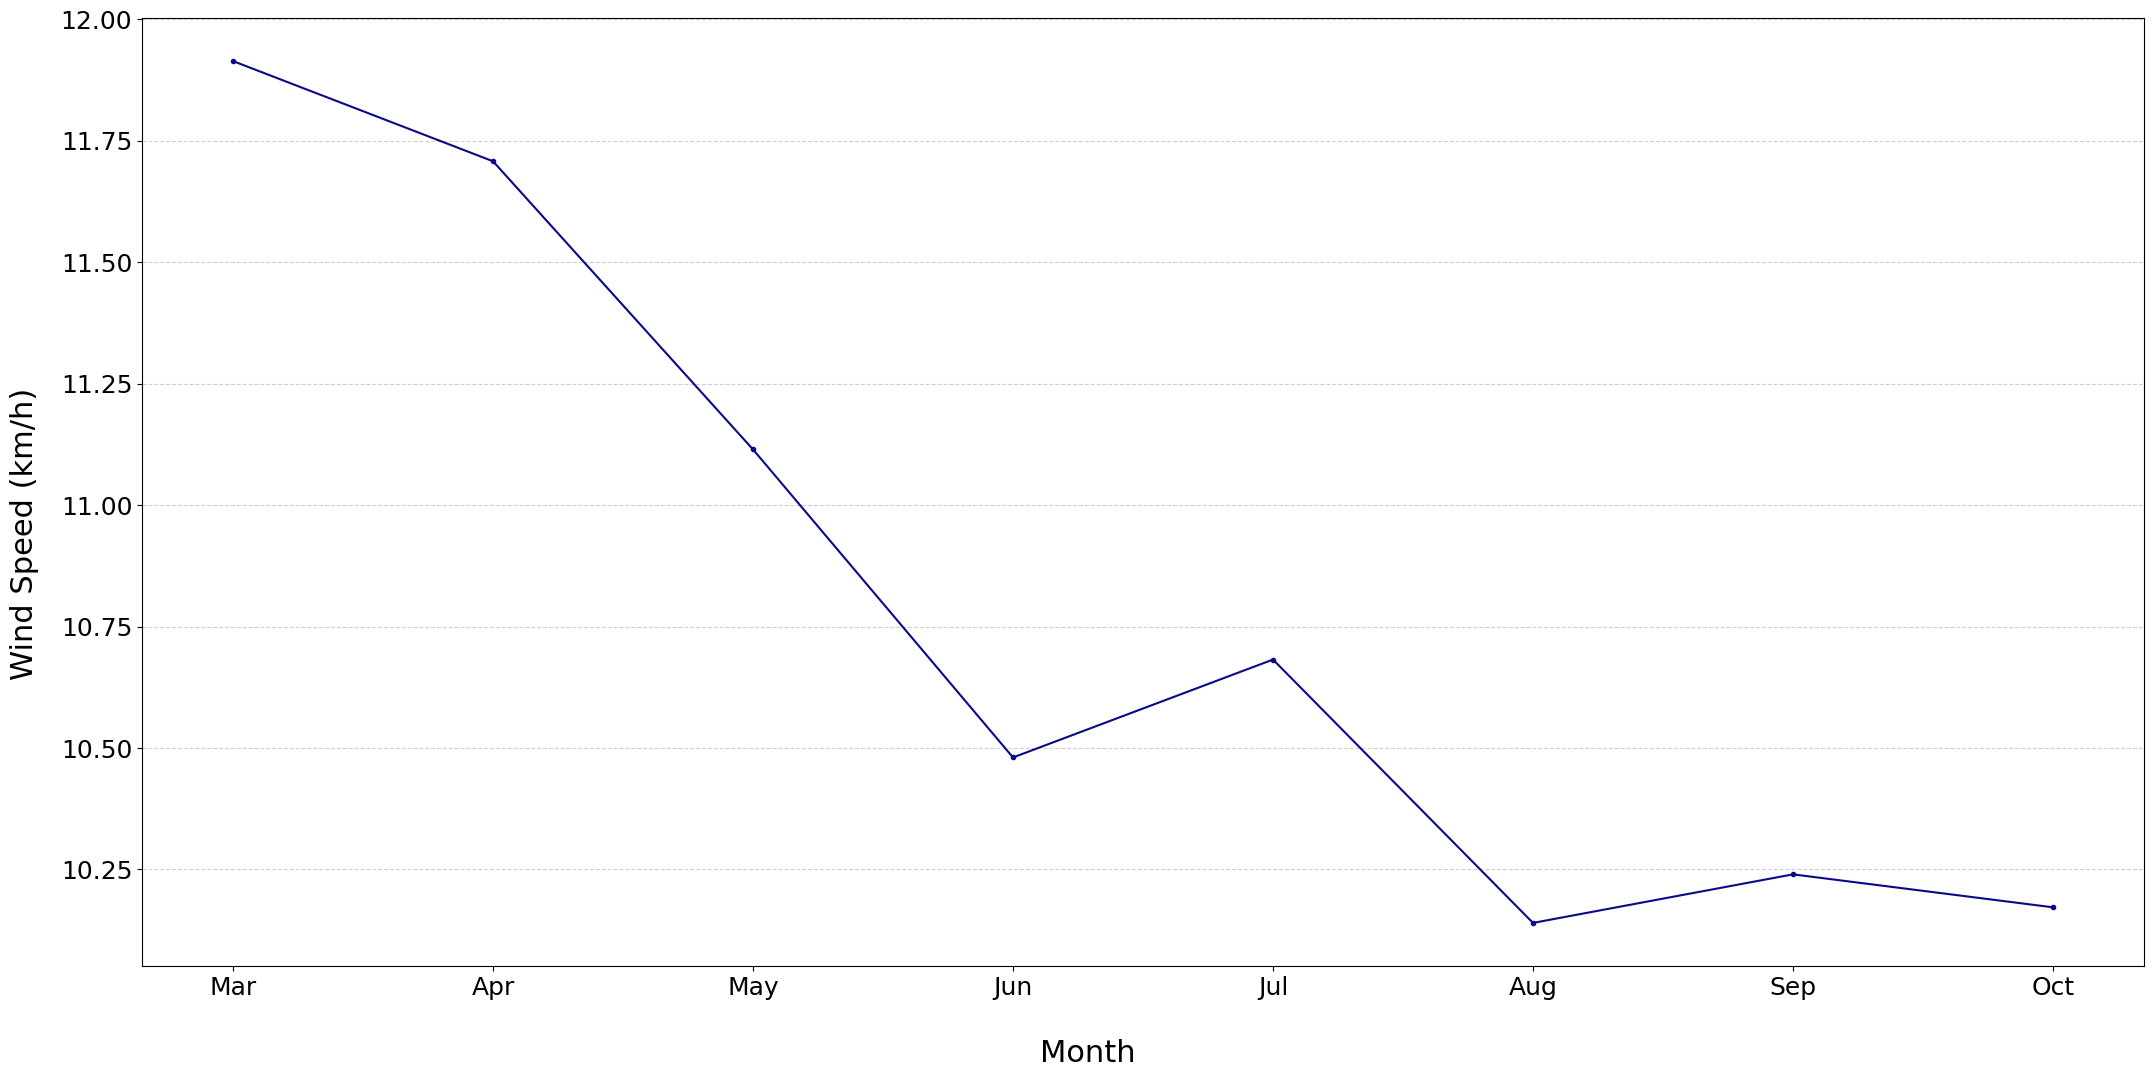

Saved: EDA_plots/monthly_avg_wind_region.png


In [68]:
# Plot monthly average regional wind speed (Mar–Oct)
os.makedirs("EDA_plots", exist_ok=True)

months = [3,4,5,6,7,8,9,10]
labels = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

df = climate_fire_df.copy()
df["Month"] = df["Date"].dt.month
df = df[df["Month"].between(3,10)]

monthly_region_wind = (
    df.groupby("Month")["Wind"].mean().reindex(months, fill_value=0)
)

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(range(len(months)), monthly_region_wind.values, color="#090989", linewidth=1.5, marker="o", markersize=3)

ax.set_xticks(range(len(months)))
ax.set_xticklabels(labels, fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Month", ha="center", fontsize=22)
fig.text(0.01, 0.5, "Wind Speed (km/h)", va="center", rotation="vertical", fontsize=22)
plt.subplots_adjust(left=0.07, bottom=0.14, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "monthly_avg_wind_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


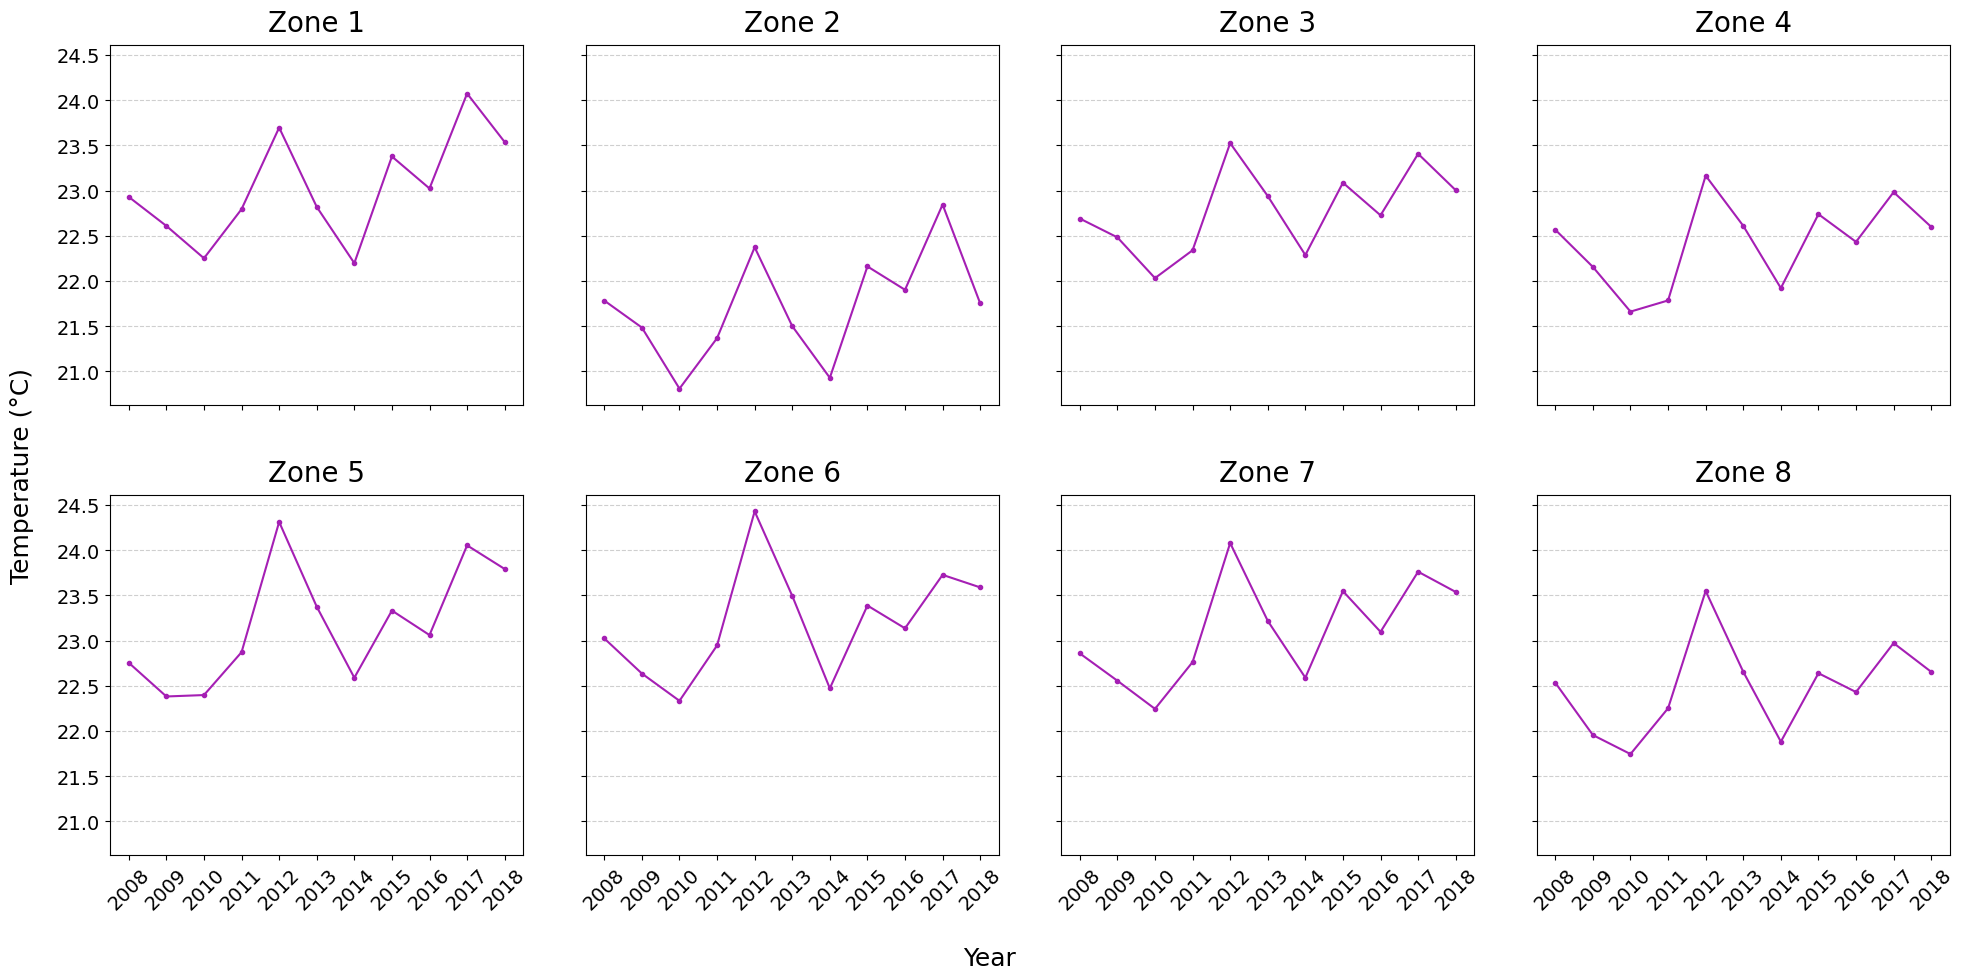

Saved: EDA_plots/yearly_avg_temperature_zones.png


In [130]:
# Yearly average temperature per zone (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_zone_temp = (
    df.groupby(["Zone_ID", "Year"])["Temperature"]
      .mean()
      .unstack(fill_value=0)
      .reindex(columns=range(2008, 2019), fill_value=0)
)

zones = sorted(yearly_zone_temp.index)
years = list(yearly_zone_temp.columns)
max_y = yearly_zone_temp.values.max()
min_y = yearly_zone_temp.values.min()

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = yearly_zone_temp.loc[z].values
    axes[i].plot(years, vals, color="#a51fb4", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
    axes[i].set_xticks(years)
    axes[i].set_xticklabels(years, rotation=45, fontsize=14)
    axes[i].tick_params(axis="y", labelsize=14)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.01, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Temperature (°C)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.12, right=0.98, top=0.93, wspace=0.15, hspace=0.25)

out_path = os.path.join("EDA_plots", "yearly_avg_temperature_zones.png")
os.makedirs("EDA_plots", exist_ok=True)
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


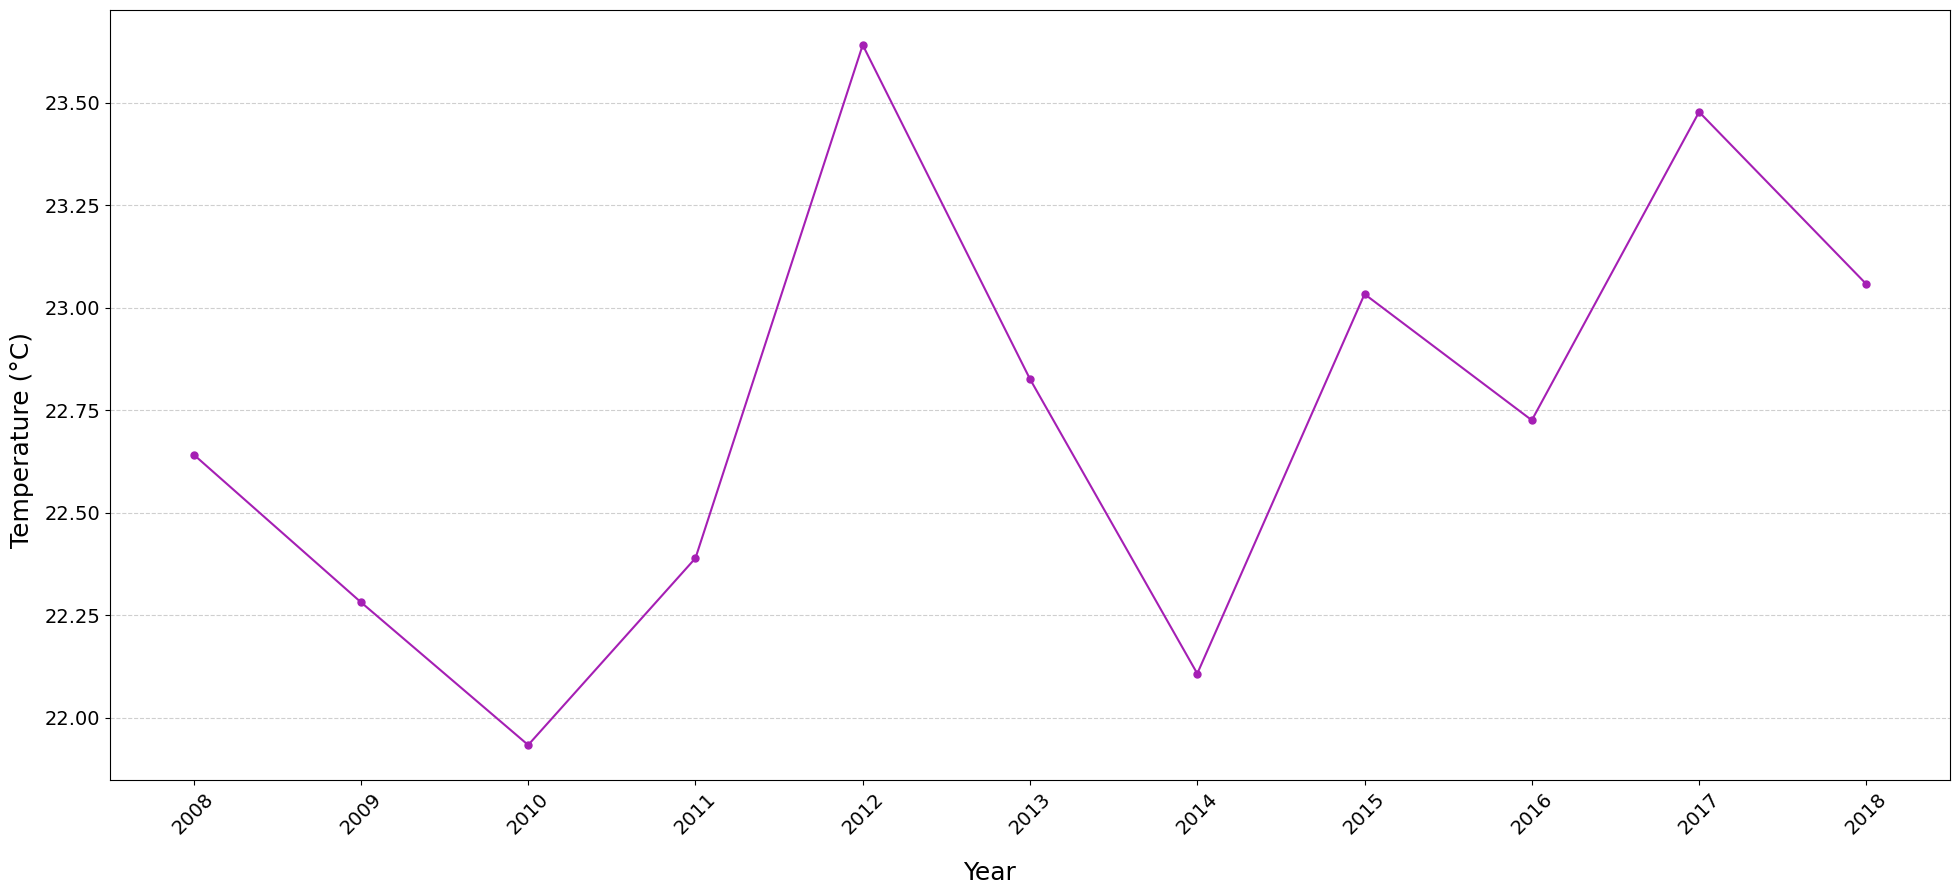

Saved: EDA_plots/yearly_avg_temperature_region.png


In [131]:
# Yearly average regional temperature (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_region_temp = (
    df.groupby("Year")["Temperature"]
      .mean()
      .reindex(range(2008, 2019), fill_value=0)
)

years = list(yearly_region_temp.index)
max_y = yearly_region_temp.max()
min_y = yearly_region_temp.min()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(years, yearly_region_temp.values, color="#a51fb4", linewidth=1.5, marker="o", markersize=5)

ax.set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Temperature (°C)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.16, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "yearly_avg_temperature_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


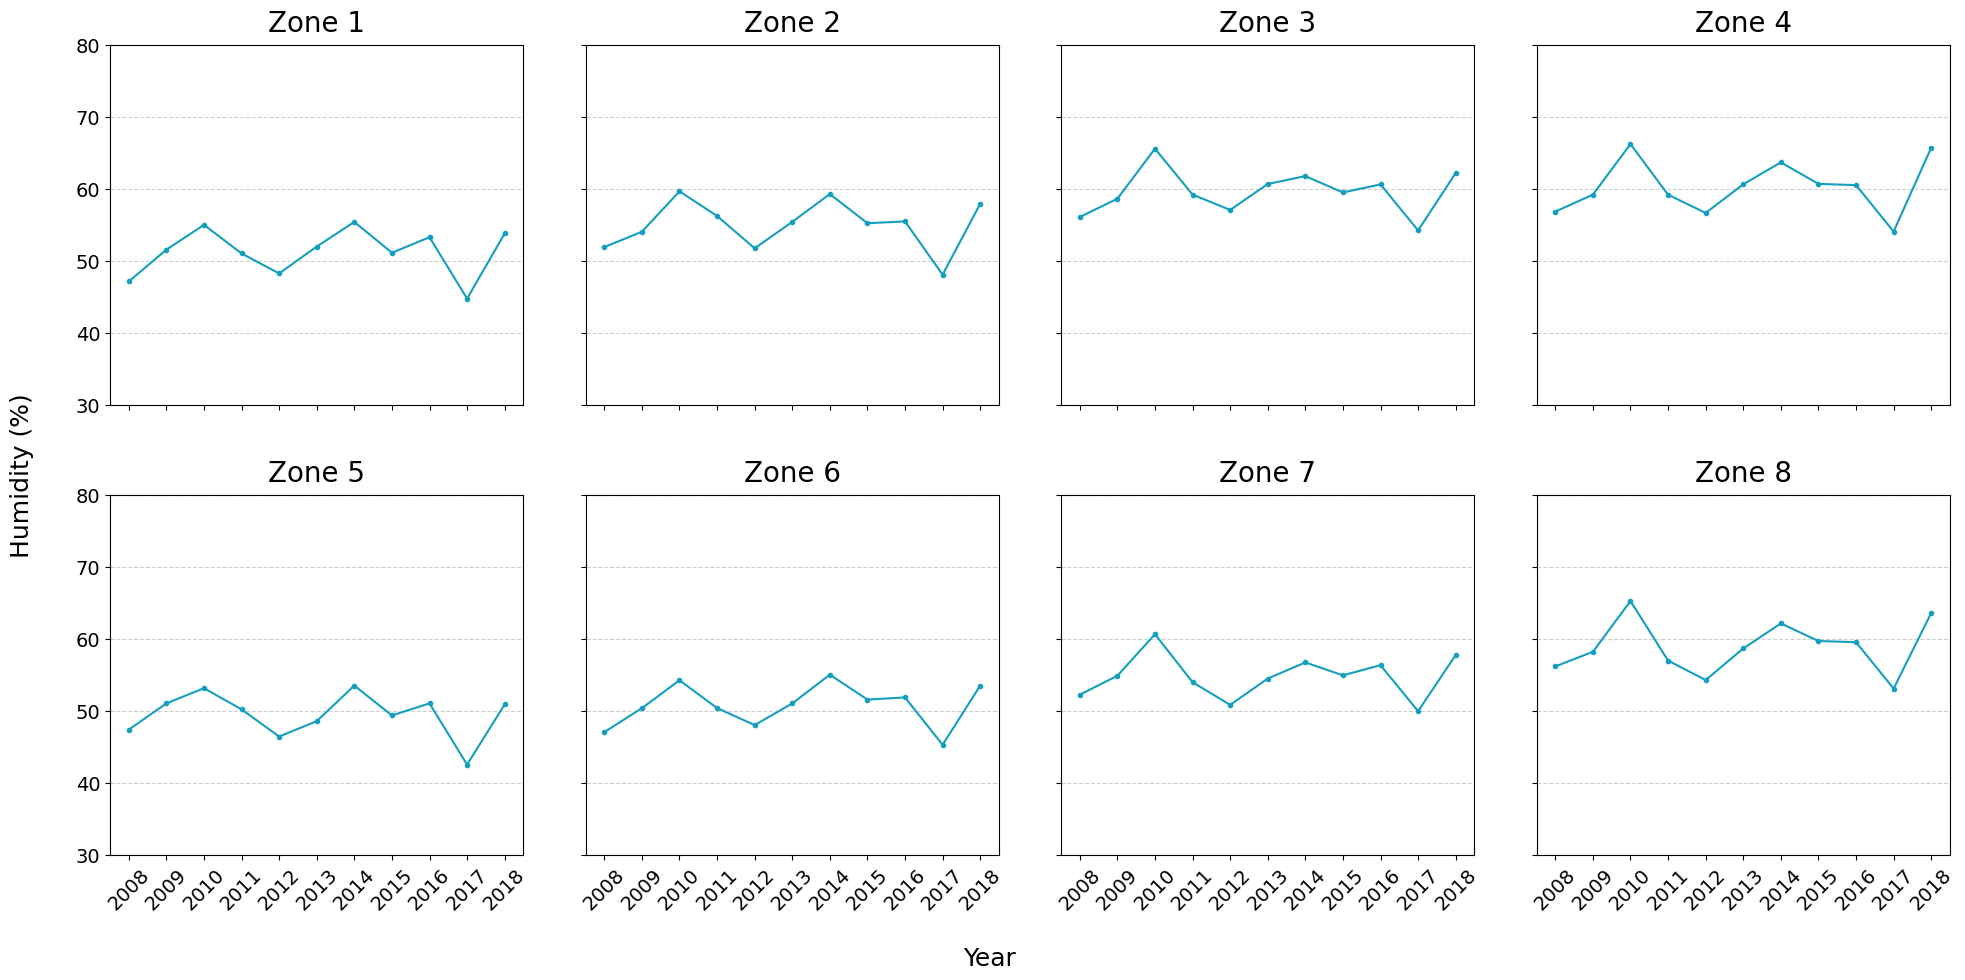

Saved: EDA_plots/yearly_avg_humidity_zones.png


In [132]:
# Yearly average humidity per zone (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_zone_hum = (
    df.groupby(["Zone_ID", "Year"])["Humidity"]
      .mean()
      .unstack(fill_value=0)
      .reindex(columns=range(2008, 2019), fill_value=0)
)

zones = sorted(yearly_zone_hum.index)
years = list(yearly_zone_hum.columns)

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = yearly_zone_hum.loc[z].values
    axes[i].plot(years, vals, color="#149fbe", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(30, 80)
    axes[i].set_xticks(years)
    axes[i].set_xticklabels(years, rotation=45, fontsize=14)
    axes[i].tick_params(axis="y", labelsize=14)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.01, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Humidity (%)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.12, right=0.98, top=0.93, wspace=0.15, hspace=0.25)

os.makedirs("EDA_plots", exist_ok=True)
out_path = os.path.join("EDA_plots", "yearly_avg_humidity_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


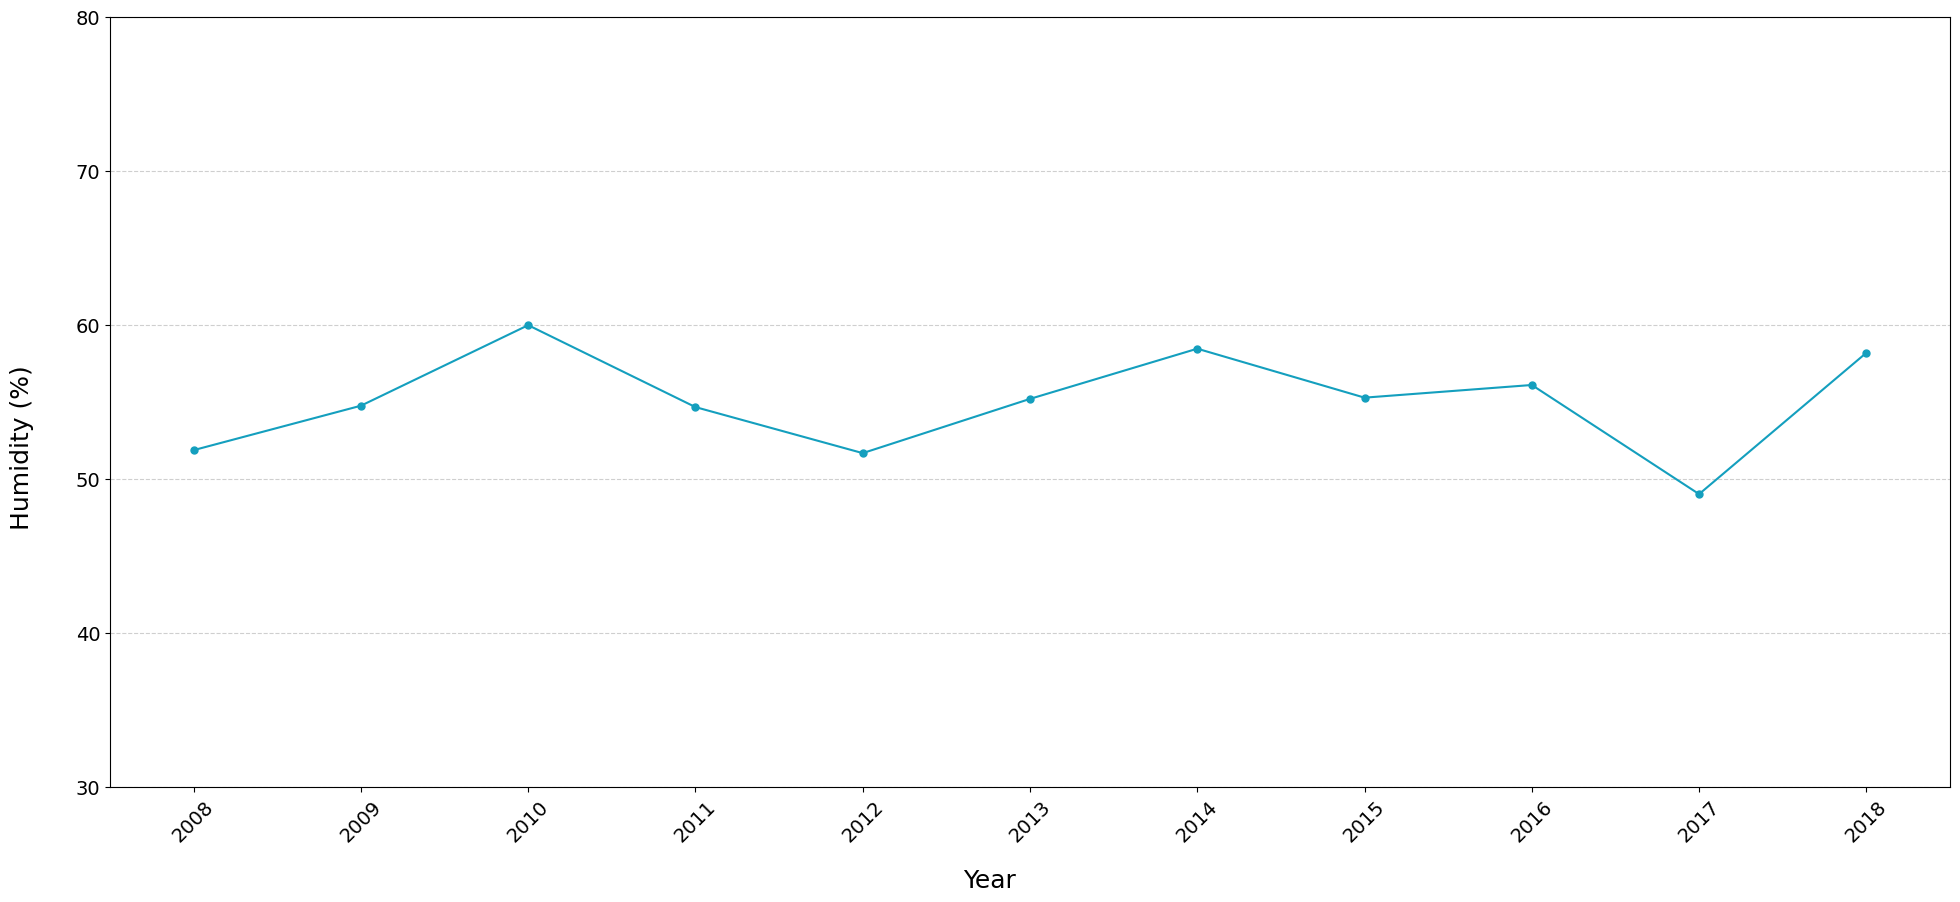

Saved: EDA_plots/yearly_avg_humidity_region.png


In [133]:
# Yearly average regional humidity (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_region_hum = (
    df.groupby("Year")["Humidity"]
      .mean()
      .reindex(range(2008, 2019), fill_value=0)
)

years = list(yearly_region_hum.index)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(years, yearly_region_hum.values, color="#149fbe", linewidth=1.5, marker="o", markersize=5)

ax.set_ylim(30, 80)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Humidity (%)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.16, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "yearly_avg_humidity_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


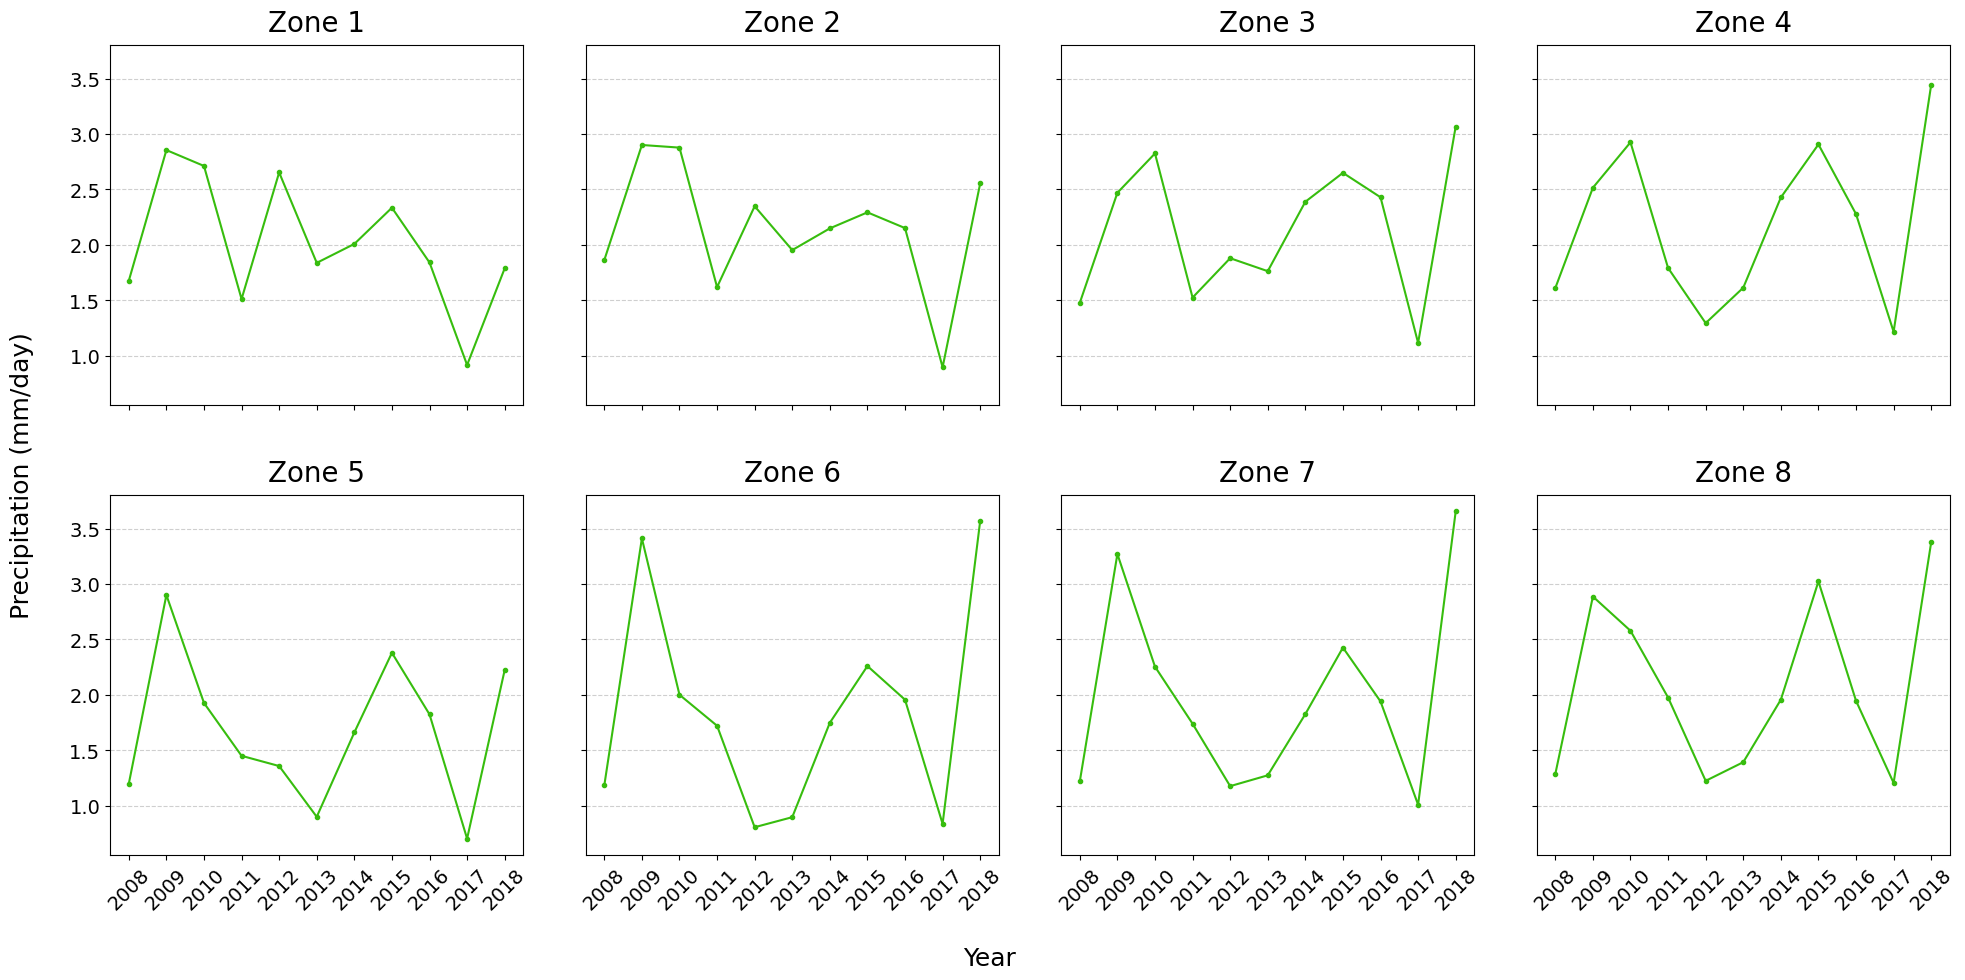

Saved: EDA_plots/yearly_avg_precipitation_zones.png


In [128]:
# Yearly average precipitation per zone (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_zone_precip = (
    df.groupby(["Zone_ID", "Year"])["Precipitation"]
      .mean()
      .unstack(fill_value=0)
      .reindex(columns=range(2008, 2019), fill_value=0)
)

zones = sorted(yearly_zone_precip.index)
years = list(yearly_zone_precip.columns)
max_y = yearly_zone_precip.values.max()
min_y = yearly_zone_precip.values.min()

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = yearly_zone_precip.loc[z].values
    axes[i].plot(years, vals, color="#37bd0e", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
    axes[i].set_xticks(years)
    axes[i].set_xticklabels(years, rotation=45, fontsize=14)
    axes[i].tick_params(axis="y", labelsize=14)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.01, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Precipitation (mm/day)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.12, right=0.98, top=0.93, wspace=0.15, hspace=0.25)

os.makedirs("EDA_plots", exist_ok=True)
out_path = os.path.join("EDA_plots", "yearly_avg_precipitation_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


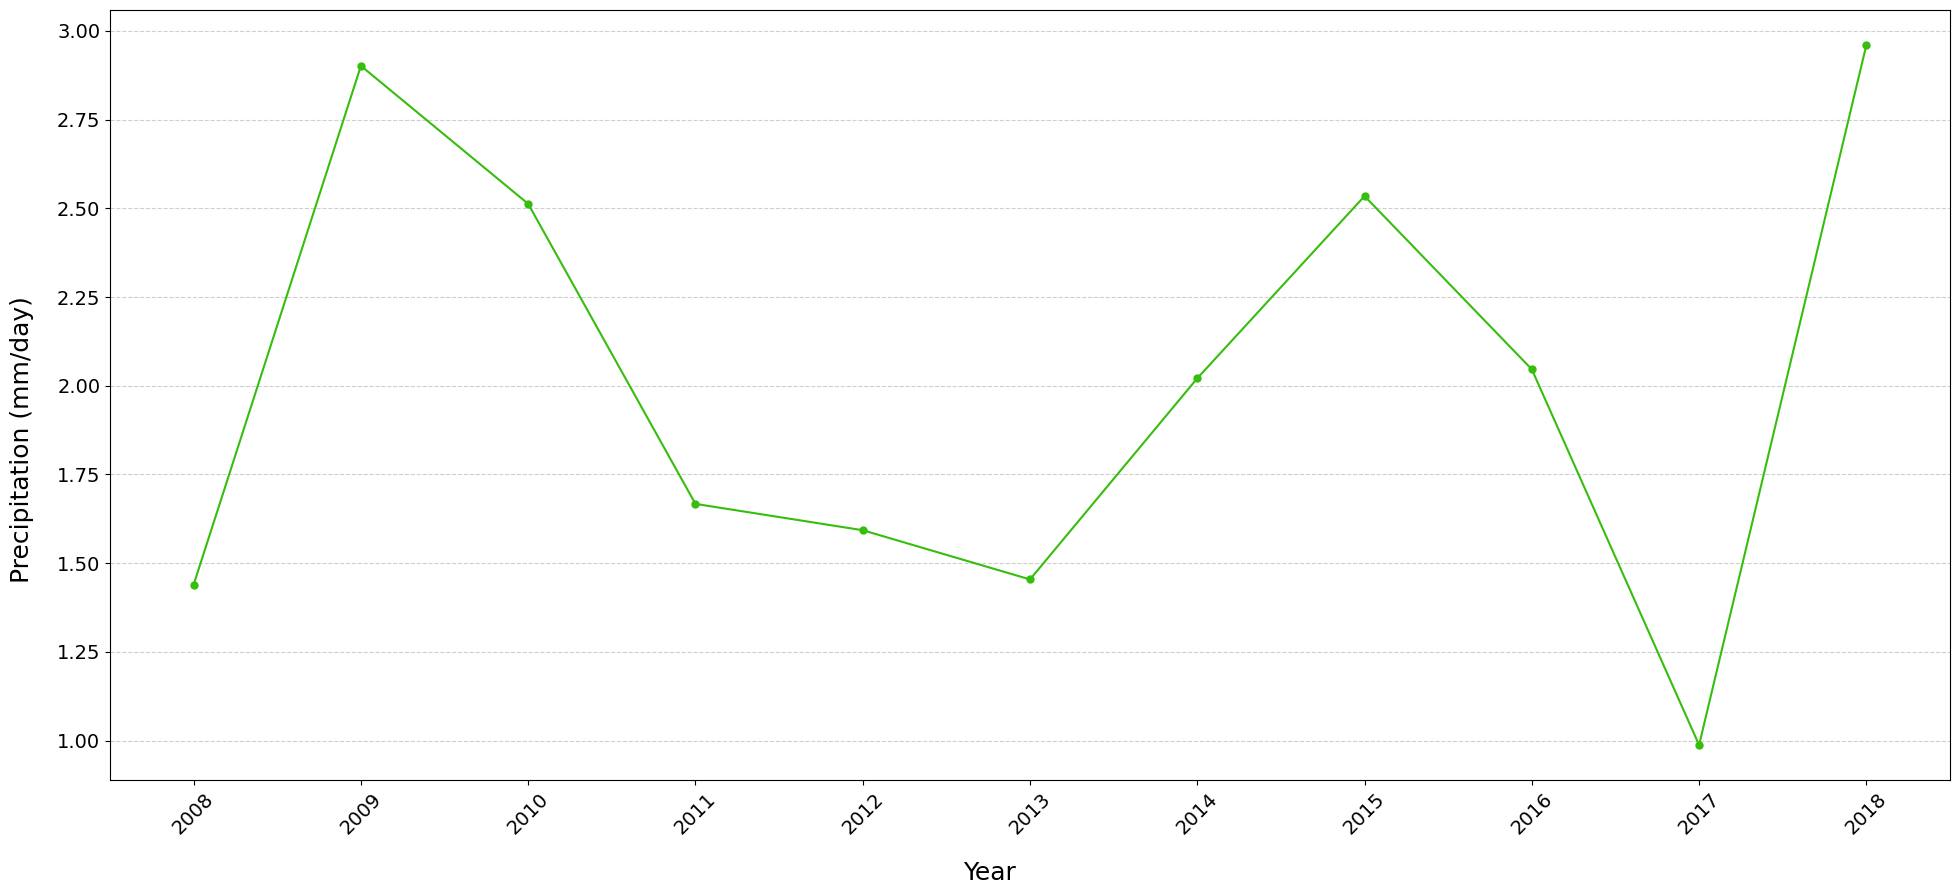

Saved: EDA_plots/yearly_avg_precipitation_region.png


In [129]:
# Yearly average regional precipitation (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_region_precip = (
    df.groupby("Year")["Precipitation"]
      .mean()
      .reindex(range(2008, 2019), fill_value=0)
)

years = list(yearly_region_precip.index)
max_y = yearly_region_precip.max()
min_y = yearly_region_precip.min()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(years, yearly_region_precip.values, color="#37bd0e", linewidth=1.5, marker="o", markersize=5)

ax.set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Precipitation (mm/day)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.16, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "yearly_avg_precipitation_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


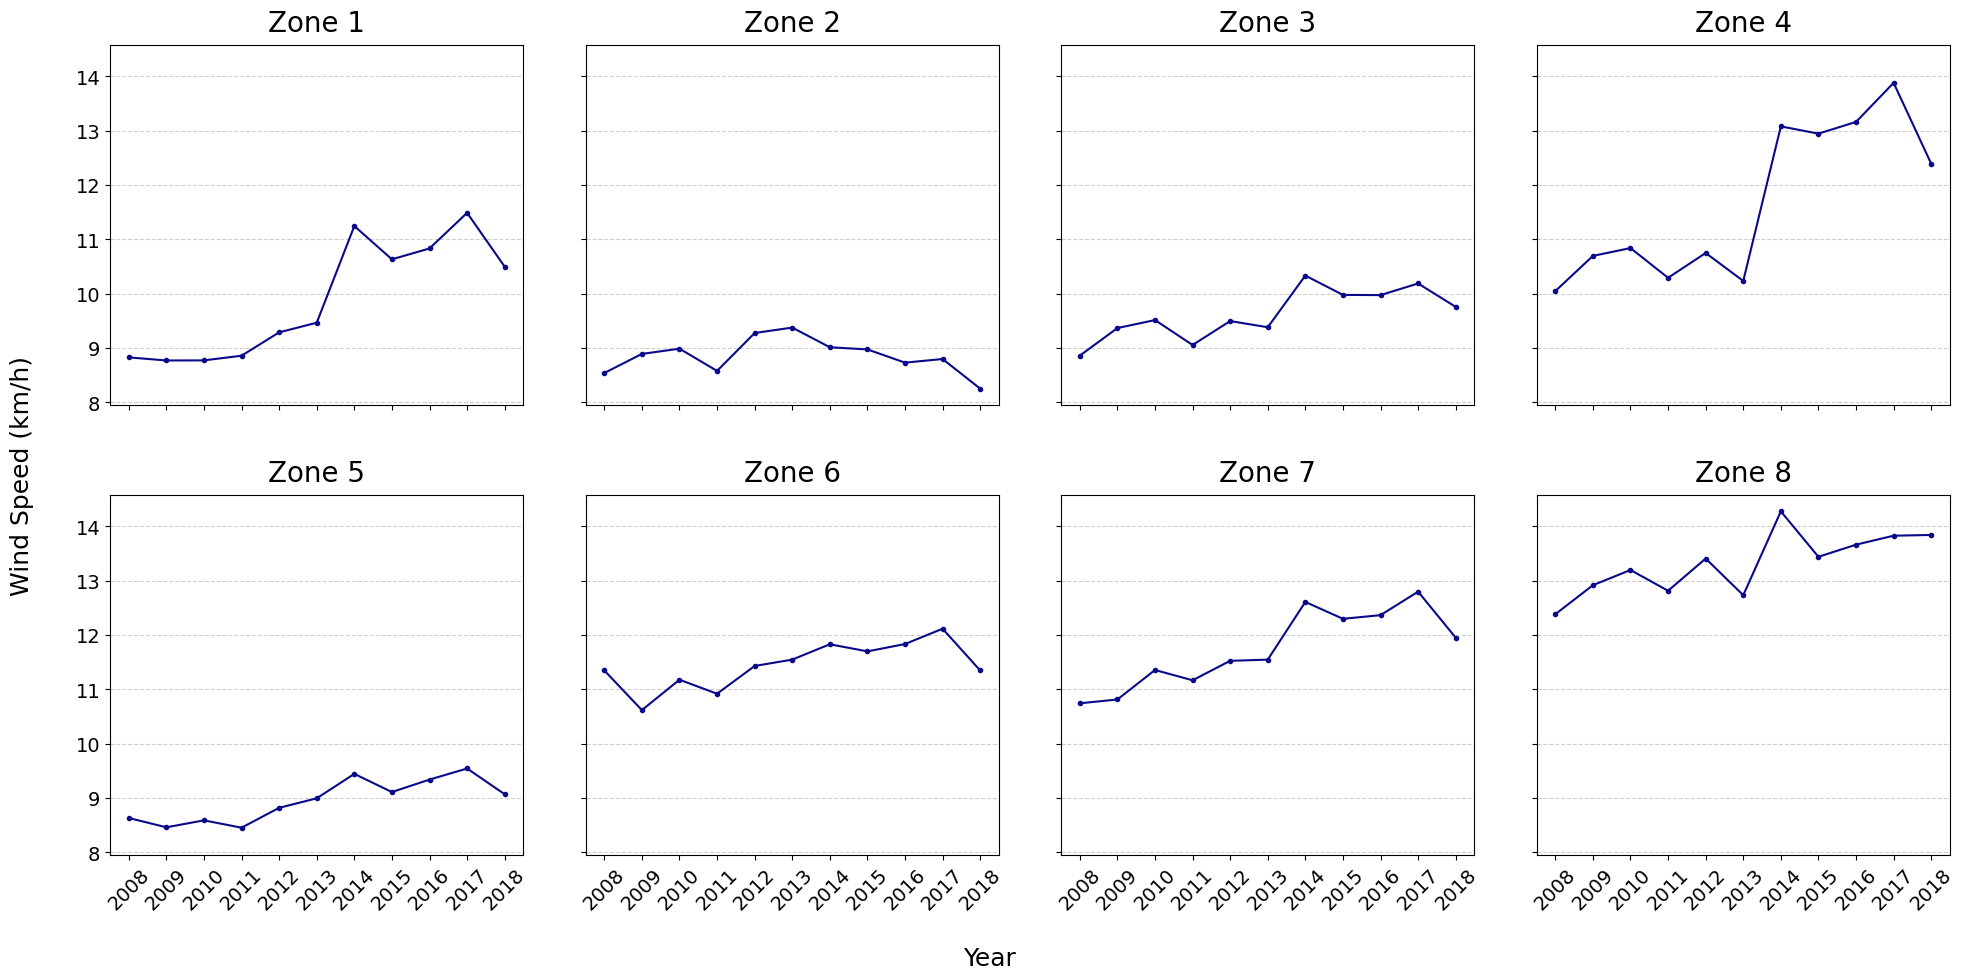

Saved: EDA_plots/yearly_avg_wind_zones.png


In [126]:
# Yearly average wind speed per zone (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_zone_wind = (
    df.groupby(["Zone_ID", "Year"])["Wind"]
      .mean()
      .unstack(fill_value=0)
      .reindex(columns=range(2008, 2019), fill_value=0)
)

zones = sorted(yearly_zone_wind.index)
years = list(yearly_zone_wind.columns)
max_y = yearly_zone_wind.values.max()
min_y = yearly_zone_wind.values.min()

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, z in enumerate(zones):
    vals = yearly_zone_wind.loc[z].values
    axes[i].plot(years, vals, color="#090989", linewidth=1.5, marker="o", markersize=3)
    axes[i].set_title(f"Zone {z}", fontsize=20, pad=10)
    axes[i].set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
    axes[i].set_xticks(years)
    axes[i].set_xticklabels(years, rotation=45, fontsize=14)
    axes[i].tick_params(axis="y", labelsize=14)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.01, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Wind Speed (km/h)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.12, right=0.98, top=0.93, wspace=0.15, hspace=0.25)

os.makedirs("EDA_plots", exist_ok=True)
out_path = os.path.join("EDA_plots", "yearly_avg_wind_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


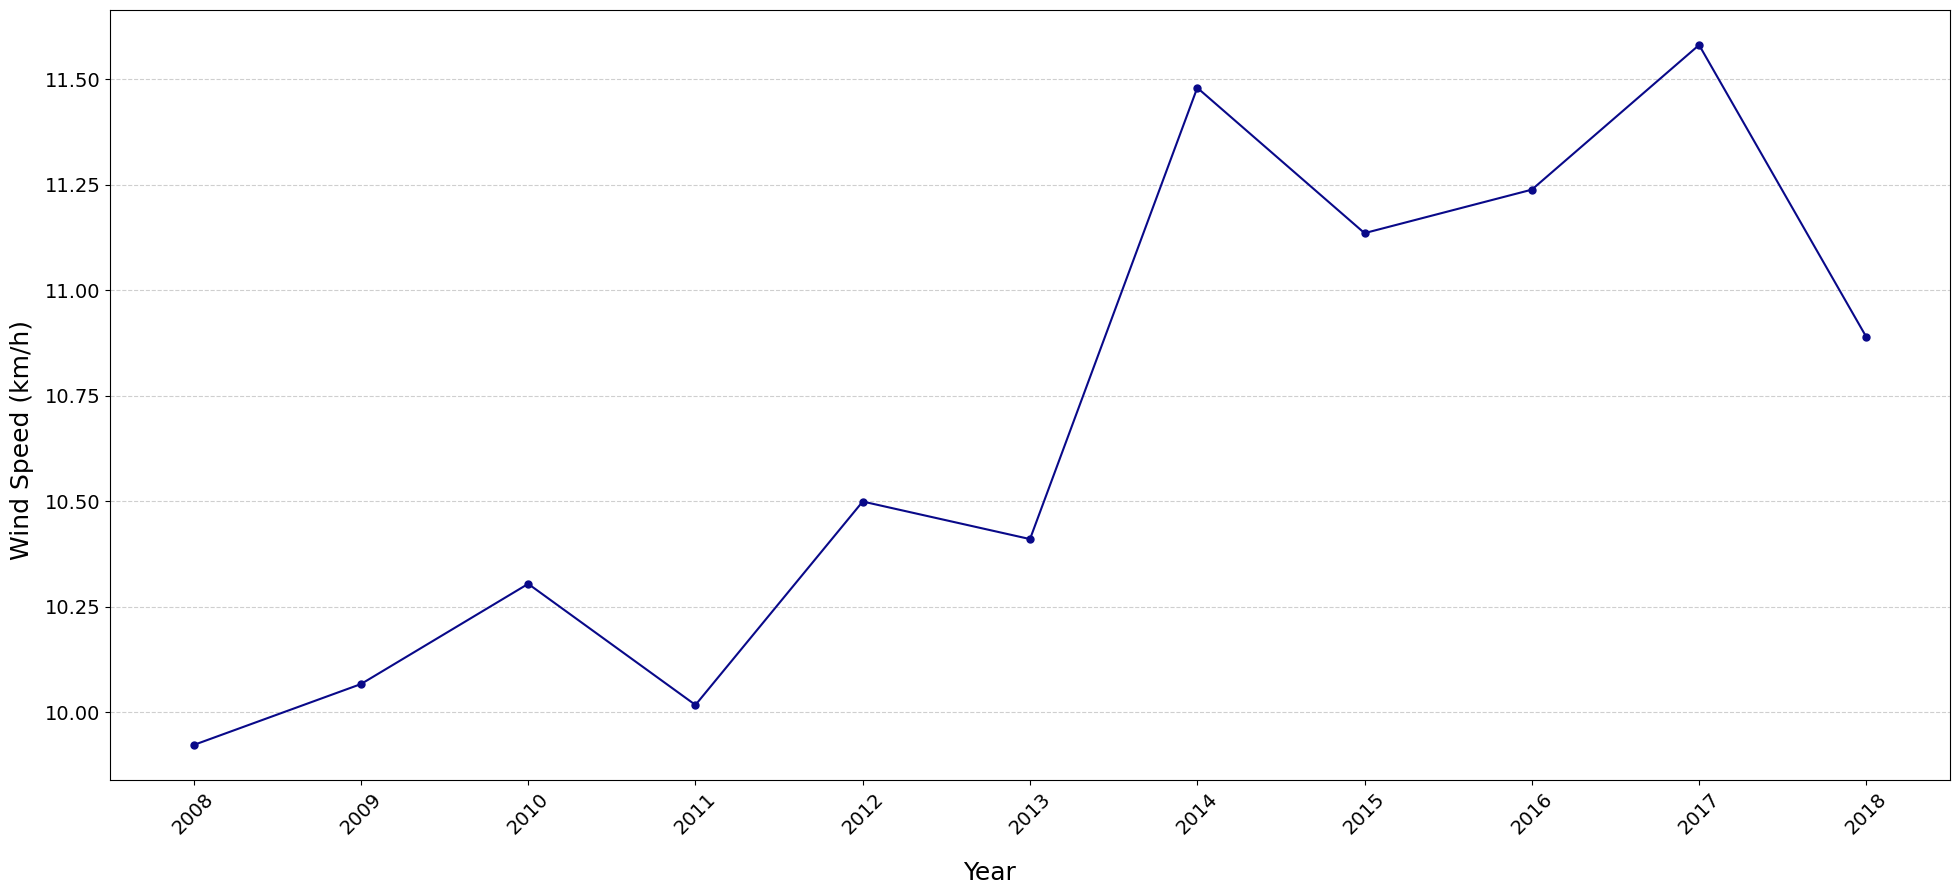

Saved: EDA_plots/yearly_avg_wind_region.png


In [127]:
# Yearly average regional wind speed (2008–2018)
df = climate_fire_df.copy()
df["Year"] = df["Date"].dt.year

yearly_region_wind = (
    df.groupby("Year")["Wind"]
      .mean()
      .reindex(range(2008, 2019), fill_value=0)
)

years = list(yearly_region_wind.index)
max_y = yearly_region_wind.max()
min_y = yearly_region_wind.min()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(years, yearly_region_wind.values, color="#090989", linewidth=1.5, marker="o", markersize=5)

ax.set_ylim(min_y - 0.05*(max_y-min_y), max_y + 0.05*(max_y-min_y))
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.6)

fig.text(0.5, 0.06, "Year", ha="center", fontsize=18)
fig.text(0.01, 0.5, "Wind Speed (km/h)", va="center", rotation="vertical", fontsize=18)
plt.subplots_adjust(left=0.06, bottom=0.16, right=0.98, top=0.93)

out_path = os.path.join("EDA_plots", "yearly_avg_wind_region.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


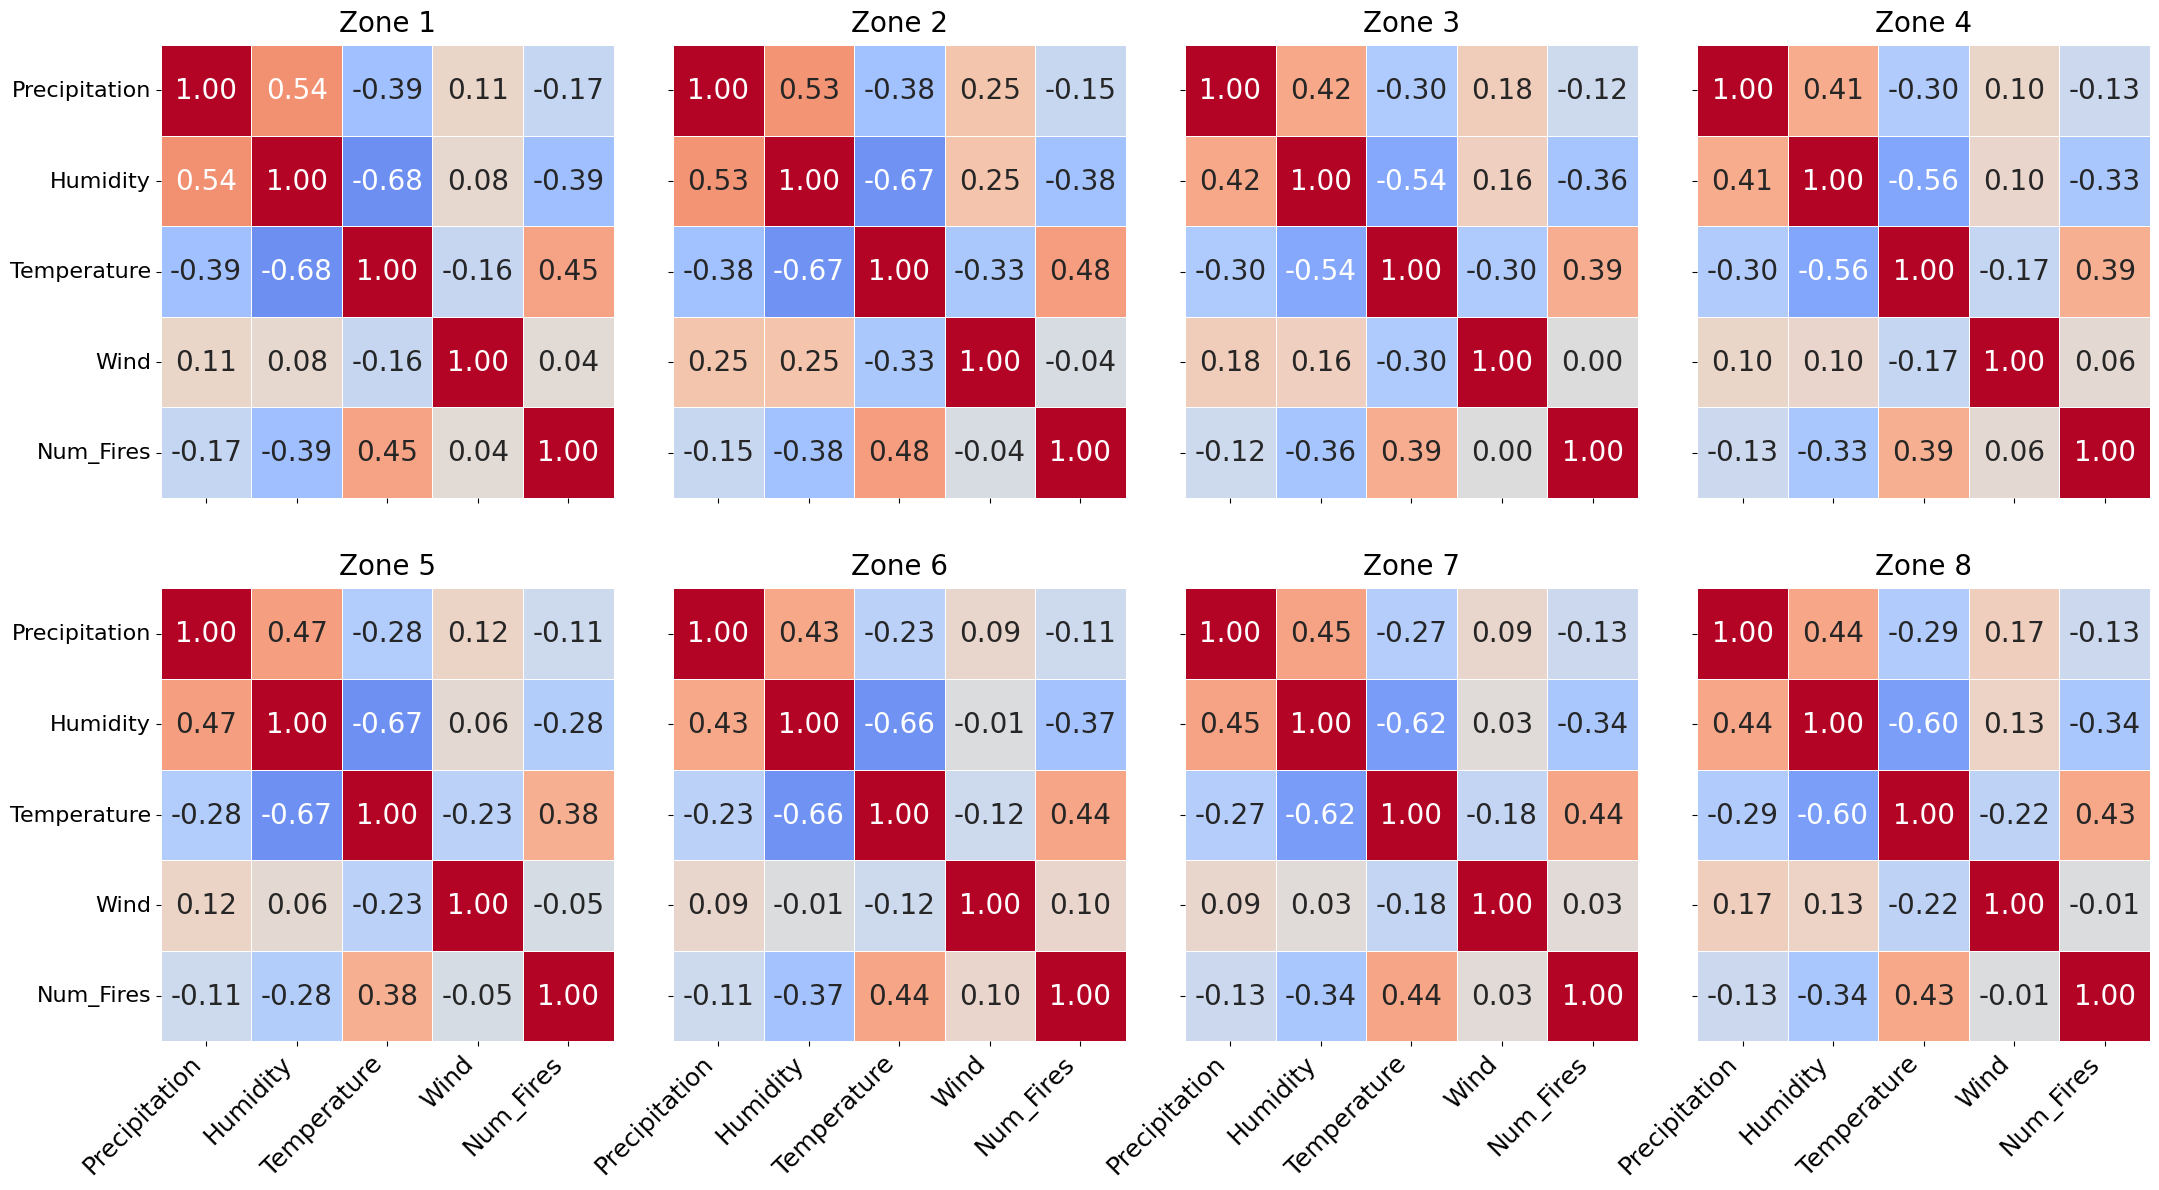

Saved: EDA_plots/correlation_matrix_zones.png


In [67]:
climate_features = ["Precipitation", "Humidity", "Temperature", "Wind"]
zones = sorted(climate_fire_df["Zone_ID"].unique())

fig, axes = plt.subplots(2, 4, figsize=(22, 12))
axes = axes.flatten()

for i, zone in enumerate(zones):
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone]
    corr = zone_df[climate_features + ["Num_Fires"]].corr()

    ax = axes[i]
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 20},
        cmap="coolwarm",
        vmin=-1, vmax=1,
        cbar=False,
        ax=ax,
        xticklabels=True,
        yticklabels=True,
        square=True,
        linewidths=0.5,
        linecolor="white",
    )
    ax.set_title(f"Zone {zone}", fontsize=20, pad=10)

    if i % 4 != 0:
        ax.set_yticklabels([])
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

    if i < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=18)

plt.subplots_adjust(left=0.07, bottom=0.10, right=0.98, top=0.93, wspace=0.10, hspace=0.20)
os.makedirs("EDA_plots", exist_ok=True)
out_path = os.path.join("EDA_plots", "correlation_matrix_zones.png")
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")


In [ ]:
rows = []

for zone in zones:
    zone_df = climate_fire_df[climate_fire_df["Zone_ID"] == zone].copy()
    
    same_day_corr = zone_df[climate_features + ["Num_Fires"]].corr()["Num_Fires"].drop("Num_Fires")
    
    for feature in climate_features:
        zone_df[f"{feature}_lag1"] = zone_df[feature].shift(1)
    zone_df = zone_df.dropna(subset=[f"{f}_lag1" for f in climate_features] + ["Num_Fires"])
    
    lag_corr = zone_df[[f"{f}_lag1" for f in climate_features] + ["Num_Fires"]].corr()["Num_Fires"].drop("Num_Fires")
    lag_corr.index = climate_features  
    
    for var in climate_features:
        rows.append({
            "Zone": zone,
            "Variable": var,
            "Same_Day_Corr": round(same_day_corr[var], 3),
            "Lag_1_Corr": round(lag_corr[var], 3)
        })

corr_df = pd.DataFrame(rows)
corr_df.to_csv("correlation_summary_zones.csv", index=False)
print("Saved correlation summary to correlation_summary_zones.csv")

Saved correlation summary to correlation_summary_zones.csv
